In [ ]:
#finda intersection of the two models to find final genes for every class

In [5]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(90)
        self.fc1 = nn.Linear(90, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(99)
        self.fc1 = nn.Linear(99, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)
class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(81)
        self.fc1 = nn.Linear(81, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()
print(model4)

class MLP5(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(69)
        self.fc1 = nn.Linear(69, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model5 = MLP5().cuda()
print(model5)

class MLP6(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(119)
        self.fc1 = nn.Linear(119, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model6 = MLP6().cuda()
print(model6)

class MLP7(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(86)
        self.fc1 = nn.Linear(86, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model7 = MLP7().cuda()
print(model7)

class MLP8(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model8 = MLP8().cuda()
print(model8)

class MLP9(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model9 = MLP9().cuda()
print(model9)


class MLP10(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(74)
        self.fc1 = nn.Linear(74, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model10 = MLP10().cuda()
print(model10)


class MLP11(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(78)
        self.fc1 = nn.Linear(78, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model11 = MLP11().cuda()
print(model11)

class MLP12(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model12 = MLP12().cuda()
print(model12)

class MLP13(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(70)
        self.fc1 = nn.Linear(70, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model13 = MLP13().cuda()
print(model13)

class MLP14(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(118)
        self.fc1 = nn.Linear(118, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model14 = MLP14().cuda()
print(model14)
class MLP15(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(124)
        self.fc1 = nn.Linear(124, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model15 = MLP15().cuda()
print(model15)
class MLP16(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(138)
        self.fc1 = nn.Linear(138, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model16 = MLP16().cuda()
print(model16)



class MLP17(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model17 = MLP17().cuda()
print(model17)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

In [39]:
#ConvAttMLP and NFM
#top 30

#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_30_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['IFI44L', 'KLF6', 'ZNF195', 'LYPLA1', 'IFI6', 'TMEM100', 'ADPRM', 'ABCB7', 'CEBPB', 'ZNRF4', 'PCK1', 'MT2A', 'RHOB', 'EEF1AKMT3', 'NUDT4', 'DUSP6', 'GDF15', 'CHCHD3', 'NR0B2', 'CYP39A1', 'AHCYL1', 'PTP4A1']
intersecion_list: ['FCGBP', 'CHODL', 'ZNHIT1', 'LGMN', 'RGS5', 'AGL', 'IFI6', 'TYR', 'LHPP', 'TMEM100', 'NDUFA13', 'UQCR10', 'CYP2J2', 'CPVL', 'TESC', 'VAMP8', 'CTSG', 'MS4A4A', 'CHP1', 'TUBB2B', 'ATP6V0E2', 'RPS27L']
intersecion_list: ['ISCU', 'TRA2A', 'EPM2AIP1', 'NEAT1', 'ACTA2', 'COX15', 'ACVR1B', 'ACP6', 'METTL9', 'NDUFA13', 'VTCN1', 'CTTN', 'VDR', 'NR1D2', 'MEST', 'CFLAR', 'FOS', 'TUBA4B', 'TFAP2A']
intersecion_list: ['RHOB', 'COX8A', 'SLC3A2', 'MNX1', 'TYMP', 'ZNF593', 'TESC', 'ABCB4', 'KLF6', 'VAMP8', 'BHLHE40', 'UQCR10', 'FST', 'ATP6V1F', 'IFI6', 'TRIM14', 'ELF3', 'KLF9']
intersecion_list: ['RHBDL1', 'AFP', 'FCGBP', 'NONO', 'NUDT4', 'ITGB3BP', 'TMEM100', 'WASHC3', 'FKBP4', 'ECH1', 'COX15', 'VAMP8', 'PEG10', 'CPVL', 'LYPLA1', 'WDR12', 'LARP1', 'RPL38']
int

In [40]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_genes_intersections_30.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_ConvAttMLP_NFM_test_info.csv')



138
columns: ['UGDH', 'NDUFB1', 'KLF6', 'RGS5', 'ACVR1B', 'LIPC', 'VDR', 'IFI6', 'TUBA4B', 'METTL9', 'KLF9', 'COX5B', 'TTC1', 'TMEM100', 'LHPP', 'BDKRB2', 'ZNRF4', 'UCHL1', 'PCK1', 'CYP2J2', 'DEPTOR', 'ISCU', 'ZNF593', 'DUSP6', 'VAMP8', 'CHCHD3', 'NR0B2', 'FST', 'MRPL44', 'IGLV2-14', 'TFAM', 'WDR12', 'TYMP', 'UBXN8', 'PTMS', 'EPM2AIP1', 'TRIM14', 'RPS27L', 'ATP5IF1', 'NONO', 'BCCIP', 'ITGB3BP', 'CHODL', 'ANKRD2', 'PLEKHA5', 'AGL', 'CTTN', 'CAMLG', 'HP', 'ABCC3', 'OSBPL1A', 'SLC3A2', 'PLIN3', 'ADPRM', 'ABCB7', 'CEBPB', 'ATP6V1F', 'MEST', 'CFLAR', 'ECH1', 'MT2A', 'EEF1AKMT3', 'NUDT4', 'MNX1', 'PDK3', 'NR1D2', 'WASHC4', 'CTSG', 'COL4A3BP', 'OLFML3', 'SH3BP2', 'BHLHE40', 'ABHD2', 'ADM2', 'PTP4A1', 'RHBDL1', 'LGMN', 'HKDC1', 'MAP3K1', 'ZNF195', 'SPI1', 'ALB', 'GPX3', 'CGREF1', 'LLGL2', 'TYR', 'ABCB4', 'COX15', 'PAFAH1B3', 'UQCR10', 'ELF3', 'PPP6R1', 'GPX2', 'ABLIM1', 'RHOB', 'WASHC3', 'TESC', 'LHX1', 'SERPINF1', 'CFB', 'OXCT1', 'COX8A', 'ACAD10', 'CD163', 'ADI1', 'TUBB2B', 'ATP6V0E2', 'HERC

In [ ]:
#train model with new features of 94
model=model16
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_ConvAttMLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


549 139
549 139


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:730: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:731: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2500, device='cuda:0')
Training Epoch: 0, total loss: 63.747521
total_train_accuracy: tensor(0.4771, device='cuda:0')
Training Epoch: 1, total loss: 60.795358
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 59.015967
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 3, total loss: 57.803561
total_train_accuracy: tensor(0.6833, device='cuda:0')
Training Epoch: 4, total loss: 56.755636
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 5, total loss: 55.605825
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 6, total loss: 55.073675
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 7, total loss: 54.415371
total_train_accuracy: tensor(0.8063, device='cuda:0')
Training Epoch: 8, total loss: 53.887440
total_train_accuracy: tensor(0.7958, device='cuda:0')
Training Epoch: 9, total loss: 53.646291
total_train_accuracy: tensor(0.8250, device='cuda:

In [2]:
#for 20_genes

# MLP_top30 and NFM_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CEBPB', 'JUNB', 'DUSP6', 'EEF1AKMT3', 'ABCB7', 'GDF15', 'PCK1', 'TIPARP', 'RHOB', 'KLF6', 'ADPRM', 'PTP4A1']
intersecion_list: ['CHODL', 'ZNHIT1', 'RGS5', 'UQCR10', 'CYP2J2', 'AGL', 'CHP1', 'LHPP', 'NDUFA13', 'CTSG', 'UCHL1', 'RPS27L']
intersecion_list: ['VTCN1', 'ACTA2', 'CFLAR', 'ISCU', 'METTL9', 'TRA2A', 'ACP6', 'CAMLG', 'COX15', 'MEST', 'NEAT1', 'VDR', 'EPM2AIP1']
intersecion_list: ['VAMP8', 'ATP6V1F', 'MNX1', 'FST', 'BHLHE40', 'PCK1', 'ABCB4', 'RHOB', 'TESC', 'KLF6', 'SLC3A2']
intersecion_list: ['WASHC3', 'ITGB3BP', 'RPL38', 'NONO', 'LARP1', 'LYPLA1', 'TMEM100', 'AFP']
intersecion_list: ['COL4A3BP', 'WASHC3', 'ITGB3BP', 'IFIT1', 'ATP5IF1', 'DEPTOR', 'PTMS', 'PAFAH1B3', 'RRM2', 'MRPS16', 'LIPC', 'EPM2AIP1', 'REN']
intersecion_list: ['OR7E12P', 'ADI1', 'BDKRB2', 'SPI1', 'ACAD10', 'NUDT4', 'OXCT1', 'ABHD2', 'NDUFB1', 'WASHC4', 'WARS2', 'PLIN3', 'UCHL1', 'SERPINF1', 'RGN']
intersecion_list: ['ATP6V1F', 'CP', 'ADI1', 'UGDH', 'RHOBTB1', 'GPX2', 'CFB', 'ANKRD2', 'BCCI

In [4]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_NFM_genes_intersections_30_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_20_MLP_NFM_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_20_MLP_NFM_test_info.csv')



101
columns: ['CHODL', 'ATP5IF1', 'RPL38', 'BDKRB2', 'PAFAH1B3', 'PCK1', 'PPP6R1', 'IFI44L', 'TRIM14', 'ADPRM', 'WARS2', 'PTP4A1', 'UCHL1', 'RPS27L', 'VDR', 'COL4A3BP', 'SERPINF1', 'GPX3', 'JUNB', 'RHOBTB1', 'LYPLA1', 'COX15', 'NEAT1', 'CTSG', 'DUSP6', 'TFAM', 'VTCN1', 'VAMP8', 'ISCU', 'RGS5', 'IFI27', 'ACP6', 'NONO', 'ABCB7', 'CFB', 'LARP1', 'LHPP', 'RHOB', 'MRPS16', 'NDUFA13', 'REN', 'LIPC', 'AFP', 'HERC5', 'COX5B', 'ATP6V1F', 'ADI1', 'IFIT1', 'METTL9', 'TRA2A', 'ALB', 'RRM2', 'OXCT1', 'IFIT2', 'TESC', 'NDUFB1', 'EPM2AIP1', 'SLC3A2', 'PLIN3', 'ITGB3BP', 'PTMS', 'BHLHE40', 'ACAD10', 'GPX2', 'CGREF1', 'RGN', 'CEBPB', 'IFI6', 'ZNHIT1', 'DEPTOR', 'CYP2J2', 'UGDH', 'CAMLG', 'ABLIM1', 'ABHD2', 'WASHC4', 'KLF6', 'ACTA2', 'CFLAR', 'UQCR10', 'TTC1', 'AGL', 'EEF1AKMT3', 'SPI1', 'MNX1', 'NUDT4', 'BCCIP', 'MEST', 'TMEM100', 'SH3BP2', 'ABCC3', 'WASHC3', 'CP', 'OR7E12P', 'MAP3K1', 'ABCB4', 'FST', 'CHP1', 'GDF15', 'ANKRD2', 'TIPARP', 'label']
(549, 102)
(138, 102)


549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:752: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:753: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2333, device='cuda:0')
Training Epoch: 0, total loss: 64.269535
total_train_accuracy: tensor(0.5104, device='cuda:0')
Training Epoch: 1, total loss: 60.816572
total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 2, total loss: 59.117125
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 3, total loss: 57.589327
total_train_accuracy: tensor(0.6917, device='cuda:0')
Training Epoch: 4, total loss: 57.239279
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 5, total loss: 56.526010
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 6, total loss: 56.076139
total_train_accuracy: tensor(0.7979, device='cuda:0')
Training Epoch: 7, total loss: 54.571907
total_train_accuracy: tensor(0.7583, device='cuda:0')
Training Epoch: 8, total loss: 54.740508
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 9, total loss: 54.109085
total_train_accuracy: tensor(0.7708, device='cuda:

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 86, total loss: 45.802230
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 44.954532
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 45.294622
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 89, total loss: 45.977978
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 90, total loss: 45.580698
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 45.210172
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 92, total loss: 45.203445
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 93, total loss: 45.687117
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 94, total loss: 45.673500
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 95, total loss: 44.969475
total_train_accuracy: tensor(0.9313, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 100, total loss: 44.826929
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


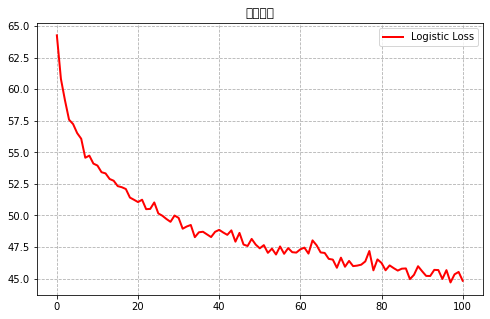

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:790: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:791: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 0, total loss: 45.944416
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 1, total loss: 46.163921
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 2, total loss: 45.369179
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 3, total loss: 45.827413
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 44.707660
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 45.343314
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 6, total loss: 45.547511
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.243946
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 8, total loss: 45.078116
total_train_

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 85, total loss: 44.419821
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 44.166107
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 87, total loss: 44.271508
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.952035
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 43.869808
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 43.671809
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.578398
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 43.568974
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 43.947785
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.634534
total_train_accuracy: tensor(0.9542, dev

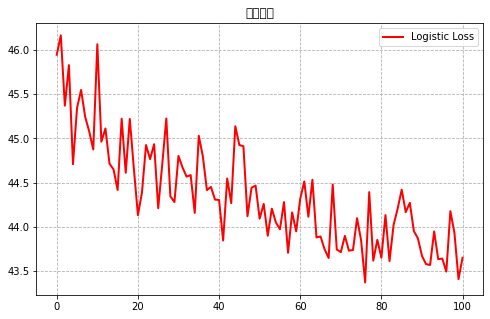

test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.957032
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 43.630340
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.808843
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 43.617207
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.442370
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 43.264182
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.662329
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.927583
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 43.477140
total_train_

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.685270
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 43.032941
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.095824
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 43.026727
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 43.092288
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.938861
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.106191
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.400410
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.938001
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.413434
total_train_accuracy: tensor(0.9667, dev

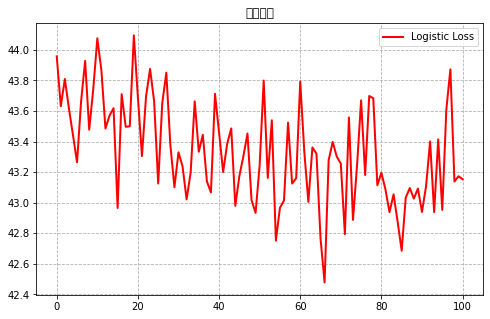

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.285199
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 43.013671
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.965013
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.903606
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.257164
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.861608
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.190398
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 7, total loss: 43.363878
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.213195
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.817653
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.922984
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.738887
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.775581
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.818713
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.785494
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.034958
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.789420
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.915094
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.476112
total_train_accuracy: tensor(0.9625, dev

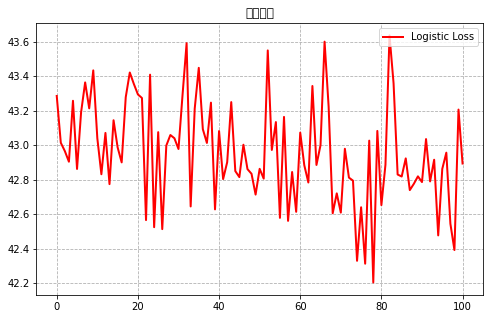

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.002881
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.873830
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.750389
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 43.081217
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.739078
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.809682
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.701638
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.836693
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.013793
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.482006
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.677687
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.552225
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.717349
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.518990
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.718310
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.615157
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 43.047479
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.504520
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.575059
total_train_accuracy: tensor(0.9833, dev

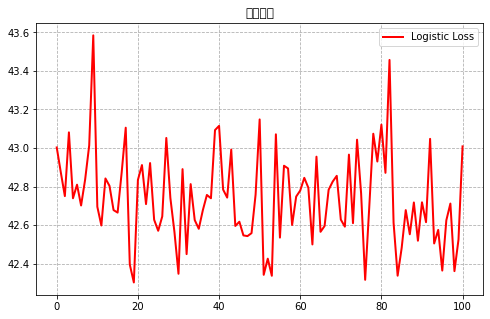

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.216021
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.861242
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.251724
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.666244
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 43.271534
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.570403
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.196568
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.873218
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.658010
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.832620
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 86, total loss: 42.200727
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.292478
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.521471
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.425730
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 42.295338
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.070468
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.883070
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.457098
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.530095
total_train_accuracy: tensor(0.9667, dev

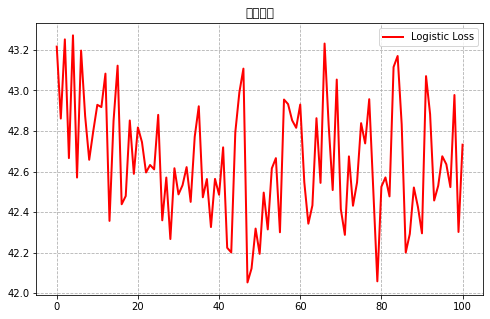

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.999801
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.519073
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 42.769043
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.710373
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.541632
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 5, total loss: 42.270173
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.504022
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.483817
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.323111
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.361216
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.470583
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.173282
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.158827
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 42.772687
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 42.754457
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 91, total loss: 43.043290
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.621650
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.573825
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.578748
total_train_accuracy: tensor(0.9792, dev

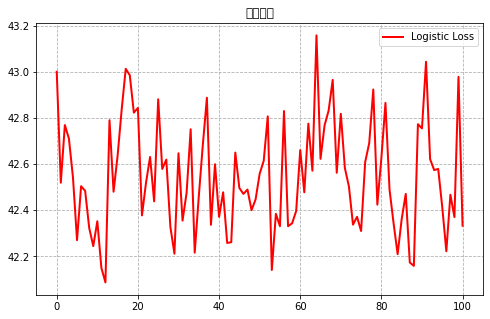

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.815893
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.423125
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.547761
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.786606
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.639466
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.484726
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.301920
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.520391
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.372816
total_train_accuracy

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.425475
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.447960
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.301261
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.531076
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.459316
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.489866
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.252457
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.544292
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.199468
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.271845
total_train_accuracy: tensor(0.9563, dev

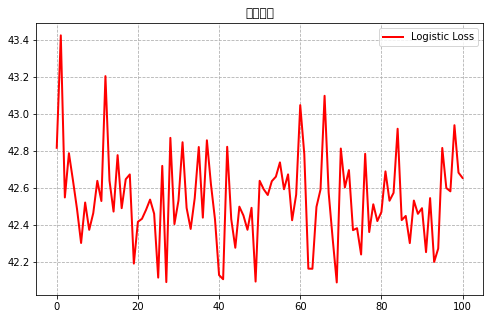

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.763225
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.649612
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.059538
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.253334
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.697080
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.539171
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 6, total loss: 43.088901
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 42.896490
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 42.870405
total_train_accuracy

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.647988
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.563035
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.480409
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.170212
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.739445
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 42.842309
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 91, total loss: 42.966834
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.467387
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.453910
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 42.891651
total_train_accuracy: tensor(0.9521, dev

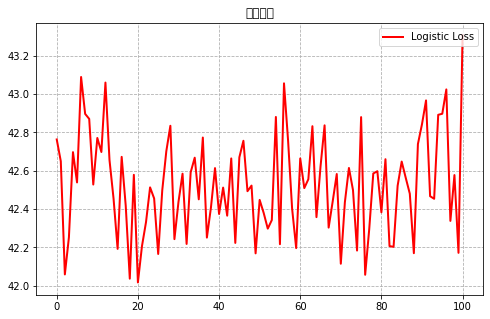

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 0, total loss: 42.463003
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.645465
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.786555
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.796777
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.406448
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.584563
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.700636
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.702490
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.233668
total_train_accuracy

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 42.923291
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.690473
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.094326
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.377604
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.122048
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.405912
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.594569
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.495186
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.368669
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 94, total loss: 41.999834
total_train_accuracy: tensor(0.9813, dev

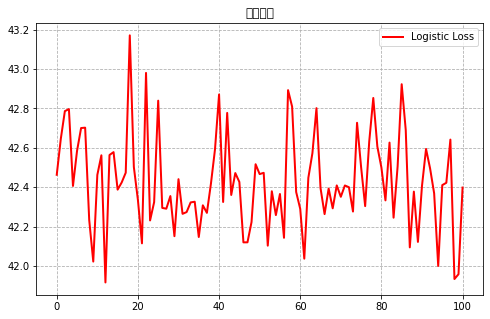

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8125, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8125, dtype=float32), array(0.875, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9625


In [6]:
#train model with new features of 94
model=model17
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_MLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_MLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_20_MLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP17(
  (bn0): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=101, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 102
f1_score:  %.4f 0.8958385059124977
accuracy_score: 0.8985507246376812
recall_score: 0.8936472024707318
pre_recall: 0.9123319290501952
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

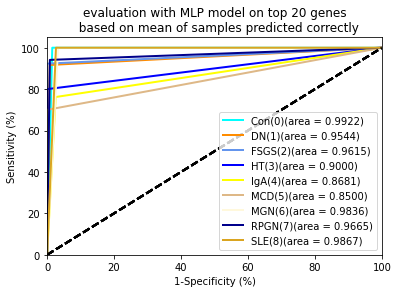

In [8]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/30_20_MLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP17()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_20_MLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [31]:
#for 20_genes
#mlp_top 30 and NFM_top 30
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_30_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'TIPARP', 'EEF1AKMT3', 'TMEM100', 'ADPRM', 'DUSP6', 'ABCB7', 'KLF6', 'CEBPB', 'GDF15', 'NR0B2', 'PCK1', 'JUNB', 'PTP4A1']
intersecion_list: ['CHP1', 'LHPP', 'CHODL', 'TMBIM6', 'ZNHIT1', 'RGS5', 'NDUFA13', 'AGL', 'UQCR10', 'UCHL1', 'CYP2J2', 'RPS27L', 'CTSG']
intersecion_list: ['ISCU', 'TRA2A', 'TTC3', 'EPM2AIP1', 'NEAT1', 'ACTA2', 'COX15', 'ACVR1B', 'PDE3B', 'ACP6', 'VTCN1', 'CTTN', 'VDR', 'MEST', 'CFLAR', 'TAF4B', 'CAMLG', 'METTL9']
intersecion_list: ['RHOB', 'SLC3A2', 'MNX1', 'TESC', 'ABCB4', 'KLF6', 'VAMP8', 'BHLHE40', 'FST', 'ATP6V1F', 'MRPL44', 'PCK1']
intersecion_list: ['IGHV3-23', 'AFP', 'NONO', 'WASHC3', 'ITGB3BP', 'TMEM100', 'ACTA2', 'LYPLA1', 'LARP1', 'RPL38']
intersecion_list: ['ADM2', 'COL4A3BP', 'UBXN8', 'WASHC3', 'REN', 'ITGB3BP', 'RRM2', 'MRPS16', 'PTMS', 'PAFAH1B3', 'LIPC', 'EPM2AIP1', 'DEPTOR', 'OVOL2', 'ATP5IF1', 'IFIT1']
intersecion_list: ['NDUFB1', 'ZNHIT1', 'SPI1', 'LLGL2', 'PLIN3', 'B4GALT5', 'BDKRB2', 'WARS2', 'PTP4A1', 'UCHL1', 'RGN', 

In [32]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_NFM_genes_intersections_30.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_MLP_NFM_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_MLP_NFM_test_info.csv')



124
columns: ['ADM2', 'NDUFB1', 'UGDH', 'SLC16A1', 'TMBIM6', 'LGMN', 'KLF6', 'MAP3K1', 'SPI1', 'RGS5', 'ACVR1B', 'ZNF195', 'LIPC', 'ALB', 'VDR', 'GPX3', 'JUNB', 'METTL9', 'IFI6', 'IGHV3-23', 'LLGL2', 'CGREF1', 'COX5B', 'TTC1', 'TMEM100', 'LHPP', 'IFIT2', 'ABCB4', 'COX15', 'BDKRB2', 'WARS2', 'PAFAH1B3', 'UQCR10', 'ABHD2', 'RHOBTB1', 'UCHL1', 'PCK1', 'CYP2J2', 'DEPTOR', 'PPP6R1', 'GPX2', 'ABLIM1', 'RHOB', 'ISCU', 'TTC3', 'WASHC3', 'REN', 'DUSP6', 'TESC', 'VAMP8', 'FRMD8', 'SERPINF1', 'CFB', 'TFAM', 'NR0B2', 'FST', 'MRPL44', 'OXCT1', 'ACAD10', 'UBXN8', 'ADI1', 'PTMS', 'IFI27', 'ATP6V0E2', 'EPM2AIP1', 'HERC5', 'TRIM14', 'OR7E12P', 'ATP5IF1', 'RPS27L', 'NONO', 'BCCIP', 'NEAT1', 'CHODL', 'ITGB3BP', 'ZNHIT1', 'ANKRD2', 'ACTA2', 'IFI44L', 'MAB21L4', 'AGL', 'VTCN1', 'CTTN', 'LYPLA1', 'LARP1', 'CAMLG', 'IFIT1', 'EGLN3', 'ABCC3', 'SLC3A2', 'PLIN3', 'ADPRM', 'B4GALT5', 'RRM2', 'ABCB7', 'PDE3B', 'CEBPB', 'NDUFA13', 'ATP6V1F', 'ACP6', 'MEST', 'CFLAR', 'OVOL2', 'RGN', 'TIPARP', 'EEF1AKMT3', 'AFP', 'M

549 125
549 125


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:711: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:712: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2604, device='cuda:0')
Training Epoch: 0, total loss: 64.015326
total_train_accuracy: tensor(0.5042, device='cuda:0')
Training Epoch: 1, total loss: 60.652934
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 2, total loss: 58.949634
total_train_accuracy: tensor(0.6479, device='cuda:0')
Training Epoch: 3, total loss: 58.132655
total_train_accuracy: tensor(0.7146, device='cuda:0')
Training Epoch: 4, total loss: 57.066540
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 5, total loss: 56.330763
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 6, total loss: 55.726893
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 7, total loss: 54.847848
total_train_accuracy: tensor(0.7750, device='cuda:0')
Training Epoch: 8, total loss: 54.627686
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 9, total loss: 54.282152
total_train_accuracy: tensor(0.7958, device='cuda:

total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 86, total loss: 46.339887
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 87, total loss: 45.924048
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 88, total loss: 45.501131
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 89, total loss: 46.055534
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 90, total loss: 45.394926
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 91, total loss: 45.346300
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 92, total loss: 45.314595
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 93, total loss: 45.190349
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 94, total loss: 45.327763
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 95, total loss: 45.087534
total_train_accuracy: tensor(0.9229, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

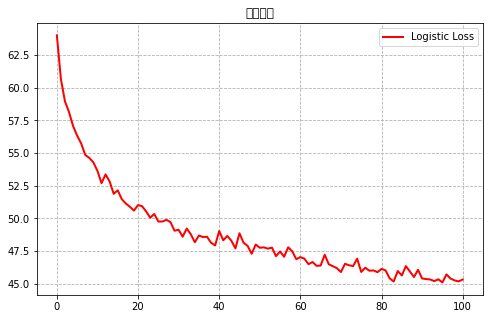

test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 125


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:749: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:750: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 125
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 0, total loss: 46.245604
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 1, total loss: 46.027322
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 2, total loss: 45.979064
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 45.598586
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 4, total loss: 45.536635
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 44.874418
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 45.160719
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 7, total loss: 45.560551
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 8, total loss: 45.804555
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 9, total loss: 45.272747
total_train_accuracy: tensor(0.9292, devic

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.999557
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 43.382179
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 88, total loss: 43.840222
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 43.308631
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.984326
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.337333
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.728395
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 93, total loss: 44.062237
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 43.464510
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 95, total loss: 43.702903
total_train_accuracy: tensor(0.9521, dev

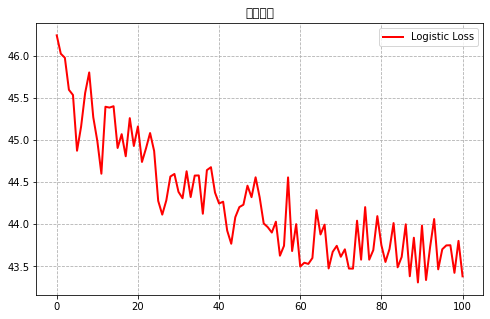

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 0, total loss: 44.347898
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.903802
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 2, total loss: 44.169929
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 44.122138
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.927403
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 43.681835
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 43.620357
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.441105
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.570842
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 43.024547
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.290334
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 87, total loss: 43.172913
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 43.035613
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.309479
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.713797
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.397704
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.979066
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.148963
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 94, total loss: 43.505085
total_train_accuracy: tensor(0.9625, dev

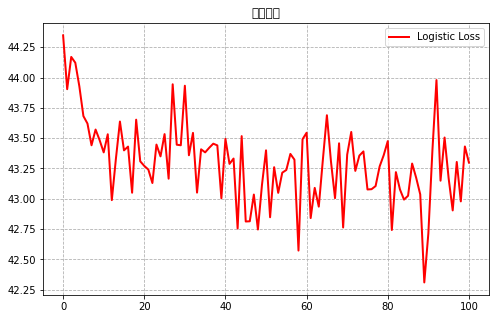

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.622643
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.379731
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.750014
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.036837
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.693030
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 43.013879
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.228701
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.383343
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 43.017082
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.051953
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 86, total loss: 43.503219
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.627064
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.827749
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.731841
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.617834
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.855682
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.671963
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.637817
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.771004
total_train_accuracy: tensor(0.9667, dev

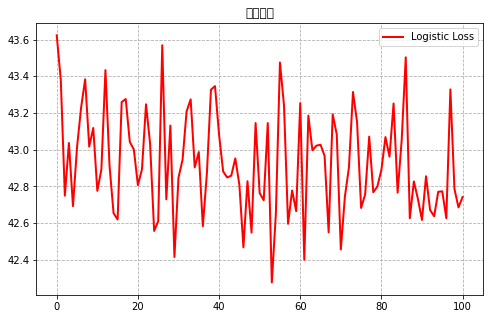

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.115955
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.914290
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 43.011712
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 43.000167
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.873115
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.752769
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.821698
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.989935
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.334548
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.657136
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.360672
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.491600
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.558100
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 43.016372
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 42.796230
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.856240
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.841640
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.505393
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.874581
total_train_accuracy: tensor(0.9667, dev

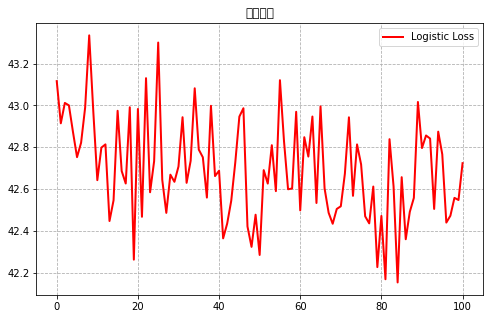

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.867859
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.489569
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.442690
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.595934
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.779983
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.213283
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.783460
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 42.885672
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.272452
total_train_

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.082826
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.671591
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.586161
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.587005
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.311184
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.217412
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.770857
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.813614
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.552058
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.222442
total_train_accuracy: tensor(0.9813, dev

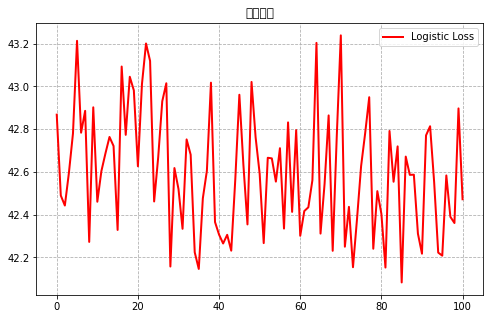

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.595265
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.585822
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 2, total loss: 43.341270
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.821326
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.729297
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.740066
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.481056
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.758130
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.691491
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.565611
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.327513
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.656867
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.778628
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.624132
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.486113
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.222417
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.477234
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.565034
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.613256
total_train_accuracy: tensor(0.9729, dev

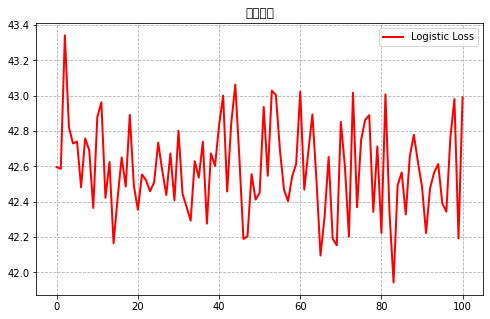

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.439683
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.670163
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.701255
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 42.852782
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.489224
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.590566
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.411080
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.537997
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.573275
total_train_accuracy

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.369881
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.715674
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.247013
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.003002
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.180410
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 90, total loss: 41.894839
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.235716
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.549106
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.305163
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.190660
total_train_accuracy: tensor(0.9854, dev

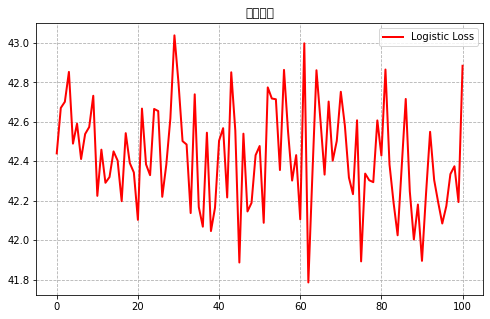

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.924618
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.770096
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.645854
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.770512
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.997342
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.166607
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.319989
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.461269
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.440258
total_train_accuracy

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.913324
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 42.913653
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.495595
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 43.115241
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.681529
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 42.106355
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.485300
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.143370
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.146867
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.416942
total_train_accuracy: tensor(0.9708, dev

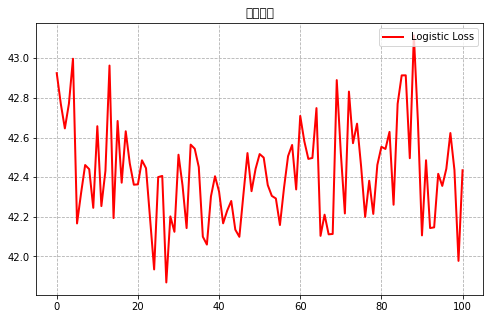

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 125
549 125
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.830556
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.475420
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.359173
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.459401
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.587787
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.538768
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.382621
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.306954
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.695901
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.371091
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.574405
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.086103
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.533866
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.240637
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.448404
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.163354
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.582166
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.252824
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.249824
total_train_accuracy: tensor(0.9792, dev

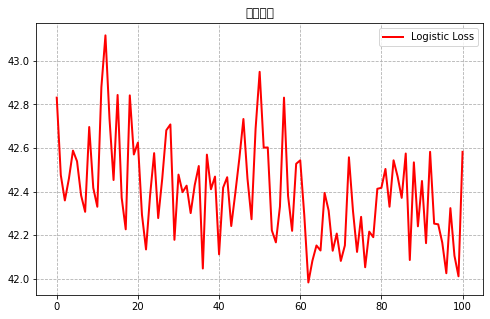

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8958, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8958334, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.98125


In [36]:
#train model with new features of 94
model=model15
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_MLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_MLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_MLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP15(
  (bn0): BatchNorm1d(124, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=124, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 125
f1_score:  %.4f 0.8774146894270733
accuracy_score: 0.8768115942028986
recall_score: 0.8825890014125308
pre_recall: 0.891358024691358
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

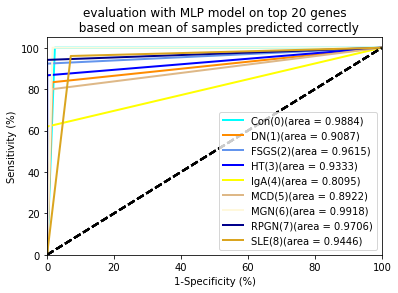

In [37]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/30_MLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP15()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_MLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [25]:
#for 20_genes
#MLP_top 30 and ConvAttMLP_top 30
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'EEF1AKMT3', 'TMEM100', 'ADPRM', 'DUSP6', 'ABCB7', 'KLF6', 'CEBPB', 'GDF15', 'NR0B2', 'PCK1', 'PTP4A1']
intersecion_list: ['AADAC', 'CHP1', 'LHPP', 'CHODL', 'DUSP6', 'ZNHIT1', 'RGS5', 'NDUFA13', 'AGL', 'UQCR10', 'TDP2', 'MEST', 'CYP2J2', 'RPS27L', 'CTSG']
intersecion_list: ['ISCU', 'TRA2A', 'EPM2AIP1', 'NEAT1', 'DAB2', 'ACTA2', 'COX15', 'NDUFB5', 'ACVR1B', 'ACP6', 'VTCN1', 'CTTN', 'VDR', 'MEST', 'CFLAR', 'METTL9']
intersecion_list: ['RHOB', 'SLC3A2', 'MNX1', 'TESC', 'ABCB4', 'KLF6', 'VAMP8', 'BHLHE40', 'FST', 'ATP6V1F', 'ENPP2', 'ATP5IF1', 'LYPLA1', 'ECH1', 'GEMIN6', 'CLDN4']
intersecion_list: ['AFP', 'NONO', 'WASHC3', 'ITGB3BP', 'TMEM100', 'CGA', 'LYPLA1', 'LARP1', 'AHCYL1', 'RPL38']
intersecion_list: ['ADM2', 'COL4A3BP', 'UBXN8', 'ITGB3BP', 'RRM2', 'COMMD10', 'LSM8', 'MRPS16', 'BHLHE40', 'PTMS', 'PAFAH1B3', 'LIPC', 'EPM2AIP1', 'DEPTOR', 'OVOL2', 'ATP5IF1', 'IFIT1']
intersecion_list: ['NDUFB1', 'LLGL2', 'ACAD10', 'NUDT4', 'PLIN3', 'ZNHIT1', 'ADI1', 'BDKRB2',

In [27]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_genes_intersections_30.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_MLP_ConvAttMLP_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_MLP_ConvAttMLP_test_info.csv')



118
columns: ['ADM2', 'NDUFB1', 'UGDH', 'LGMN', 'KLF6', 'MAP3K1', 'SPI1', 'RGS5', 'ACVR1B', 'ZNF195', 'LIPC', 'ALB', 'VDR', 'GPX3', 'METTL9', 'IFI6', 'CGREF1', 'LLGL2', 'COX5B', 'TMEM100', 'LHPP', 'COMMD10', 'ABCB4', 'COX15', 'BDKRB2', 'PAFAH1B3', 'UQCR10', 'TDP2', 'ABHD2', 'UCHL1', 'PCK1', 'CYP2J2', 'DEPTOR', 'PPP6R1', 'GPX2', 'CLDN4', 'ABLIM1', 'RHOB', 'ISCU', 'WASHC3', 'CGA', 'DUSP6', 'DAB2', 'AUTS2', 'TESC', 'SERPINA3', 'NDUFB5', 'VAMP8', 'SERPINF1', 'CFB', 'FGFR2', 'NR0B2', 'FST', 'TFAM', 'OXCT1', 'ACAD10', 'UBXN8', 'ADI1', 'PTMS', 'EPM2AIP1', 'HERC5', 'TRIM14', 'AHCYL1', 'ATP5IF1', 'RPS27L', 'AADAC', 'NONO', 'BCCIP', 'NEAT1', 'CHODL', 'ITGB3BP', 'ZNHIT1', 'ANKRD2', 'ACTA2', 'IFI44L', 'AGL', 'VTCN1', 'CTTN', 'LYPLA1', 'LARP1', 'IFIT1', 'ABCC3', 'SLC3A2', 'MRPL19', 'PLIN3', 'ADPRM', 'RRM2', 'ABCB7', 'CEBPB', 'NDUFA13', 'ATP6V1F', 'MEST', 'ACP6', 'ENPP2', 'CFLAR', 'ECH1', 'OVOL2', 'GEMIN6', 'RGN', 'EEF1AKMT3', 'AFP', 'MNX1', 'NUDT4', 'PDK3', 'LSM8', 'MRPS16', 'GDF15', 'NR1D2', 'WASH

549 119
549 119


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:693: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:694: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.3083, device='cuda:0')
Training Epoch: 0, total loss: 63.707170
total_train_accuracy: tensor(0.5083, device='cuda:0')
Training Epoch: 1, total loss: 60.371629
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 58.730576
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 58.004859
total_train_accuracy: tensor(0.6979, device='cuda:0')
Training Epoch: 4, total loss: 56.708758
total_train_accuracy: tensor(0.7188, device='cuda:0')
Training Epoch: 5, total loss: 55.734263
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 6, total loss: 54.966069
total_train_accuracy: tensor(0.7792, device='cuda:0')
Training Epoch: 7, total loss: 54.113048
total_train_accuracy: tensor(0.8021, device='cuda:0')
Training Epoch: 8, total loss: 54.046239
total_train_accuracy: tensor(0.8000, device='cuda:0')
Training Epoch: 9, total loss: 53.498600
total_train_accuracy: tensor(0.8146, device='cuda:

total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 45.558812
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 87, total loss: 45.687409
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 88, total loss: 45.801095
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 89, total loss: 46.070077
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 45.332428
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 45.785989
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 45.015014
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 93, total loss: 45.371828
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 94, total loss: 45.437296
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 95, total loss: 45.336104
total_train_accuracy: tensor(0.9500, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

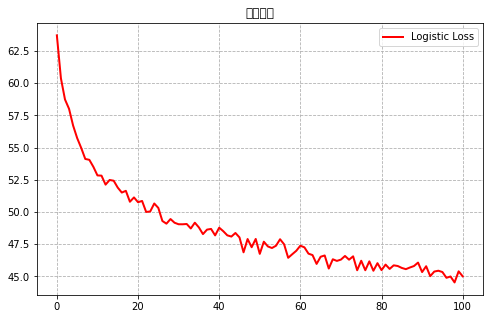

test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 119


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:731: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:732: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 119
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 0, total loss: 45.849920
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 1, total loss: 45.937786
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 2, total loss: 45.657890
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 3, total loss: 45.469340
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 4, total loss: 45.393744
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 45.346761
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 6, total loss: 45.270946
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 7, total loss: 44.975796
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 44.693897
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 9, total loss: 45.111334
total_train_accuracy: tensor(0.9292, devic

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 43.233863
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.139611
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 43.623252
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.799187
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.505640
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.757811
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 43.074210
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.224967
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 43.131155
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 95, total loss: 43.328893
total_train_accuracy: tensor(0.9604, dev

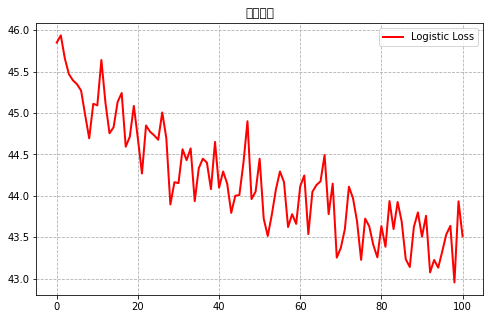

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 0, total loss: 44.238952
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 1, total loss: 44.539139
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.844493
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 43.421270
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 43.221170
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 5, total loss: 43.890111
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.411991
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.591547
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.430186
total_train_

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.708388
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.744794
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.764230
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 43.128464
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.789130
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 43.012478
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.656041
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.053362
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 43.042174
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.203981
total_train_accuracy: tensor(0.9813, dev

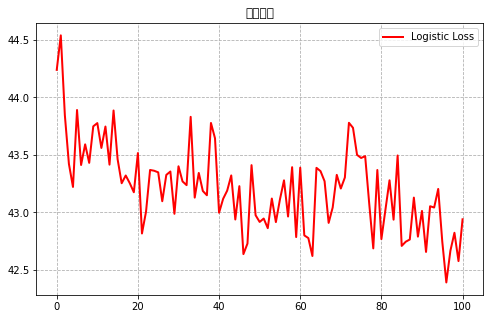

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.449732
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.989488
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.232534
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.829652
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.042829
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.930126
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.870469
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.098721
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.280760
total_train_

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.697378
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 43.187906
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.372989
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.602473
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.613734
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.597643
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.589984
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.776765
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.993719
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 43.132125
total_train_accuracy: tensor(0.9667, dev

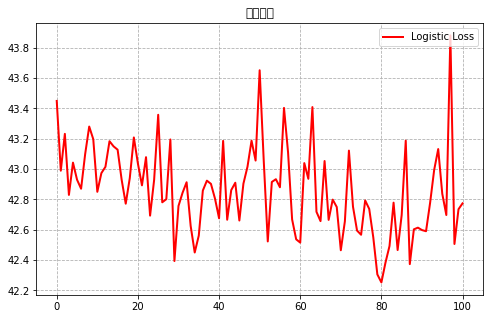

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.337093
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.675756
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.613142
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.748298
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.286410
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.629378
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.718379
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.847966
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.539710
total_train_accuracy

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.270527
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.500093
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.733436
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.342924
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.411997
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 43.032318
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.506804
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.441557
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 93, total loss: 42.194947
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.684263
total_train_accuracy: tensor(0.9833, dev

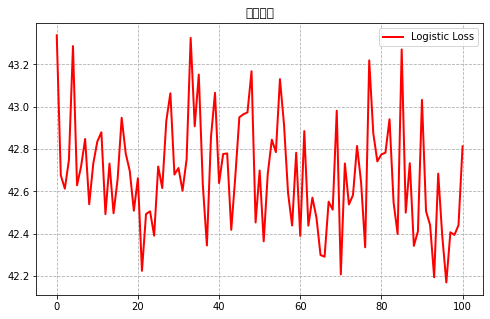

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.925059
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.677617
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 43.432614
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.655997
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.607329
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.576068
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.722964
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 7, total loss: 43.247605
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.268104
total_train_

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.374787
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.537610
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.467893
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.195640
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 42.847185
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.798253
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.284083
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.421089
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.450096
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.170841
total_train_accuracy: tensor(0.9604, dev

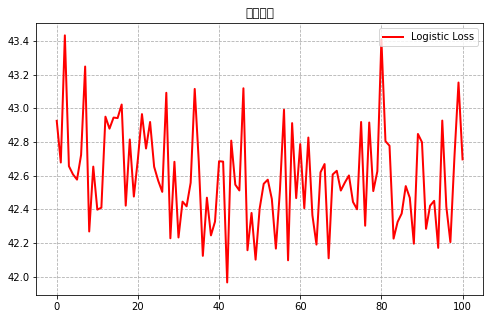

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.255595
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.888431
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.627751
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.716266
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.599257
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.667842
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.231682
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 42.895338
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.901607
total_train_accuracy

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.076652
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 42.829499
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.596097
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.405319
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.307146
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.640103
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 91, total loss: 42.951654
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.456321
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.447509
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.736633
total_train_accuracy: tensor(0.9667, dev

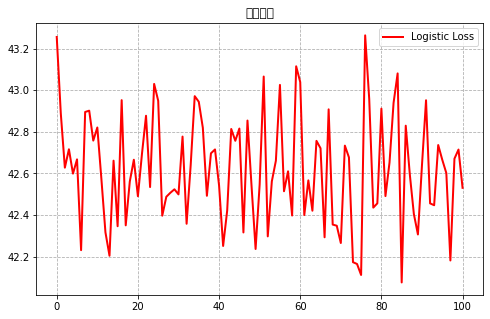

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.590086
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.509310
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.829803
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.487833
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 42.835712
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.809405
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 6, total loss: 42.287397
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 42.107871
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.493853
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.499722
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.466841
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 87, total loss: 42.119072
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.749165
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.676327
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.568290
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.406260
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.505263
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.095634
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.197211
total_train_accuracy: tensor(0.9563, dev

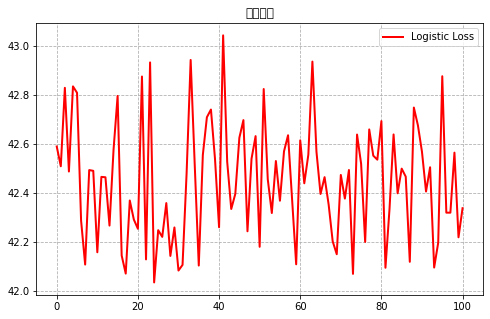

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.596933
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 42.893795
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.647876
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.685694
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.766974
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.762764
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 43.035512
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.568810
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 43.006781
total_train_accuracy

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.193495
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.534442
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.294114
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 88, total loss: 41.849606
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 42.825971
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.525857
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.737691
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 92, total loss: 42.079847
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.809699
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 94, total loss: 42.049660
total_train_accuracy: tensor(0.9646, dev

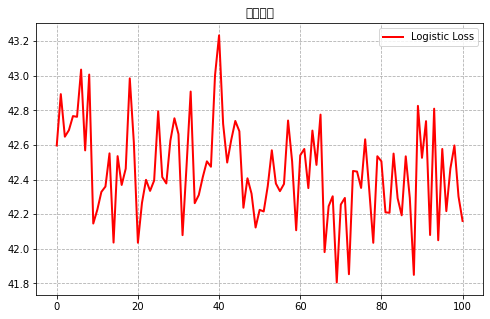

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 119
549 119
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 0, total loss: 42.385210
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.574664
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.550511
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.251612
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.235394
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.498849
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.524328
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.274564
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.435597
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.017963
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.322143
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 87, total loss: 41.850309
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.189851
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.206186
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.366211
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.709829
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.235486
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.582336
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.127716
total_train_accuracy: tensor(0.9688, dev

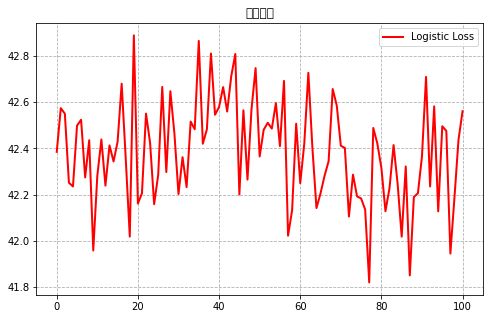

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8750, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.875, dtype=float32), array(0.9166667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9729167


In [29]:
#train model with new features of 94
model=model14
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_MLP_ConvAttMLP_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_MLP_ConvAttMLP_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_MLP_ConvAttMLP/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP14(
  (bn0): BatchNorm1d(118, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=118, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 119
f1_score:  %.4f 0.9007536457340967
accuracy_score: 0.9057971014492754
recall_score: 0.903753022576552
pre_recall: 0.907447490780824
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

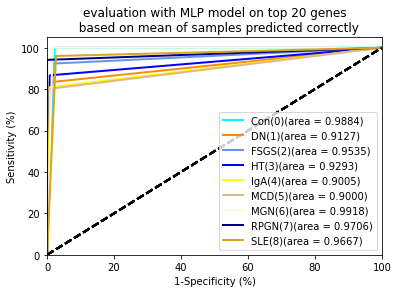

In [30]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/30_MLP_ConvAttMLP/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP14()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_MLP_ConvAttMLP_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [15]:
#for 20_genes
#MLP_top 20 and ConvAttMLP_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvAttMLP/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'EEF1AKMT3', 'DUSP6', 'ADPRM', 'ABCB7', 'KLF6', 'GDF15', 'PCK1', 'PTP4A1']
intersecion_list: ['CHP1', 'LHPP', 'ZNHIT1', 'RGS5', 'AGL', 'MEST', 'CYP2J2', 'RPS27L', 'CTSG']
intersecion_list: ['ISCU', 'TRA2A', 'COX15', 'ACTA2', 'ACVR1B', 'ACP6', 'VTCN1', 'CTTN', 'VDR', 'MEST', 'CFLAR', 'METTL9']
intersecion_list: ['RHOB', 'SLC3A2', 'TESC', 'KLF6', 'VAMP8', 'FST', 'ATP6V1F', 'ATP5IF1', 'GEMIN6']
intersecion_list: ['WASHC3', 'NONO', 'TMEM100', 'ITGB3BP', 'LYPLA1', 'LARP1', 'AHCYL1', 'RPL38']
intersecion_list: ['ADM2', 'COL4A3BP', 'UBXN8', 'RRM2', 'MRPS16', 'PTMS', 'PAFAH1B3', 'LIPC', 'EPM2AIP1', 'OVOL2', 'ATP5IF1']
intersecion_list: ['NDUFB1', 'ACAD10', 'NUDT4', 'PLIN3', 'ADI1', 'SPI1', 'ABCD3', 'UCHL1', 'RGN', 'ABHD2']
intersecion_list: ['UGDH', 'CGREF1', 'ABCC3', 'BCCIP', 'SH3BP2', 'CFB', 'ATP6V1F', 'GPX2']
intersecion_list: ['IFIT1', 'IFI44L', 'MRPS16', 'NDUFA13', 'GPX3', 'TRIM14', 'DEPTOR', 'IFI6']


In [16]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_test_info.csv')



78
columns: ['ADM2', 'NDUFB1', 'UGDH', 'KLF6', 'SPI1', 'RGS5', 'ACVR1B', 'LIPC', 'VDR', 'GPX3', 'METTL9', 'IFI6', 'CGREF1', 'LHPP', 'TMEM100', 'COX15', 'PAFAH1B3', 'PTP4A1', 'UCHL1', 'PCK1', 'CYP2J2', 'DEPTOR', 'GPX2', 'RHOB', 'ISCU', 'WASHC3', 'DUSP6', 'TESC', 'VAMP8', 'CFB', 'FST', 'ACAD10', 'UBXN8', 'ADI1', 'PTMS', 'EPM2AIP1', 'TRIM14', 'AHCYL1', 'RPS27L', 'ATP5IF1', 'NONO', 'BCCIP', 'ITGB3BP', 'IFI44L', 'ZNHIT1', 'ACTA2', 'AGL', 'VTCN1', 'CTTN', 'LYPLA1', 'LARP1', 'IFIT1', 'ABCC3', 'SLC3A2', 'PLIN3', 'ADPRM', 'RRM2', 'ABCB7', 'NDUFA13', 'ATP6V1F', 'ACP6', 'MEST', 'CFLAR', 'OVOL2', 'GEMIN6', 'RGN', 'EEF1AKMT3', 'NUDT4', 'MRPS16', 'GDF15', 'CTSG', 'RPL38', 'COL4A3BP', 'TRA2A', 'CHP1', 'SH3BP2', 'ABCD3', 'ABHD2', 'label']
(549, 79)
(138, 79)


549 79
549 79


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:653: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:654: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2667, device='cuda:0')
Training Epoch: 0, total loss: 63.990265
total_train_accuracy: tensor(0.4854, device='cuda:0')
Training Epoch: 1, total loss: 60.873273
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 2, total loss: 59.101927
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 3, total loss: 58.138231
total_train_accuracy: tensor(0.6792, device='cuda:0')
Training Epoch: 4, total loss: 57.572038
total_train_accuracy: tensor(0.6958, device='cuda:0')
Training Epoch: 5, total loss: 56.572889
total_train_accuracy: tensor(0.7125, device='cuda:0')
Training Epoch: 6, total loss: 56.002559
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 7, total loss: 55.646169
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 8, total loss: 54.509161
total_train_accuracy: tensor(0.7563, device='cuda:0')
Training Epoch: 9, total loss: 54.259270
total_train_accuracy: tensor(0.7813, device='cuda:

total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 86, total loss: 46.506881
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 87, total loss: 45.874792
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 88, total loss: 46.006479
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 89, total loss: 46.182276
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 45.639076
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 91, total loss: 45.906989
total_train_accuracy: tensor(0.8792, device='cuda:0')
Training Epoch: 92, total loss: 46.841076
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.655027
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 94, total loss: 45.588068
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 95, total loss: 45.960902
total_train_accuracy: tensor(0.9188, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

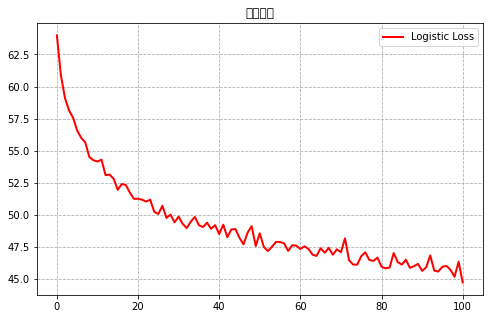

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 79


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:691: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:692: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 79
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.465358
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 1, total loss: 46.468935
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 2, total loss: 45.632396
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 3, total loss: 46.106101
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 4, total loss: 46.158778
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 45.604448
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 6, total loss: 45.507716
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 7, total loss: 45.615804
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 8, total loss: 45.438244
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 9, total loss: 45.209947
total_train_accuracy: tensor(0.9104, device

total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 86, total loss: 43.856691
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 44.498159
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 88, total loss: 44.209297
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 89, total loss: 44.088229
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.534680
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 91, total loss: 44.633271
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 92, total loss: 44.139584
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 43.975815
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 43.895441
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 95, total loss: 44.033182
total_train_accuracy: tensor(0.9292, dev

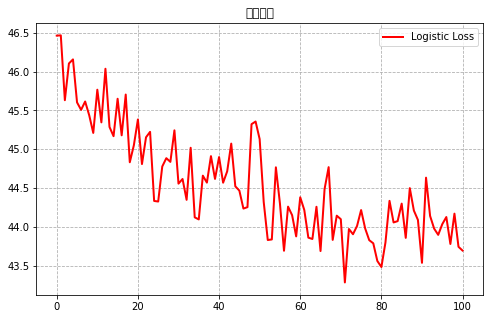

test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 0, total loss: 44.362396
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 1, total loss: 44.688916
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 44.151765
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 3, total loss: 44.135408
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 44.009282
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 5, total loss: 44.465674
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.840250
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 7, total loss: 43.910046
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 44.118041
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.692723
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.931028
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.241472
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.527371
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 43.563897
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.508089
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 43.075732
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.945856
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 93, total loss: 43.535714
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.182521
total_train_accuracy: tensor(0.9438, dev

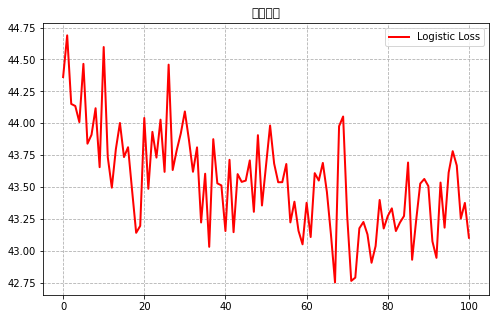

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.386737
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.482780
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.443300
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.005051
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.450460
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.724437
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.331761
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 43.277448
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 43.210454
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.322901
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.241217
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.397516
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.604859
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 43.238557
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.697806
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.834422
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 92, total loss: 43.203517
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.406831
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 42.874729
total_train_accuracy: tensor(0.9667, dev

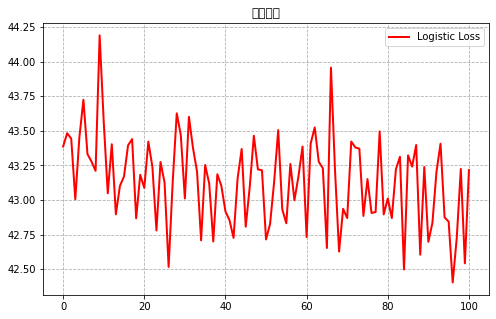

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.267236
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 1, total loss: 43.483568
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.984892
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.839410
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.888835
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.326951
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 43.181537
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.753614
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.833634
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 43.207025
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.637460
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.848912
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.128362
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.837658
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.649019
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 92, total loss: 42.212259
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.410802
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.629963
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 95, total loss: 42.665390
total_train_accuracy: tensor(0.9563, dev

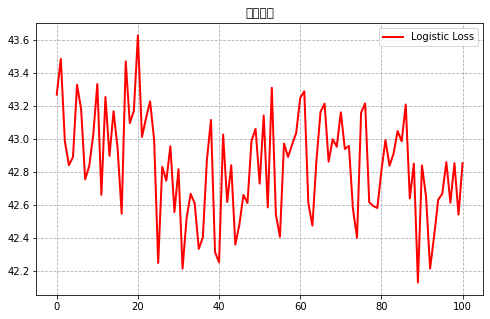

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.617804
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.691926
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.725606
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.007009
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.199424
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.477971
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.670090
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 7, total loss: 43.345832
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.845590
total_train_ac

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.405664
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 86, total loss: 42.986616
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.893630
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.779916
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.846261
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 43.034954
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.660842
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.765018
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.563840
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.721158
total_train_accuracy: tensor(0.9708, dev

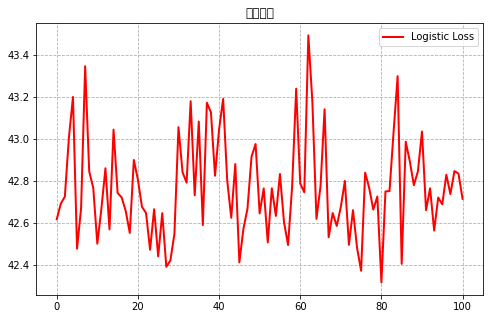

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.191526
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.033109
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.046904
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.006621
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.646672
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 43.069747
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.822130
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.719365
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 43.053575
total_train_accuracy: 

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 85, total loss: 43.033421
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.790532
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.641560
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.645258
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.749254
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.772694
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 42.950002
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.466835
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.497009
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 94, total loss: 43.292736
total_train_accuracy: tensor(0.9521, dev

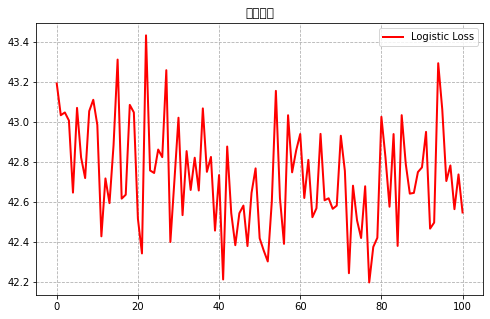

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.987375
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 42.903463
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.842773
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.709508
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 4, total loss: 42.264241
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.824352
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 6, total loss: 42.142772
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 42.891105
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.509495
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.944725
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.137108
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.396541
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 88, total loss: 41.971343
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.442451
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 42.855783
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.419520
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.544901
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.345232
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.104771
total_train_accuracy: tensor(0.9771, dev

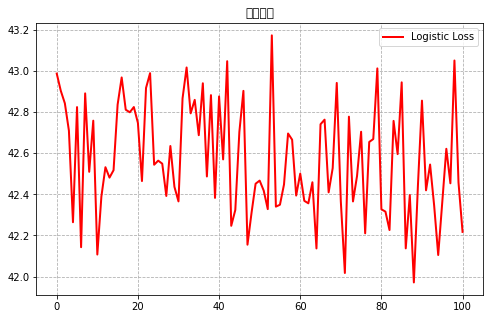

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.776288
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 42.759358
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 42.828870
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 42.963911
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.549383
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.675755
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.849390
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.798090
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.427244
total_train_accuracy: 

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.639138
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.463609
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.721907
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.594342
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.391590
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.228833
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.463648
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.270220
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.265826
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.303338
total_train_accuracy: tensor(0.9521, dev

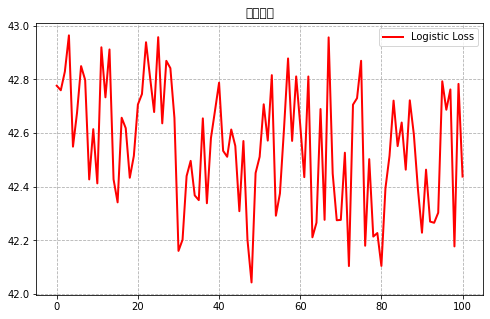

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 79
549 79
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.121533
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.937769
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.872144
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.273519
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.327383
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.299682
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 6, total loss: 42.772354
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.535461
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.658419
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.581859
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.586116
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.480195
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 42.528881
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.382268
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.345871
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.326716
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.530585
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.478838
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.266535
total_train_accuracy: tensor(0.9688, dev

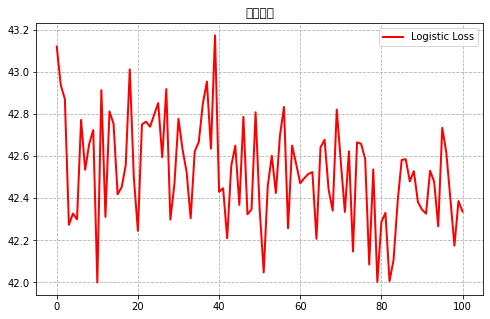

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.875, dtype=float32), array(0.9166667, dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9520834


In [17]:
#train model with new features of 94
model=model11
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvAttMLP/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP11(
  (bn0): BatchNorm1d(78, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=78, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 79
f1_score:  %.4f 0.8834818292713029
accuracy_score: 0.8840579710144928
recall_score: 0.886874715698245
pre_recall: 0.8862610229276897
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

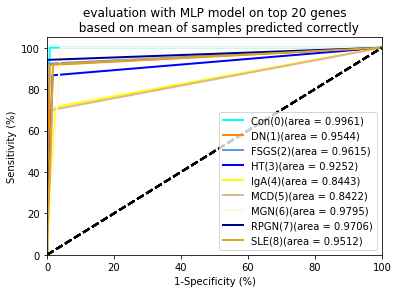

In [13]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvAttMLP/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP11()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [ ]:
#for 20_genes

#MLP_top 20 and ConvMLP4_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP4/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


In [6]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP4_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLP4_test_info.csv')



9
columns: ['ELF3', 'IFIT2', 'RPL37A', 'CFB', 'BDKRB2', 'RHOB', 'IFI30', 'GPX2', 'MEST', 'label']
(549, 10)
(138, 10)


549 10
549 10


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:571: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2333, device='cuda:0')
Training Epoch: 0, total loss: 64.391588
total_train_accuracy: tensor(0.3292, device='cuda:0')
Training Epoch: 1, total loss: 62.999452
total_train_accuracy: tensor(0.3938, device='cuda:0')
Training Epoch: 2, total loss: 62.136420
total_train_accuracy: tensor(0.3250, device='cuda:0')
Training Epoch: 3, total loss: 62.398980
total_train_accuracy: tensor(0.4354, device='cuda:0')
Training Epoch: 4, total loss: 61.464906
total_train_accuracy: tensor(0.4313, device='cuda:0')
Training Epoch: 5, total loss: 61.241626
total_train_accuracy: tensor(0.4250, device='cuda:0')
Training Epoch: 6, total loss: 61.100346
total_train_accuracy: tensor(0.4292, device='cuda:0')
Training Epoch: 7, total loss: 61.054985
total_train_accuracy: tensor(0.4417, device='cuda:0')
Training Epoch: 8, total loss: 60.627738
total_train_accuracy: tensor(0.4646, device='cuda:0')
Training Epoch: 9, total loss: 60.534905
total_train_accuracy: tensor(0.4146, device='cuda:

total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 87, total loss: 55.428447
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 88, total loss: 56.468638
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 89, total loss: 56.788181
total_train_accuracy: tensor(0.5417, device='cuda:0')
Training Epoch: 90, total loss: 55.888609
total_train_accuracy: tensor(0.5646, device='cuda:0')
Training Epoch: 91, total loss: 55.692837
total_train_accuracy: tensor(0.5500, device='cuda:0')
Training Epoch: 92, total loss: 55.917395
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 93, total loss: 56.288020
total_train_accuracy: tensor(0.5563, device='cuda:0')
Training Epoch: 94, total loss: 55.962848
total_train_accuracy: tensor(0.5083, device='cuda:0')
Training Epoch: 95, total loss: 56.411143
total_train_accuracy: tensor(0.5542, device='cuda:0')
Training Epoch: 96, total loss: 55.764459
total_train_accuracy: tensor(0.5292, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new

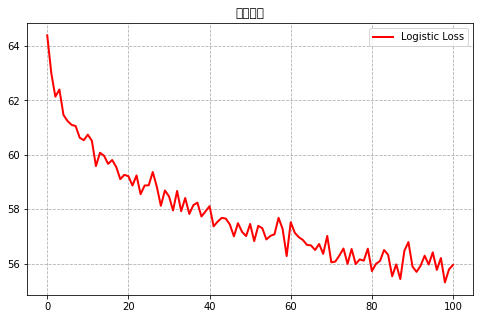

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:608: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:609: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.5417, device='cuda:0')
acc_test_each_k: tensor(0.5417, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5667, device='cuda:0')
Training Epoch: 0, total loss: 55.350237
total_train_accuracy: tensor(0.5500, device='cuda:0')
Training Epoch: 1, total loss: 56.189107
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 2, total loss: 56.326273
total_train_accuracy: tensor(0.5479, device='cuda:0')
Training Epoch: 3, total loss: 55.516209
total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 4, total loss: 55.371933
total_train_accuracy: tensor(0.5521, device='cuda:0')
Training Epoch: 5, total loss: 55.644258
total_train_accuracy: tensor(0.5354, device='cuda:0')
Training Epoch: 6, total loss: 55.858205
total_train_accuracy: tensor(0.5771, device='cuda:0')
Training Epoch: 7, total loss: 55.449647
total_train_accuracy: tensor(0.5292, device='cuda:0')
Training Epoch: 8, total loss: 56.173011
total_train_ac

total_train_accuracy: tensor(0.5563, device='cuda:0')
Training Epoch: 85, total loss: 54.922125
total_train_accuracy: tensor(0.5729, device='cuda:0')
Training Epoch: 86, total loss: 54.374518
total_train_accuracy: tensor(0.5875, device='cuda:0')
Training Epoch: 87, total loss: 54.369648
total_train_accuracy: tensor(0.5583, device='cuda:0')
Training Epoch: 88, total loss: 55.120425
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 89, total loss: 54.656954
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 90, total loss: 54.116350
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 91, total loss: 54.000062
total_train_accuracy: tensor(0.5792, device='cuda:0')
Training Epoch: 92, total loss: 54.605366
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 93, total loss: 54.321997
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 94, total loss: 53.999394
total_train_accuracy: tensor(0.5625, dev

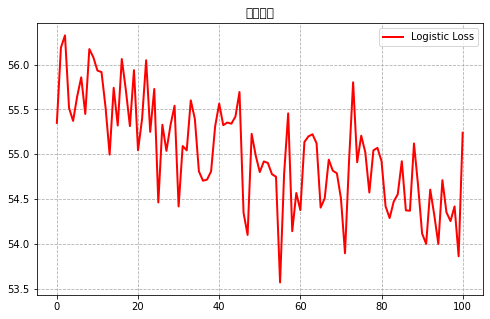

test
test
test
total_test_accuracy: tensor(0.5625, device='cuda:0')
acc_test_each_k: tensor(0.5625, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5938, device='cuda:0')
Training Epoch: 0, total loss: 54.121958
total_train_accuracy: tensor(0.5729, device='cuda:0')
Training Epoch: 1, total loss: 54.632923
total_train_accuracy: tensor(0.5479, device='cuda:0')
Training Epoch: 2, total loss: 55.185449
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 3, total loss: 53.967491
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 4, total loss: 53.994728
total_train_accuracy: tensor(0.5438, device='cuda:0')
Training Epoch: 5, total loss: 55.074224
total_train_accuracy: tensor(0.5542, device='cuda:0')
Training Epoch: 6, total loss: 54.873856
total_train_accuracy: tensor(0.5917, device='cuda:0')
Training Epoch: 7, total loss: 54.043665
total_train_accuracy: tensor(0.5583, device='cuda:0')
Training Epoch: 8, total loss: 54.954945
total_train_ac

total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 86, total loss: 53.598366
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 87, total loss: 53.394104
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 88, total loss: 53.571125
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 89, total loss: 53.546249
total_train_accuracy: tensor(0.6708, device='cuda:0')
Training Epoch: 90, total loss: 51.755647
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 91, total loss: 53.104676
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 92, total loss: 53.064413
total_train_accuracy: tensor(0.6188, device='cuda:0')
Training Epoch: 93, total loss: 53.155248
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 94, total loss: 53.703132
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 95, total loss: 53.748842
total_train_accuracy: tensor(0.6208, dev

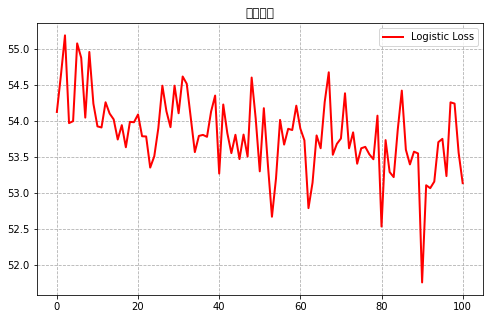

test
test
test
total_test_accuracy: tensor(0.4792, device='cuda:0')
acc_test_each_k: tensor(0.4792, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 0, total loss: 53.624635
total_train_accuracy: tensor(0.5833, device='cuda:0')
Training Epoch: 1, total loss: 54.274895
total_train_accuracy: tensor(0.5667, device='cuda:0')
Training Epoch: 2, total loss: 54.542666
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 3, total loss: 53.693063
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 53.159885
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 5, total loss: 53.353871
total_train_accuracy: tensor(0.5708, device='cuda:0')
Training Epoch: 6, total loss: 54.225756
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 7, total loss: 53.852425
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 8, total loss: 53.647518
total_train_ac

total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 85, total loss: 53.891570
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 86, total loss: 53.158014
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 87, total loss: 52.974707
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 88, total loss: 53.721052
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 89, total loss: 52.488994
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 90, total loss: 53.370426
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 91, total loss: 53.036182
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 92, total loss: 53.599219
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 93, total loss: 52.689638
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 94, total loss: 53.048938
total_train_accuracy: tensor(0.6188, dev

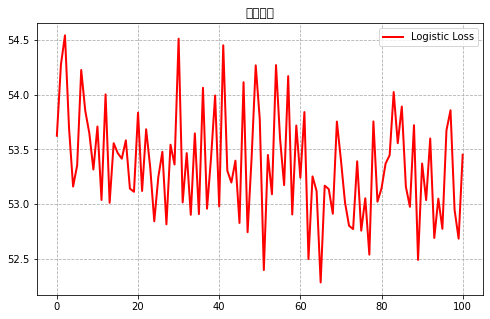

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 0, total loss: 53.430543
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 1, total loss: 52.795781
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 53.305220
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 52.863064
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 53.077437
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 5, total loss: 53.634251
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 6, total loss: 52.849345
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 7, total loss: 53.463776
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 8, total loss: 52.849040
total_train_ac

total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 86, total loss: 52.212492
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 87, total loss: 52.787673
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 88, total loss: 52.393468
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 89, total loss: 52.206464
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 90, total loss: 52.966445
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 91, total loss: 52.338185
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 92, total loss: 52.073469
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 93, total loss: 52.799087
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 94, total loss: 53.221067
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 95, total loss: 52.112818
total_train_accuracy: tensor(0.6292, dev

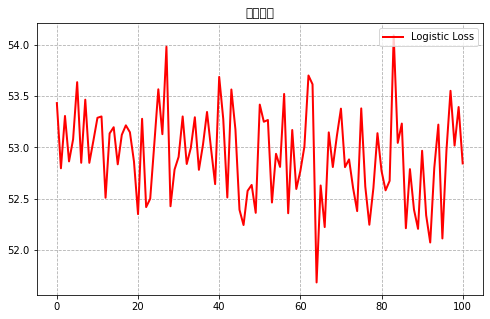

test
test
test
total_test_accuracy: tensor(0.6458, device='cuda:0')
acc_test_each_k: tensor(0.6458, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 0, total loss: 53.416675
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 1, total loss: 53.063634
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 2, total loss: 54.460636
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 3, total loss: 53.505441
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 4, total loss: 52.744288
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 5, total loss: 53.068178
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 6, total loss: 53.513530
total_train_accuracy: tensor(0.5792, device='cuda:0')
Training Epoch: 7, total loss: 53.965603
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 8, total loss: 53.077908
total_train_ac

total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 86, total loss: 52.896623
total_train_accuracy: tensor(0.6292, device='cuda:0')
Training Epoch: 87, total loss: 52.697724
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 88, total loss: 53.752937
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 89, total loss: 53.278857
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 90, total loss: 53.049474
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 91, total loss: 52.320709
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 92, total loss: 52.404772
total_train_accuracy: tensor(0.6458, device='cuda:0')
Training Epoch: 93, total loss: 51.956954
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 94, total loss: 53.807760
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 95, total loss: 53.353430
total_train_accuracy: tensor(0.6438, dev

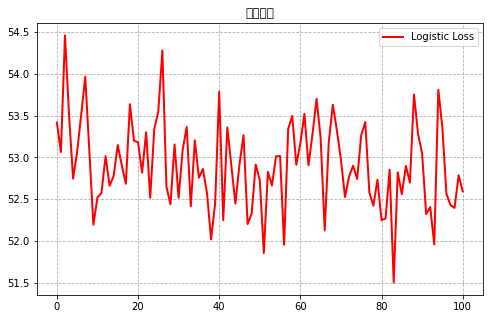

test
test
test
total_test_accuracy: tensor(0.6875, device='cuda:0')
acc_test_each_k: tensor(0.6875, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 0, total loss: 52.981811
total_train_accuracy: tensor(0.5958, device='cuda:0')
Training Epoch: 1, total loss: 53.567169
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 2, total loss: 52.441828
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 3, total loss: 53.477797
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 4, total loss: 52.018149
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 5, total loss: 52.147467
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 6, total loss: 52.506110
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 7, total loss: 52.685982
total_train_accuracy: tensor(0.5875, device='cuda:0')
Training Epoch: 8, total loss: 53.598582
total_train_ac

total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 85, total loss: 52.067122
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 86, total loss: 52.689902
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 87, total loss: 52.311543
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 88, total loss: 52.257043
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 89, total loss: 52.128082
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 90, total loss: 52.831941
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 91, total loss: 52.867105
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 92, total loss: 52.799971
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 93, total loss: 53.010858
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 94, total loss: 52.702583
total_train_accuracy: tensor(0.6396, dev

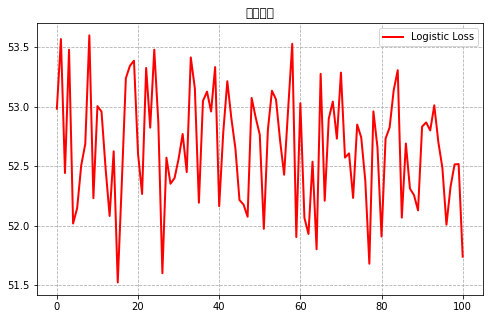

test
test
test
total_test_accuracy: tensor(0.7708, device='cuda:0')
acc_test_each_k: tensor(0.7708, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 0, total loss: 53.069371
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 1, total loss: 52.921998
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 2, total loss: 53.411967
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 52.957614
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 4, total loss: 53.066437
total_train_accuracy: tensor(0.6125, device='cuda:0')
Training Epoch: 5, total loss: 53.159962
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 6, total loss: 52.906973
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 7, total loss: 52.416748
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 8, total loss: 52.906700
total_train_ac

total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 85, total loss: 52.873814
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 86, total loss: 52.859887
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 87, total loss: 52.204174
total_train_accuracy: tensor(0.6479, device='cuda:0')
Training Epoch: 88, total loss: 51.838533
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 89, total loss: 52.338020
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 90, total loss: 52.886005
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 91, total loss: 53.607487
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 92, total loss: 52.885856
total_train_accuracy: tensor(0.6521, device='cuda:0')
Training Epoch: 93, total loss: 51.962901
total_train_accuracy: tensor(0.6563, device='cuda:0')
Training Epoch: 94, total loss: 51.993553
total_train_accuracy: tensor(0.6271, dev

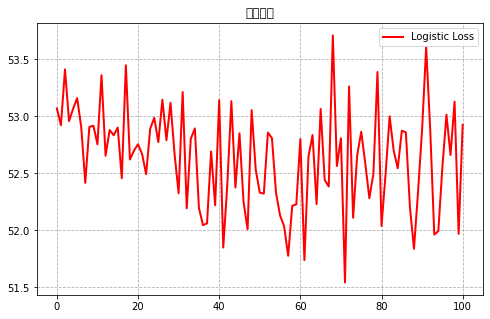

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.5979, device='cuda:0')
Training Epoch: 0, total loss: 53.301491
total_train_accuracy: tensor(0.6313, device='cuda:0')
Training Epoch: 1, total loss: 52.585944
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 2, total loss: 52.576352
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 52.269304
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 4, total loss: 52.445824
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 5, total loss: 52.569813
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 6, total loss: 52.531763
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 7, total loss: 52.783862
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 8, total loss: 52.745005
total_train_ac

total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 86, total loss: 51.529525
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 87, total loss: 52.377856
total_train_accuracy: tensor(0.6250, device='cuda:0')
Training Epoch: 88, total loss: 52.809641
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 89, total loss: 52.580182
total_train_accuracy: tensor(0.6479, device='cuda:0')
Training Epoch: 90, total loss: 52.145189
total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 91, total loss: 52.217179
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 92, total loss: 52.410726
total_train_accuracy: tensor(0.6083, device='cuda:0')
Training Epoch: 93, total loss: 52.850746
total_train_accuracy: tensor(0.6292, device='cuda:0')
Training Epoch: 94, total loss: 52.684645
total_train_accuracy: tensor(0.5938, device='cuda:0')
Training Epoch: 95, total loss: 53.466576
total_train_accuracy: tensor(0.6229, dev

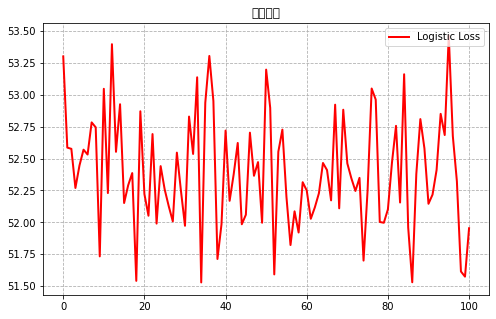

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
549 10
549 10
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 0, total loss: 52.787968
total_train_accuracy: tensor(0.6021, device='cuda:0')
Training Epoch: 1, total loss: 53.526280
total_train_accuracy: tensor(0.6188, device='cuda:0')
Training Epoch: 2, total loss: 52.957119
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 52.300336
total_train_accuracy: tensor(0.6563, device='cuda:0')
Training Epoch: 4, total loss: 51.792578
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 5, total loss: 53.044109
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 6, total loss: 51.634214
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 7, total loss: 52.407257
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 8, total loss: 52.458974
total_train_ac

total_train_accuracy: tensor(0.6417, device='cuda:0')
Training Epoch: 85, total loss: 52.193936
total_train_accuracy: tensor(0.6375, device='cuda:0')
Training Epoch: 86, total loss: 52.350030
total_train_accuracy: tensor(0.6771, device='cuda:0')
Training Epoch: 87, total loss: 51.263756
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 88, total loss: 52.818393
total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 89, total loss: 51.570077
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 90, total loss: 52.198685
total_train_accuracy: tensor(0.6688, device='cuda:0')
Training Epoch: 91, total loss: 51.459067
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 92, total loss: 52.901258
total_train_accuracy: tensor(0.5896, device='cuda:0')
Training Epoch: 93, total loss: 53.651715
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 94, total loss: 51.926160
total_train_accuracy: tensor(0.6313, dev

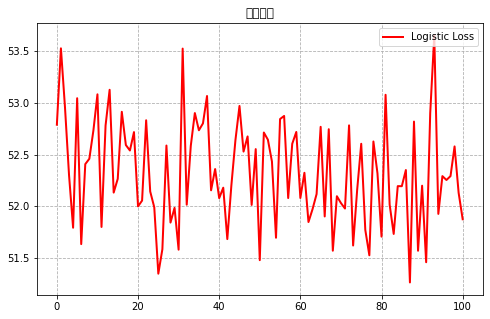

test
test
test
total_test_accuracy: tensor(0.7292, device='cuda:0')
acc_test_each_k: tensor(0.7292, device='cuda:0')
[tensor(0.5417, device='cuda:0'), tensor(0.5625, device='cuda:0'), tensor(0.4792, device='cuda:0'), tensor(0.7292, device='cuda:0'), tensor(0.6458, device='cuda:0'), tensor(0.6875, device='cuda:0'), tensor(0.7708, device='cuda:0'), tensor(0.8125, device='cuda:0'), tensor(0.7292, device='cuda:0'), tensor(0.7292, device='cuda:0')]
[array(0.5416667, dtype=float32), array(0.5625, dtype=float32), array(0.4791667, dtype=float32), array(0.7291667, dtype=float32), array(0.6458334, dtype=float32), array(0.6875, dtype=float32), array(0.7708334, dtype=float32), array(0.8125, dtype=float32), array(0.7291667, dtype=float32), array(0.7291667, dtype=float32)]
acc_test_metrics: 0.66875


In [8]:
#train model with new features of 94
model=model8
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLP4/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP8(
  (bn0): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=9, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 10
f1_score:  %.4f 0.5660207616629784
accuracy_score: 0.5942028985507246
recall_score: 0.571604539251598
pre_recall: 0.5848178872688676
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

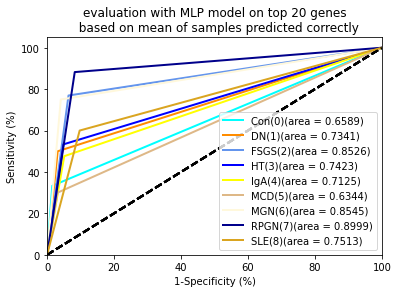

In [9]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLP4/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP8()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLP4_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [14]:
#for 20_genes
#ConvMLP4_top 20 and ConvMLP2_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP4/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'MT2A']
intersecion_list: ['NDUFA13']
intersecion_list: ['MEST']
intersecion_list: []
intersecion_list: []
intersecion_list: ['IFI6']
intersecion_list: ['BDKRB2']
intersecion_list: ['GPX2', 'MISP', 'CFB']
intersecion_list: []


In [15]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP4_ConvMLP2_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP4_ConvMLP2_test_info.csv')



9
columns: ['CFB', 'NDUFA13', 'BDKRB2', 'IFI6', 'RHOB', 'MISP', 'MT2A', 'GPX2', 'MEST', 'label']
(549, 10)
(138, 10)


549 87
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:570: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:571: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2854, device='cuda:0')
Training Epoch: 0, total loss: 63.820733
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.654648
total_train_accuracy: tensor(0.6063, device='cuda:0')
Training Epoch: 2, total loss: 58.785515
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 3, total loss: 57.876879
total_train_accuracy: tensor(0.7042, device='cuda:0')
Training Epoch: 4, total loss: 57.078492
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 5, total loss: 56.418830
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 6, total loss: 55.430598
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 7, total loss: 55.076296
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 8, total loss: 54.775761
total_train_accuracy: tensor(0.7625, device='cuda:0')
Training Epoch: 9, total loss: 54.277721
total_train_accuracy: tensor(0.7813, device='cuda:

total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 87, total loss: 45.489443
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 88, total loss: 45.791685
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 89, total loss: 46.196720
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 90, total loss: 46.417919
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 91, total loss: 45.183034
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 44.873008
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 93, total loss: 45.430728
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 94, total loss: 44.934317
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 95, total loss: 45.770429
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 96, total loss: 45.324440
total_train_accuracy: tensor(0.9479, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

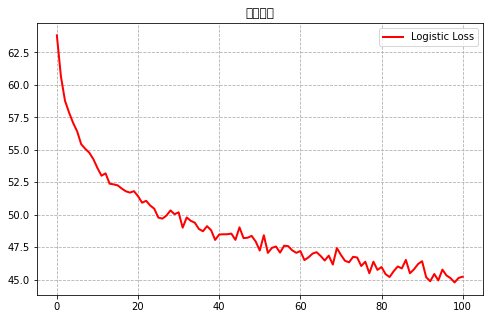

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:608: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:609: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 87
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 0, total loss: 45.678097
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 1, total loss: 45.824802
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 2, total loss: 45.444296
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 3, total loss: 45.711716
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 4, total loss: 45.314387
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 45.458309
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 44.978189
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.331649
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.216964
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 9, total loss: 45.625592
total_train_accuracy: tensor(0.9042, device

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.896901
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.560231
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.520674
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 43.526345
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 44.164907
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.722381
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.517278
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 44.068857
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 43.829670
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 95, total loss: 44.112094
total_train_accuracy: tensor(0.9583, dev

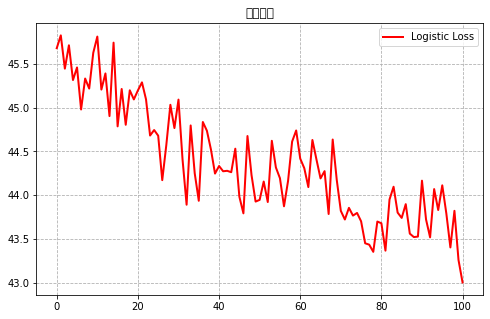

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.954343
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 44.026226
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 2, total loss: 44.222533
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 43.963348
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 4, total loss: 44.019059
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 44.088722
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.659830
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.571757
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 8, total loss: 43.964174
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 43.012976
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.716990
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.675664
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.067263
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 43.003269
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.638248
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.955637
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.147795
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 93, total loss: 43.257467
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 43.230389
total_train_accuracy: tensor(0.9729, dev

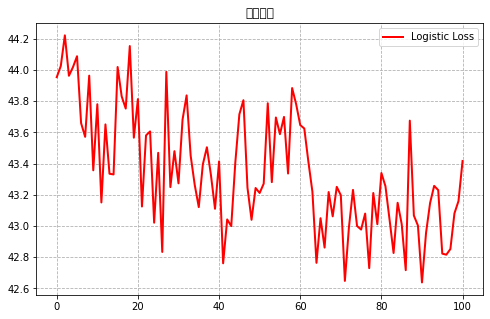

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 0, total loss: 43.853905
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.883402
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.067210
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 3, total loss: 43.338738
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 43.457403
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 5, total loss: 43.672886
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 6, total loss: 43.855475
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.807379
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 43.288137
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 43.210076
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.878379
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.001540
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 43.297190
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.878829
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.134293
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.830342
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.829931
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.916204
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 95, total loss: 43.029874
total_train_accuracy: tensor(0.9521, dev

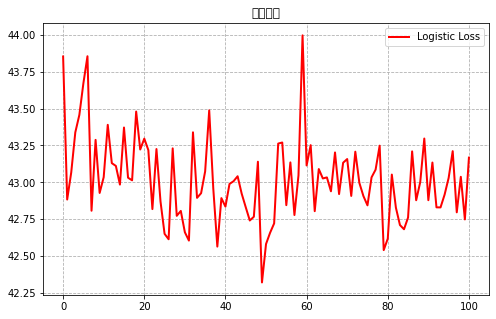

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.809871


KeyboardInterrupt: 

In [13]:
#train model with new features of 94
model=model7
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP4_ConvMLP2_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP4_ConvMLP2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [ ]:
#for 20_genes
#MLP_top 20 and ConvvMLP2_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


In [2]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_test_info.csv')



86
columns: ['LYPLA1', 'SPI1', 'PCK1', 'GDF15', 'CYP2J2', 'NDUFB1', 'GPX3', 'ABCC3', 'RHOB', 'CHP1', 'ACLY', 'DEPTOR', 'MRPS15', 'AGL', 'COMMD10', 'UGDH', 'KLF6', 'METTL9', 'ACP6', 'MRPL19', 'CTSG', 'GPX2', 'BDKRB2', 'LIPC', 'NR0B2', 'VAMP8', 'NONO', 'ACTA2', 'HERC5', 'GEMIN6', 'DUSP6', 'WASHC3', 'ABHD2', 'TESC', 'EPM2AIP1', 'PTP4A1', 'VTCN1', 'PPP6R1', 'AFP', 'WARS2', 'ANKRD2', 'TRIM14', 'IFI44L', 'ADM2', 'CAMLG', 'RRM2', 'RPL38', 'RGN', 'ACTL8', 'MEST', 'TRA2A', 'ZNHIT1', 'EEF1AKMT3', 'COL4A3BP', 'ATP6V1F', 'BCCIP', 'RGS5', 'ABCB7', 'ENPP2', 'NDUFA13', 'CGREF1', 'ACAD10', 'VDR', 'SLC3A2', 'SH3BP2', 'CFB', 'RHOBTB1', 'TMEM100', 'ADI1', 'EGLN3', 'CTTN', 'CFLAR', 'RPS27L', 'ABCD3', 'PTMS', 'LHPP', 'COX15', 'ISCU', 'FST', 'ITGB3BP', 'MRPS16', 'IFI6', 'UCHL1', 'IFIT1', 'ATP5IF1', 'NUDT4', 'label']
(549, 87)
(138, 87)


549 87
549 87


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:550: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:551: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2708, device='cuda:0')
Training Epoch: 0, total loss: 63.968767
total_train_accuracy: tensor(0.5208, device='cuda:0')
Training Epoch: 1, total loss: 60.442196
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 2, total loss: 59.396495
total_train_accuracy: tensor(0.6396, device='cuda:0')
Training Epoch: 3, total loss: 58.104572
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 4, total loss: 57.197053
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 5, total loss: 56.411910
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 6, total loss: 55.447482
total_train_accuracy: tensor(0.7250, device='cuda:0')
Training Epoch: 7, total loss: 55.604316
total_train_accuracy: tensor(0.7583, device='cuda:0')
Training Epoch: 8, total loss: 54.727369
total_train_accuracy: tensor(0.7958, device='cuda:0')
Training Epoch: 9, total loss: 54.064585
total_train_accuracy: tensor(0.7875, device='cuda:

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 87, total loss: 45.500739
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 45.056843
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 89, total loss: 45.599275
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 45.212012
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 45.645249
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 92, total loss: 45.514960
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.481279
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 45.902900
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 45.122974
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 96, total loss: 46.560856
total_train_accuracy: tensor(0.9271, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 100, total loss: 45.396683
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


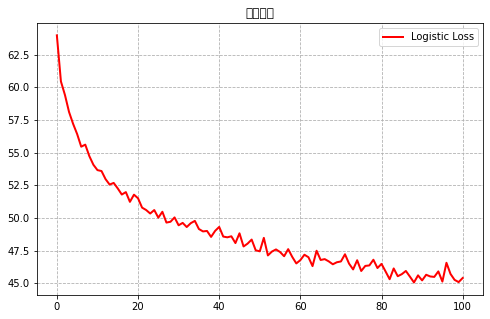

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:588: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:589: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 0, total loss: 45.742929
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 1, total loss: 46.288337
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.088354
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 45.192545
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 4, total loss: 45.326448
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 5, total loss: 45.112977
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 6, total loss: 45.425113
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 7, total loss: 45.397063
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.308966
total_train_ac

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 43.548717
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 43.570976
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.241467
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.785940
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 44.075093
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 43.212087
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.541631
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 92, total loss: 43.509945
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.443349
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.495623
total_train_accuracy: tensor(0.9583, dev

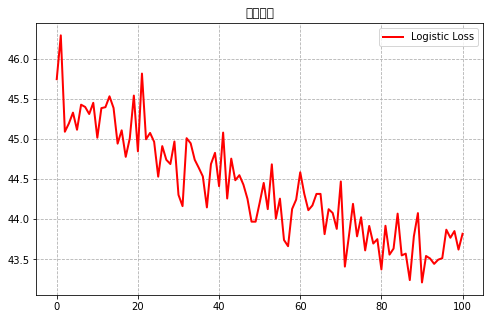

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 0, total loss: 44.223258
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 1, total loss: 44.220280
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 2, total loss: 44.352578
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 44.340475
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.714777
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 43.609536
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 44.445553
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.627688
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 43.637972
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.997337
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 86, total loss: 43.914109
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.955918
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.026520
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 43.051063
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.908718
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.691284
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.551838
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.908172
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.289728
total_train_accuracy: tensor(0.9792, dev

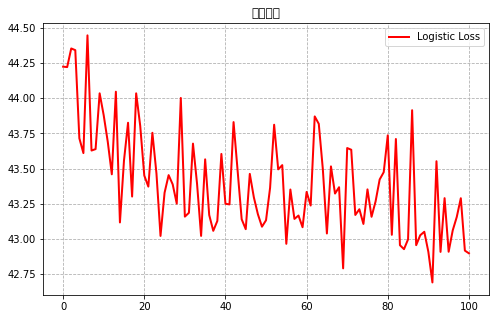

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.182762
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 43.833170
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.276693
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.249135
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.939636
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.739938
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.335850
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.321395
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 43.577993
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.554064
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.479284
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 43.150597
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.879083
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.215012
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.807576
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.836135
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.690299
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 93, total loss: 43.587168
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.974115
total_train_accuracy: tensor(0.9771, dev

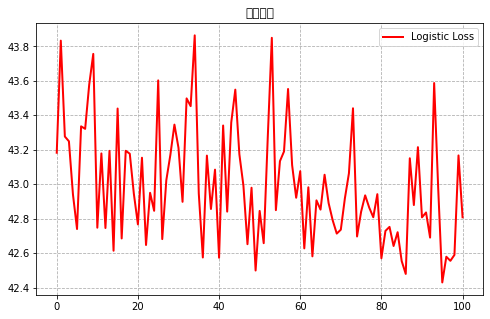

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.398310
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.987536
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.277479
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 3, total loss: 43.611858
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.060657
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.618878
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.826862
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.148847
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.830664
total_train_ac

total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 85, total loss: 43.169504
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.535491
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.666451
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.776903
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.782464
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.399838
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.126807
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 92, total loss: 42.106189
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.480332
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.223024
total_train_accuracy: tensor(0.9750, dev

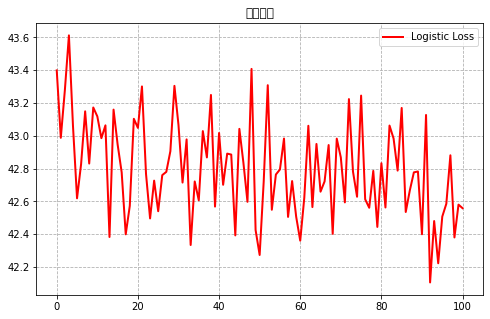

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.352986
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.730661
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.022961
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.878080
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.899897
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.464256
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.880562
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 42.899920
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.404684
total_train_ac

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.711859
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.602878
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.811024
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 42.957508
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.515783
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.960022
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.663006
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.818403
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 93, total loss: 42.954222
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.336646
total_train_accuracy: tensor(0.9604, dev

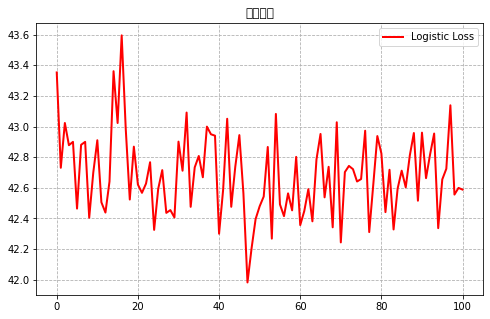

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.724832
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.828567
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.109126
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.567159
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.848087
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.675659
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.570169
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.766929
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.837257
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.448015
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.431830
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.478868
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.406165
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.487956
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.134379
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.165095
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.631002
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.870212
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.639099
total_train_accuracy: tensor(0.9688, dev

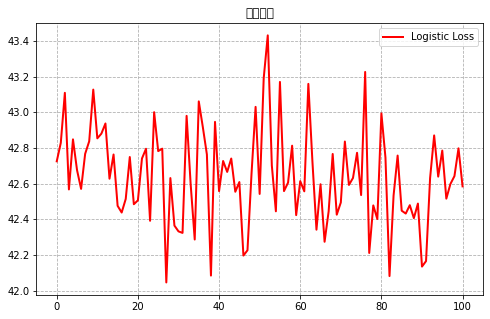

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.661035
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.707805
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.729032
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 3, total loss: 42.318726
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 42.958254
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.475429
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.754459
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.665817
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.449027
total_train_accuracy: 

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.246608
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.117012
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.620815
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.367328
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.690988
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.799464
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.716270
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.564885
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.579423
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.714348
total_train_accuracy: tensor(0.9646, dev

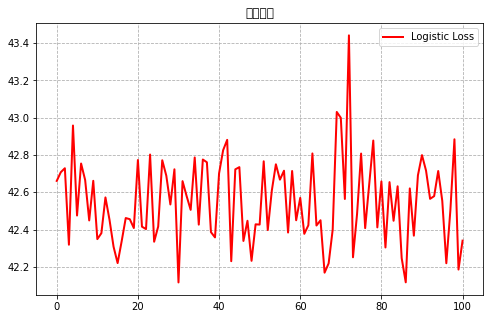

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 42.852083
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.472640
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 42.962312
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.700471
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 4, total loss: 43.321981
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.363080
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.440832
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.407594
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.359512
total_train_accuracy: 

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.198129
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.278478
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.270174
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.665790
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.583185
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.295277
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.048035
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.160544
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.319280
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.528167
total_train_accuracy: tensor(0.9708, dev

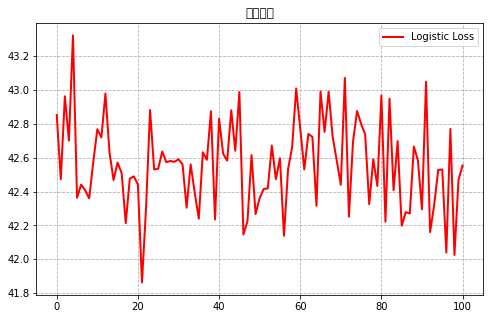

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 87
549 87
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.053507
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.541743
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 42.738322
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.496153
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.009675
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.225273
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 42.904547
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.395918
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.855053
total_train_accuracy: 

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.422922
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.084641
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.761583
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.008411
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.509762
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.287543
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.700490
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.421305
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.796096
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.398187
total_train_accuracy: tensor(0.9646, dev

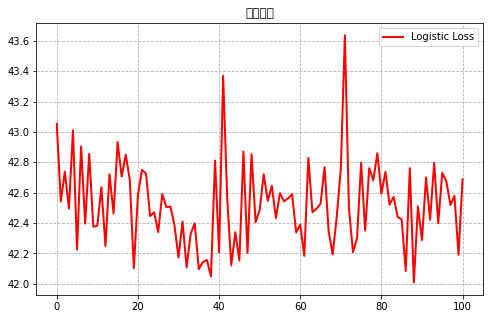

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8542, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8541667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.975


In [7]:
#train model with new features of 94
model=model7
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLP2/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP7(
  (bn0): BatchNorm1d(86, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=86, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 87
f1_score:  %.4f 0.8818464836008695
accuracy_score: 0.8913043478260869
recall_score: 0.8804196892432187
pre_recall: 0.8972718639385308
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

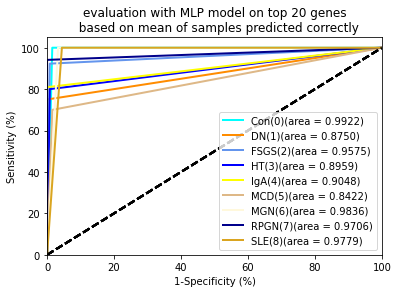

In [2]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLP2/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP7()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [8]:
#for 20_genes
#ConvAttMP_top 20 and NFM_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvAttMLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'EEF1AKMT3', 'NUDT4', 'DUSP6', 'IFI44L', 'ADPRM', 'ABCB7', 'KLF6', 'GDF15', 'ZNRF4', 'PCK1', 'LYPLA1', 'CYP39A1', 'IFI6', 'PTP4A1']
intersecion_list: ['MS4A4A', 'CHP1', 'LHPP', 'CHODL', 'LGMN', 'ZNHIT1', 'CTSG', 'VAMP8', 'RGS5', 'AGL', 'CYP2J2', 'RPS27L', 'IFI6']
intersecion_list: ['ISCU', 'TRA2A', 'VDR', 'NEAT1', 'ACTA2', 'COX15', 'ACP6', 'NDUFA13', 'METTL9', 'VTCN1', 'NR1D2', 'EPM2AIP1', 'MEST', 'CFLAR', 'FOS', 'TUBA4B', 'TFAP2A']
intersecion_list: ['RHOB', 'SLC3A2', 'ZNF593', 'TESC', 'ABCB4', 'KLF6', 'VAMP8', 'BHLHE40', 'UQCR10', 'FST', 'ATP6V1F', 'TYMP', 'IFI6']
intersecion_list: ['NUDT4', 'FCGBP', 'NONO', 'FKBP4', 'ITGB3BP', 'WASHC3', 'TMEM100', 'ECH1', 'PEG10', 'CPVL', 'LYPLA1', 'WDR12', 'LARP1', 'RPL38']
intersecion_list: ['COL4A3BP', 'IFIT1', 'RRM2', 'LGMN', 'MRPS16', 'PTMS', 'PAFAH1B3', 'LIPC', 'CHCHD3', 'EPM2AIP1', 'DEPTOR', 'ATP5IF1', 'IFI6']
intersecion_list: ['NDUFB1', 'ACAD10', 'NUDT4', 'PLIN3', 'ADI1', 'SPI1', 'ABLIM1', 'SERPINF1', 'UCHL1', 'OX

In [9]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvAttMLP_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvAttMLP_NFM_test_info.csv')



101
columns: ['UGDH', 'NDUFB1', 'LGMN', 'KLF6', 'MAP3K1', 'SPI1', 'RGS5', 'LIPC', 'ALB', 'VDR', 'GPX3', 'IFI6', 'TUBA4B', 'METTL9', 'CGREF1', 'KLF9', 'LHPP', 'TMEM100', 'ABCB4', 'COX15', 'PAFAH1B3', 'UQCR10', 'ZNRF4', 'ABHD2', 'UCHL1', 'PCK1', 'CYP2J2', 'DEPTOR', 'GPX2', 'ABLIM1', 'RHOB', 'ISCU', 'ZNF593', 'WASHC3', 'DUSP6', 'TESC', 'VAMP8', 'SERPINF1', 'CFB', 'CHCHD3', 'FST', 'TFAM', 'WDR12', 'OXCT1', 'TYMP', 'ACAD10', 'ADI1', 'PTMS', 'EPM2AIP1', 'TRIM14', 'RPS27L', 'ATP5IF1', 'FCGBP', 'NONO', 'BCCIP', 'IFI44L', 'CHODL', 'NEAT1', 'ZNHIT1', 'ITGB3BP', 'ACTA2', 'AGL', 'VTCN1', 'LYPLA1', 'LARP1', 'IFIT1', 'TFAP2A', 'ABCC3', 'SLC3A2', 'PLIN3', 'ADPRM', 'RRM2', 'ABCB7', 'NDUFA13', 'ATP6V1F', 'ACP6', 'MEST', 'CFLAR', 'CPVL', 'ECH1', 'RGN', 'EEF1AKMT3', 'NUDT4', 'FKBP4', 'MRPS16', 'PEG10', 'GDF15', 'NR1D2', 'CYP39A1', 'WASHC4', 'CTSG', 'RPL38', 'COL4A3BP', 'OLFML3', 'TRA2A', 'MS4A4A', 'CHP1', 'SH3BP2', 'BHLHE40', 'FOS', 'PTP4A1', 'label']
(549, 102)
(138, 102)


549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:653: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:654: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2708, device='cuda:0')
Training Epoch: 0, total loss: 63.806667
total_train_accuracy: tensor(0.4875, device='cuda:0')
Training Epoch: 1, total loss: 60.875030
total_train_accuracy: tensor(0.6167, device='cuda:0')
Training Epoch: 2, total loss: 59.077190
total_train_accuracy: tensor(0.6542, device='cuda:0')
Training Epoch: 3, total loss: 57.903915
total_train_accuracy: tensor(0.7146, device='cuda:0')
Training Epoch: 4, total loss: 57.005888
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 5, total loss: 56.018763
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 6, total loss: 55.388073
total_train_accuracy: tensor(0.7625, device='cuda:0')
Training Epoch: 7, total loss: 55.040463
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 8, total loss: 54.532771
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 9, total loss: 54.123885
total_train_accuracy: tensor(0.8292, device='cuda:

total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 87, total loss: 45.697930
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 88, total loss: 46.080584
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 89, total loss: 46.059105
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 90, total loss: 46.129133
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 91, total loss: 45.490293
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 92, total loss: 45.501547
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 93, total loss: 45.313975
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 94, total loss: 45.672309
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 95, total loss: 45.663539
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 96, total loss: 45.215367
total_train_accuracy: tensor(0.9271, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

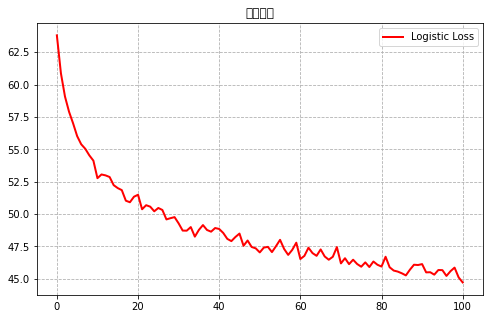

test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:691: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:692: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 102
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.387005
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 1, total loss: 46.050884
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 2, total loss: 46.045374
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 3, total loss: 45.935169
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 4, total loss: 45.266762
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 5, total loss: 45.904871
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 6, total loss: 45.787833
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 7, total loss: 45.760726
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 44.970701
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 9, total loss: 45.038847
total_train_accuracy: tensor(0.9313, devic

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.705477
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 87, total loss: 44.458738
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 88, total loss: 44.002902
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 43.641286
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 43.959416
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 44.161572
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.809931
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.700108
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.363717
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 95, total loss: 44.416145
total_train_accuracy: tensor(0.9625, dev

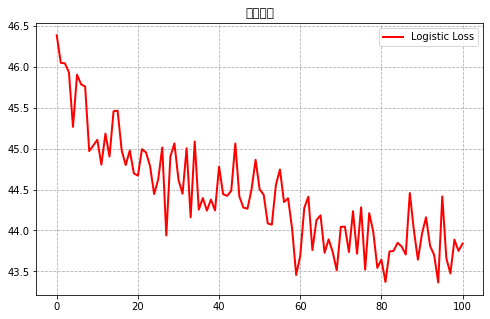

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.498184
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 1, total loss: 44.807069
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.607760
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 43.464561
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.468730
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 5, total loss: 43.926939
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 43.822080
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.474864
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 43.779389
total_train_

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.931070
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.220001
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.121065
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 43.164806
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.291778
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.846928
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 43.177753
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.666273
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.203083
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 94, total loss: 42.512498
total_train_accuracy: tensor(0.9604, dev

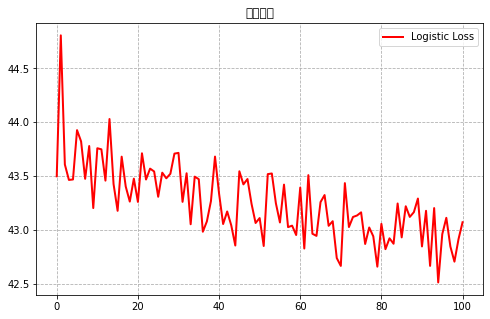

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.996316
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 43.345571
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.923792
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 43.049351
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 43.497117
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 43.245735
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.370387
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.259809
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.454168
total_train_

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.880120
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 43.317044
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.764106
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.285976
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.714689
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 43.410821
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.969722
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.626946
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.670191
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.499597
total_train_accuracy: tensor(0.9771, dev

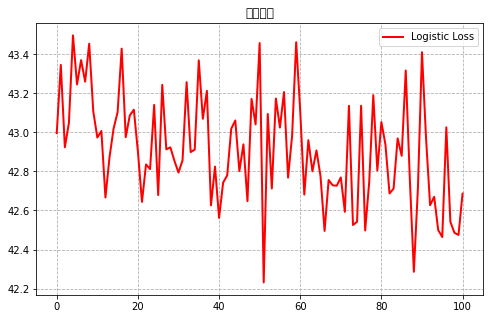

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.820938
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.412295
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.669139
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.699448
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.859105
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.804786
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.817190
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.012346
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.637707
total_train_accuracy

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.513653
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.633577
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.411935
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.464610
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.667417
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.776706
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.565109
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.920765
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.439679
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.417375
total_train_accuracy: tensor(0.9833, dev

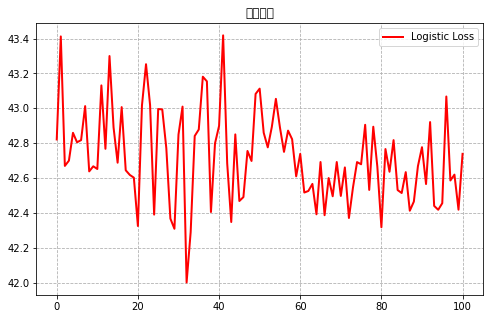

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.103316
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.145312
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.086648
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.756526
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.976397
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.626315
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.746987
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 7, total loss: 42.270413
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.720165
total_train_

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 42.937149
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.969338
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.569870
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.166044
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.682061
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.820274
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.735250
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.486602
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.494185
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.247903
total_train_accuracy: tensor(0.9604, dev

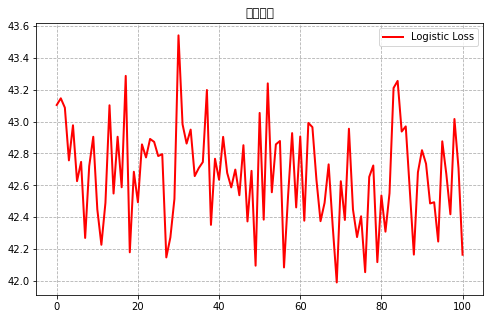

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.544773
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.802623
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 43.080918
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 3, total loss: 42.208464
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.470992
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.318170
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.497835
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.483429
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.472978
total_train_accuracy

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 85, total loss: 43.161155
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.511827
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.452701
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.375588
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.274886
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.375617
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 91, total loss: 42.063139
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.748082
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.329545
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.368639
total_train_accuracy: tensor(0.9729, dev

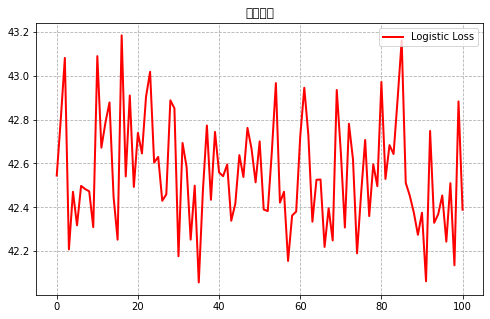

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.285149
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.545529
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.704906
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.408343
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.303436
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 5, total loss: 42.991481
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.886523
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.719027
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 42.918406
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.313755
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.517669
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.833863
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.082997
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.482533
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.452525
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.633910
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.947877
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.499161
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.429002
total_train_accuracy: tensor(0.9604, dev

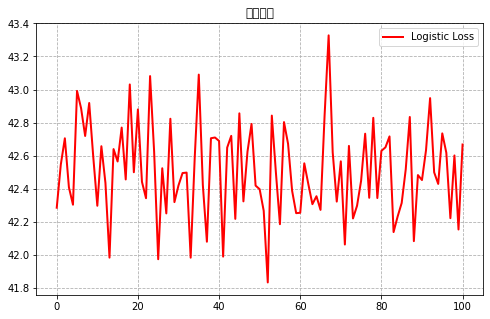

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.620710
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.363116
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.691592
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.454822
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.457442
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 42.731558
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.561161
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.297833
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.808230
total_train_accuracy

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.779909
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 42.778098
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.413845
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.413013
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.358232
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.906288
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 91, total loss: 41.995654
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.331652
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.470909
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 42.722731
total_train_accuracy: tensor(0.9479, dev

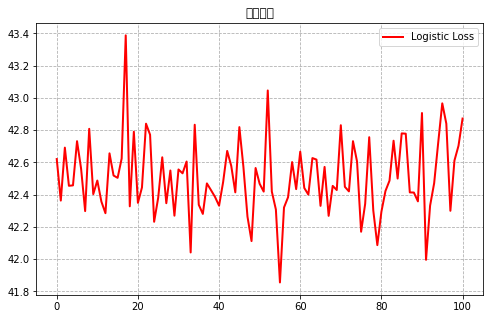

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.469956
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.340246
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 42.807562
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.158618
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.568921
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 42.950945
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.486206
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.517081
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.984260
total_train_accuracy

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 42.783659
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.267774
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.352481
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.412618
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 42.635569
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.367319
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.502102
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.608418
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.377003
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.692019
total_train_accuracy: tensor(0.9750, dev

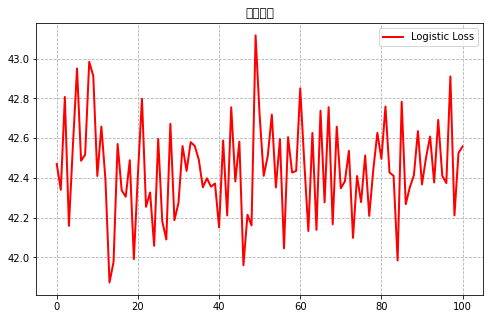

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8542, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8541667, dtype=float32), array(0.9166667, dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9645834


In [11]:
#train model with new features of 94
model=model12
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvAttMLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP12(
  (bn0): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=101, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 102
f1_score:  %.4f 0.888880721106439
accuracy_score: 0.8985507246376812
recall_score: 0.8896789485024779
pre_recall: 0.8960173631742259
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

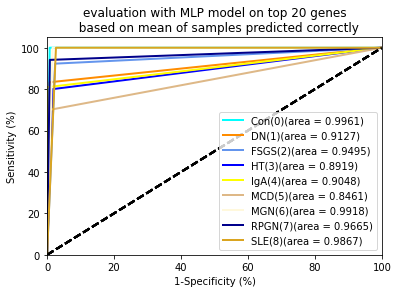

In [12]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/ConvAttMLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP12()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [2]:
#for 20_genes
#ConvMLP2_top 20 and NFM_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CYP39A1', 'RHOB', 'PTP4A1', 'KLF6', 'GPX3', 'DUSP6', 'ABCB7', 'EEF1AKMT3', 'PCK1', 'GDF15', 'IFI6', 'NUDT4', 'LYPLA1']
intersecion_list: ['CHP1', 'LGMN', 'RPS27L', 'SLC3A2', 'CHODL', 'LHPP', 'RGS5', 'CYP2J2', 'AGL', 'CTSG', 'IFI6', 'ZNHIT1', 'NDUFA13']
intersecion_list: ['MEST', 'CAMLG', 'COX15', 'TUBA4B', 'TFAP2A', 'VDR', 'CFLAR', 'EPM2AIP1', 'TRA2A', 'ACTA2', 'ACP6', 'NEAT1', 'NR1D2', 'METTL9', 'VTCN1', 'NDUFA13', 'ISCU']
intersecion_list: ['ATP6V1F', 'FST', 'SLC3A2', 'KLF6', 'BHLHE40', 'PCK1', 'TYMP', 'TESC', 'VAMP8', 'IFI6', 'UQCR10']
intersecion_list: ['FKBP4', 'NONO', 'ECH1', 'ACE', 'TMEM100', 'ITGB3BP', 'PEG10', 'WDR12', 'CPVL', 'WASHC3', 'AFP', 'EMX1', 'RPL38', 'LYPLA1']
intersecion_list: ['IFIT1', 'RRM2', 'LGMN', 'MRPS16', 'ATP5IF1', 'EPM2AIP1', 'ITGB3BP', 'DEPTOR', 'COL4A3BP', 'OLFML3', 'PTMS', 'LIPC', 'IFI6', 'CHCHD3']
intersecion_list: ['BDKRB2', 'WASHC4', 'WARS2', 'NDUFB1', 'UCHL1', 'NPIPB15', 'SPI1', 'OXCT1', 'RGN', 'ABLIM1', 'NUDT4', 'ACAD10', 'ABHD2'

In [3]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')



101
columns: ['LHPP', 'PEG10', 'DEPTOR', 'NDUFB1', 'CTSG', 'SH3BP2', 'CHODL', 'RPL38', 'BCCIP', 'RRM2', 'MAP3K1', 'RPS27L', 'TUBA4B', 'BDKRB2', 'PTP4A1', 'TMEM100', 'ATP5IF1', 'PCK1', 'CPVL', 'PTMS', 'IFI6', 'NUDT4', 'GPX2', 'NDUFA13', 'FKBP4', 'ECH1', 'CFLAR', 'IFI44L', 'VDR', 'ATP6V1F', 'RHOBTB1', 'SLC3A2', 'KLF6', 'ABLIM1', 'VAMP8', 'CGREF1', 'ACAD10', 'ADI1', 'COX15', 'MRPS16', 'ABCC3', 'TRA2A', 'ACP6', 'NEAT1', 'CYP2J2', 'AGL', 'ALB', 'LGMN', 'ACE', 'ACTA2', 'OLFML3', 'UCHL1', 'WASHC3', 'TESC', 'AFP', 'GDF15', 'METTL9', 'RGS5', 'UQCR10', 'ABHD2', 'PPP6R1', 'IFIT1', 'CHP1', 'EPM2AIP1', 'ITGB3BP', 'ABCB7', 'DUSP6', 'WDR12', 'CFB', 'SPI1', 'TYMP', 'OXCT1', 'LIPC', 'NR1D2', 'EMX1', 'ZNHIT1', 'VTCN1', 'UGDH', 'CHCHD3', 'CAMLG', 'CYP39A1', 'TFAP2A', 'RHOB', 'WASHC4', 'BHLHE40', 'NPIPB15', 'KLF9', 'ANKRD2', 'LYPLA1', 'NONO', 'MEST', 'FST', 'TRIM14', 'WARS2', 'GPX3', 'COL4A3BP', 'MS4A4A', 'EEF1AKMT3', 'RGN', 'HERC5', 'ISCU', 'label']
(549, 102)
(138, 102)


549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:590: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:591: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2438, device='cuda:0')
Training Epoch: 0, total loss: 64.156497
total_train_accuracy: tensor(0.5104, device='cuda:0')
Training Epoch: 1, total loss: 60.288840
total_train_accuracy: tensor(0.5813, device='cuda:0')
Training Epoch: 2, total loss: 58.965264
total_train_accuracy: tensor(0.7063, device='cuda:0')
Training Epoch: 3, total loss: 57.349963
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 4, total loss: 56.490477
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 5, total loss: 55.916121
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 6, total loss: 55.366327
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 7, total loss: 55.139959
total_train_accuracy: tensor(0.7979, device='cuda:0')
Training Epoch: 8, total loss: 53.946121
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 9, total loss: 53.719803
total_train_accuracy: tensor(0.7813, device='cuda:

total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 86, total loss: 45.402965
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 44.833310
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 88, total loss: 45.709269
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 89, total loss: 45.796954
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 90, total loss: 46.046156
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 91, total loss: 45.549214
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 92, total loss: 45.458012
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.401405
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 94, total loss: 45.458650
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 95, total loss: 45.480515
total_train_accuracy: tensor(0.9146, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 100, total loss: 45.359780
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


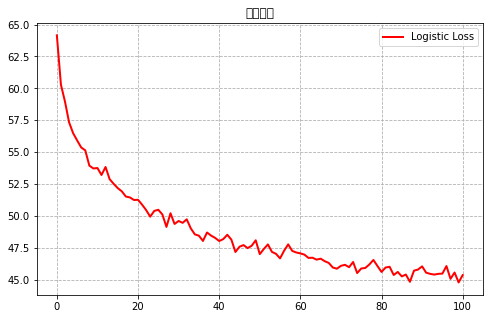

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:629: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 0, total loss: 45.456258
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 1, total loss: 45.790630
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 45.634640
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 3, total loss: 46.210351
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 4, total loss: 45.186603
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 5, total loss: 45.721744
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 6, total loss: 45.003087
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 7, total loss: 45.346865
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 8, total loss: 45.713711
total_train_

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 43.903942
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 44.262077
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.558816
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.965021
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 43.820938
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 43.761297
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 43.371342
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.546823
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 43.791700
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 43.432244
total_train_accuracy: tensor(0.9667, dev

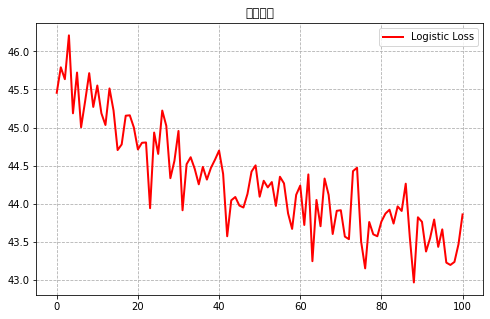

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.776200
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 1, total loss: 43.937970
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.344041
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.475901
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.477645
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 43.629815
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 43.376446
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.730090
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.776074
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 43.011333
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 43.103041
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.710835
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.101129
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.024656
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 43.315254
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.502798
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.782304
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 43.022836
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.896679
total_train_accuracy: tensor(0.9583, dev

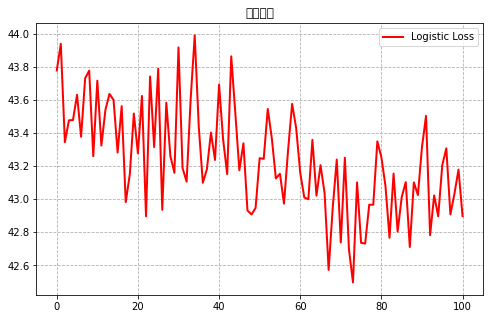

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.219872
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 1, total loss: 43.860826
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.053998
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.524603
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.924472
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 43.169148
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.940744
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.960642
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.884892
total_train_accuracy

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.708683
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.645702
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.629303
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.580167
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.603273
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.773307
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.879533
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.505219
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.818576
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.699504
total_train_accuracy: tensor(0.9750, dev

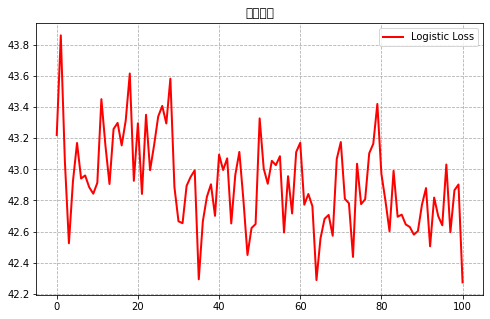

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.424961
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.914025
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 43.018037
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.997401
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.441937
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.845827
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.676616
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.697369
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.972855
total_train_

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.344744
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.451791
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.544961
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.867628
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.378284
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.609074
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.582994
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.530648
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.587095
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.776883
total_train_accuracy: tensor(0.9750, dev

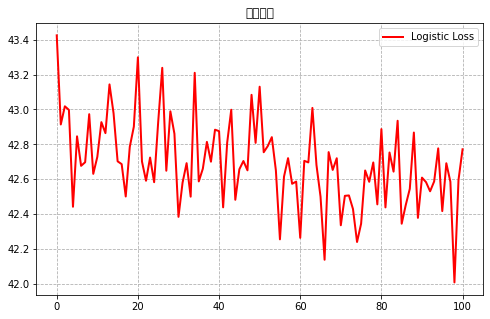

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.792327
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.360867
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.898113
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.241367
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.435943
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 43.066002
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.066668
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.879475
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.595507
total_train_

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.359658
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.546633
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.778410
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 42.756765
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.716613
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.970052
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.414387
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.458945
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.753368
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.148225
total_train_accuracy: tensor(0.9750, dev

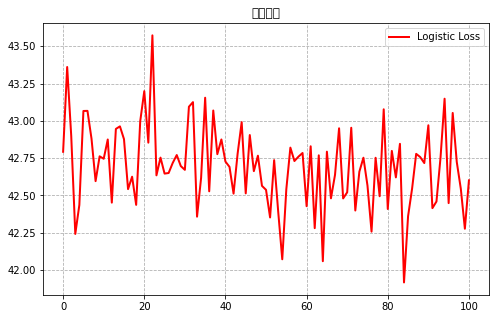

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.282769
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.790466
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.593157
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.458014
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.128921
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.558850
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 42.948102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 43.081473
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.564632
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.490133
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.513670
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.331277
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.437014
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.546704
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.313117
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.183241
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 92, total loss: 42.103209
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.115204
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.759440
total_train_accuracy: tensor(0.9792, dev

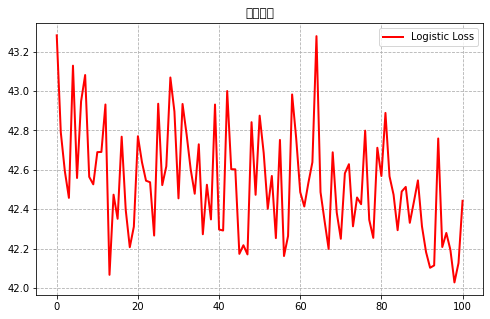

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.627030
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.315359
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 2, total loss: 42.217394
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 3, total loss: 42.166893
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.598480
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.652388
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.728541
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.694014
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.697457
total_train_accuracy

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.501343
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.297969
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.500499
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.509818
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.425720
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.314817
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.291030
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.597512
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.218129
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.612591
total_train_accuracy: tensor(0.9771, dev

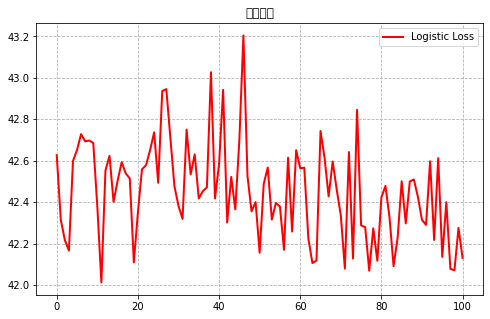

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.664733
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.461060
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.136699
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 42.881193
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 43.056682
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.728508
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.007112
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.535318
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.418752
total_train_accuracy

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.509405
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.724206
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.333409
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.260800
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.432600
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.385609
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.280260
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 92, total loss: 42.779177
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.677932
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.492341
total_train_accuracy: tensor(0.9771, dev

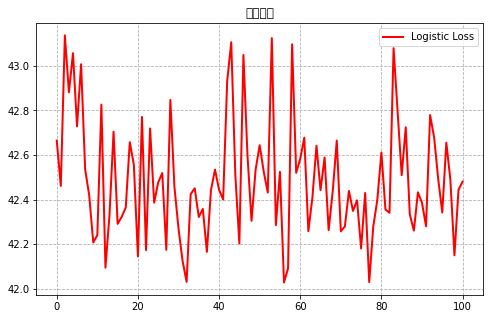

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.747653
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 1, total loss: 41.940882
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.301839
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.556629
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.338685
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.132757
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.327455
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.449182
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.312117
total_train_accuracy

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.236257
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 86, total loss: 42.071434
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.256283
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 41.978655
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.300911
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 90, total loss: 42.792441
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.141313
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.315670
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 93, total loss: 41.861435
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.547526
total_train_accuracy: tensor(0.9708, dev

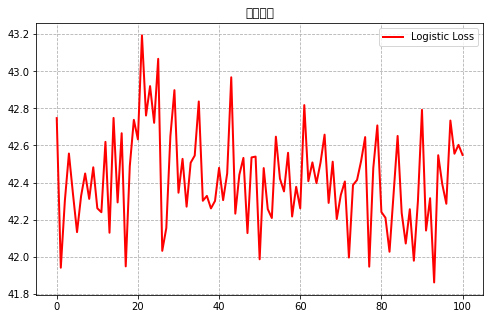

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8958, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8958334, dtype=float32), array(0.9166667, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9708334


In [2]:
#train model with new features of 94
model=model9
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP2_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [6]:
#for 20_genes
#MLP_top 20 and NFM_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CYP39A1', 'GPX3', 'EEF1AKMT3', 'GDF15', 'IFI6', 'KLF6', 'PTP4A1', 'RHOB', 'LYPLA1', 'NUDT4', 'ABCB7', 'IFI44L', 'ALB', 'PCK1']
intersecion_list: ['LGMN', 'RGS5', 'ZNHIT1', 'TESC', 'CHODL', 'AGL', 'CTSG', 'LHPP', 'CHP1', 'RPS27L', 'CYP2J2']
intersecion_list: ['GPX3', 'ACTA2', 'ACP6', 'CAMLG', 'NEAT1', 'TRA2A', 'NDUFA13', 'MEST', 'METTL9', 'FOS', 'CFLAR', 'VTCN1', 'VDR', 'TUBA4B', 'COX15']
intersecion_list: ['SLC3A2', 'TESC', 'VAMP8', 'FST', 'KLF6', 'IFI6', 'UQCR10', 'TYMP', 'TTC1', 'ATP6V1F', 'CYP21A2']
intersecion_list: ['LARP1', 'NONO', 'WDR12', 'EMX1', 'WASHC3', 'RPL38', 'TMEM100', 'CPVL', 'LYPLA1', 'ECH1', 'FCGBP', 'ITGB3BP']
intersecion_list: ['MRPS16', 'RHBDL1', 'LGMN', 'DEPTOR', 'CHCHD3', 'ATP5IF1', 'OLFML3', 'IFI6', 'IFIT1', 'RRM2', 'LIPC', 'ITGB3BP']
intersecion_list: ['ABHD2', 'UCHL1', 'WARS2', 'NDUFB1', 'ACAD10', 'CAMLG', 'SPI1', 'ABLIM1', 'WASHC4', 'NUDT4', 'SERPINF1', 'ADI1', 'PLIN3']
intersecion_list: ['MT2A', 'GPX3', 'UGDH', 'IGLV2-14', 'KLF9', 'IFI6',

In [7]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/test_info.csv')



90
columns: ['CYP39A1', 'KLF9', 'EMX1', 'CAMLG', 'KLF6', 'FST', 'RPS27L', 'ABCB7', 'VDR', 'ECH1', 'TUBA4B', 'ABHD2', 'GPX3', 'TESC', 'CHCHD3', 'WDR12', 'VAMP8', 'TRA2A', 'WASHC3', 'LYPLA1', 'RRM2', 'NUDT4', 'ITGB3BP', 'COX15', 'PCK1', 'MT2A', 'LARP1', 'ZNHIT1', 'SLC3A2', 'NDUFB1', 'ACAD10', 'RPL38', 'PTP4A1', 'SERPINF1', 'MS4A4A', 'TYMP', 'LGMN', 'ADI1', 'MEST', 'CHP1', 'UQCR10', 'BCCIP', 'VTCN1', 'FCGBP', 'ALB', 'DEPTOR', 'IGLV2-14', 'ATP5IF1', 'SPI1', 'OLFML3', 'METTL9', 'FOS', 'LIPC', 'CYP21A2', 'CFB', 'RGS5', 'ACP6', 'TRIM14', 'EEF1AKMT3', 'WARS2', 'LHPP', 'NEAT1', 'ABLIM1', 'CPVL', 'RHOB', 'WASHC4', 'MAP3K1', 'GPX2', 'PLIN3', 'UGDH', 'NONO', 'AGL', 'CTSG', 'GDF15', 'NDUFA13', 'IFI6', 'IFIT1', 'TMEM100', 'ATP6V1F', 'ABCC3', 'CYP2J2', 'TFAM', 'MRPS16', 'RHBDL1', 'ACTA2', 'UCHL1', 'CHODL', 'CFLAR', 'TTC1', 'IFI44L', 'label']
(549, 91)
(138, 91)


549 91
549 91


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2792, device='cuda:0')
Training Epoch: 0, total loss: 63.957297
total_train_accuracy: tensor(0.4729, device='cuda:0')
Training Epoch: 1, total loss: 61.032840
total_train_accuracy: tensor(0.5750, device='cuda:0')
Training Epoch: 2, total loss: 59.057480
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 3, total loss: 58.046483
total_train_accuracy: tensor(0.6854, device='cuda:0')
Training Epoch: 4, total loss: 57.006543
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 5, total loss: 56.686778
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 6, total loss: 55.708101
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 7, total loss: 55.349774
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 8, total loss: 54.375835
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 9, total loss: 54.868220
total_train_accuracy: tensor(0.7521, device='cuda:

total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 87, total loss: 45.507736
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 45.340736
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 89, total loss: 45.876947
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 90, total loss: 45.877605
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 91, total loss: 45.729488
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 92, total loss: 45.439887
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.609368
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 45.116361
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 95, total loss: 44.696681
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 96, total loss: 45.842204
total_train_accuracy: tensor(0.9396, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

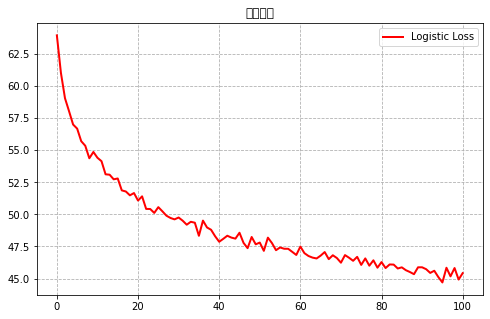

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 91


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 91
total_train_accuracy: tensor(0.8833, device='cuda:0')
Training Epoch: 0, total loss: 46.400553
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 1, total loss: 46.172726
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 2, total loss: 45.856374
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 3, total loss: 45.511001
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 45.394246
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 45.138744
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 45.947655
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 7, total loss: 45.942431
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 8, total loss: 45.184061
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 9, total loss: 45.076967
total_train_accuracy: tensor(0.9313, device

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 43.556002
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.431630
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 89, total loss: 44.010070
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 43.909255
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.387505
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.378664
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.644652
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.845263
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 95, total loss: 43.305211
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 96, total loss: 43.459345
total_train_accuracy: tensor(0.9563, dev

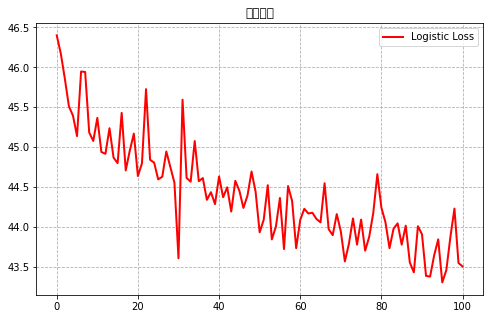

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.778424
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 44.111460
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.920132
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.803864
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.399432
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.975739
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.535563
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 43.341310
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 43.440777
total_train_ac

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.830665
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.357813
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 43.139515
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.972798
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.191023
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 43.121346
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.642131
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.841633
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 43.033296
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.389593
total_train_accuracy: tensor(0.9729, dev

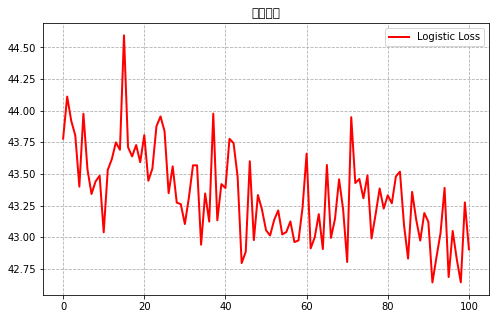

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.298910
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 43.291070
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.001014
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.352421
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.432238
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.396622
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 43.469409
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.693439
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.724202
total_train_ac

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.728597
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.445622
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.848918
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.588189
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.143115
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.747994
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.469017
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.082096
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.084238
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.143555
total_train_accuracy: tensor(0.9646, dev

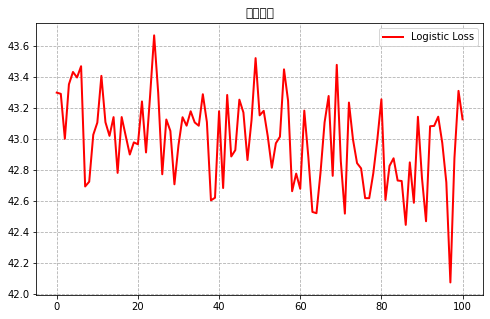

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.507744
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.155999
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.246942
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.754101
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.877213
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.959384
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.751360
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.596224
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.841339
total_train_ac

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.440084
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.855989
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.146880
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.620223
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.288738
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.954612
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 43.199567
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.943130
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.794576
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 95, total loss: 42.535567
total_train_accuracy: tensor(0.9750, dev

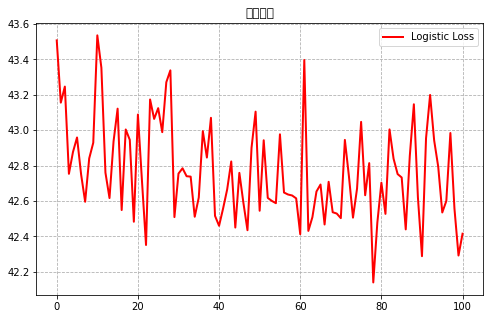

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.196859
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.410898
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 2, total loss: 43.740481
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 3, total loss: 43.209471
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.090875
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.969463
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.050460
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.937055
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.908238
total_train_ac

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.486301
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.289608
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.424846
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.815059
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.517727
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.550073
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.834710
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.922583
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.807518
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 42.459881
total_train_accuracy: tensor(0.9729, dev

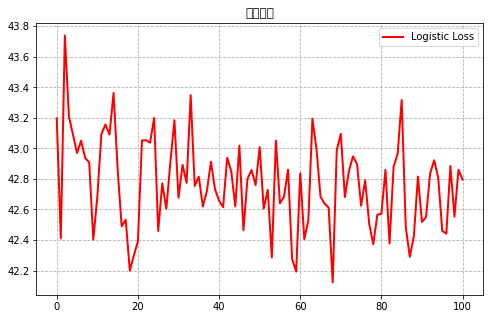

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.813773
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.891788
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.520784
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.547786
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.541240
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.754524
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 42.853023
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.671716
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.637660
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.724212
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.323238
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 43.001606
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 42.918383
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.436758
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.289083
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.599141
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.643353
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.890766
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.578844
total_train_accuracy: tensor(0.9875, dev

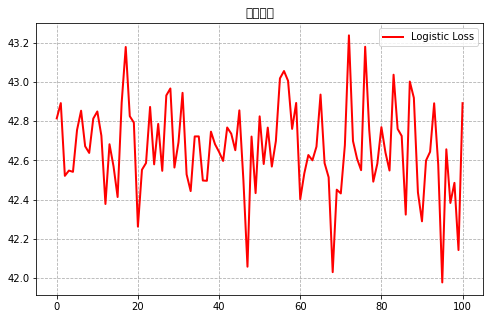

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.767312
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.538562
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.102861
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.632738
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.659730
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.492477
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.775537
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.668476
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.412264
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.426674
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.869740
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.332510
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.370390
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.387918
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.399189
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.437538
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.310043
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.601699
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 95, total loss: 42.015238
total_train_accuracy: tensor(0.9688, dev

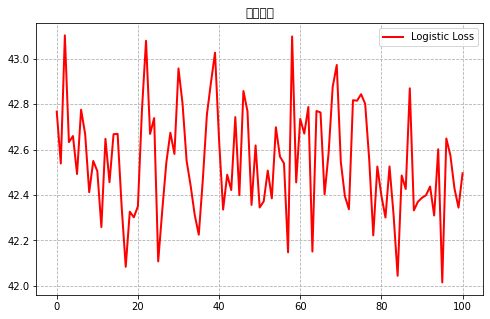

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.828166
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.526219
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.737257
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.126001
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.713581
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.727293
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.269447
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.494812
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.553571
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.660264
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.303733
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.259809
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.383034
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.476114
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.307360
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.563098
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 93, total loss: 42.116894
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.510093
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 42.154906
total_train_accuracy: tensor(0.9833, dev

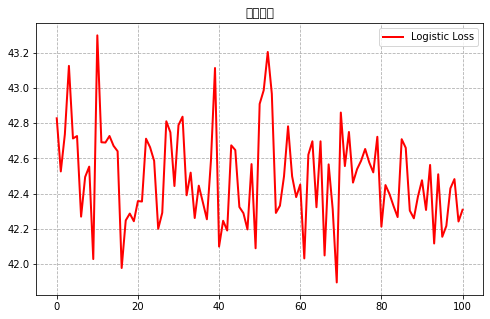

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.681093
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.436069
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 2, total loss: 42.135357
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.497822
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.461327
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.380665
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.534994
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.561729
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.244483
total_train_accuracy: 

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.495974
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.336463
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 87, total loss: 41.714500
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.607329
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 89, total loss: 41.744547
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.293028
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.738567
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.177314
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.645854
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.294778
total_train_accuracy: tensor(0.9667, dev

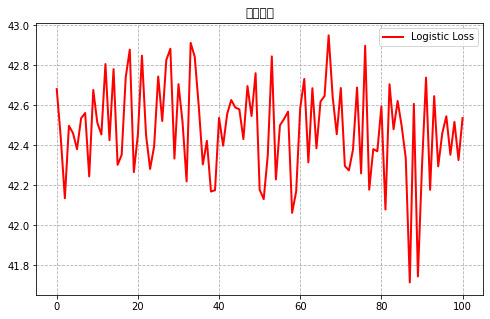

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8125, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8125, dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.96875


In [9]:
#train model with new features of 94
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=90, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 91
f1_score:  %.4f 0.8998572860277692
accuracy_score: 0.9057971014492754
recall_score: 0.8970863559098853
pre_recall: 0.9176696196820036
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

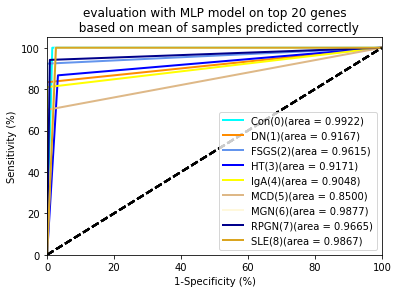

In [24]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [16]:
#NFM and ConvMLP1 interaction top 20
#ConvMLP2_top 20 and NFM_top 20
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['LYPLA1', 'DUSP6', 'EEF1AKMT3', 'PTP4A1', 'GPX3', 'KLF6', 'NUDT4', 'CYP39A1', 'GDF15', 'IFI6', 'RHOB', 'ABCB7', 'PCK1']
intersecion_list: ['AGL', 'CTSG', 'LGMN', 'SLC3A2', 'RPS27L', 'CHP1', 'CYP2J2', 'CHODL', 'ZNHIT1', 'NDUFA13', 'LHPP', 'IFI6', 'RGS5']
intersecion_list: ['CAMLG', 'ACTA2', 'NEAT1', 'NR1D2', 'TFAP2A', 'METTL9', 'ISCU', 'VTCN1', 'COX15', 'ACP6', 'NDUFA13', 'CFLAR', 'VDR', 'EPM2AIP1', 'TRA2A', 'TUBA4B', 'MEST']
intersecion_list: ['VAMP8', 'FST', 'TYMP', 'ATP6V1F', 'SLC3A2', 'TESC', 'KLF6', 'BHLHE40', 'UQCR10', 'IFI6', 'PCK1']
intersecion_list: ['LYPLA1', 'ACE', 'EMX1', 'NONO', 'ECH1', 'PEG10', 'FKBP4', 'WASHC3', 'ITGB3BP', 'TMEM100', 'WDR12', 'RPL38', 'CPVL', 'AFP']
intersecion_list: ['IFIT1', 'DEPTOR', 'OLFML3', 'LGMN', 'RRM2', 'ATP5IF1', 'COL4A3BP', 'MRPS16', 'EPM2AIP1', 'IFI6', 'LIPC', 'CHCHD3', 'ITGB3BP', 'PTMS']
intersecion_list: ['NPIPB15', 'NDUFB1', 'WARS2', 'ADI1', 'UCHL1', 'NUDT4', 'ABHD2', 'ACAD10', 'ABLIM1', 'RGN', 'WASHC4', 'OXCT1', 'BDKRB2'

In [8]:
#NFM and ConvMLP1 interaction top 20
#
#for 20_genes
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'CYP39A1', 'EEF1AKMT3', 'GPX3', 'KLF6', 'ADPRM', 'RHOB', 'LYPLA1', 'GDF15', 'NUDT4', 'IFI6', 'ALB', 'PCK1', 'IFI44L']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'MS4A4A', 'NDUFA13', 'RGS5', 'AGL', 'LGMN', 'CYP2J2', 'IFI6', 'RPS27L', 'CHODL']
intersecion_list: ['NEAT1', 'COX15', 'FOS', 'ACP6', 'VTCN1', 'TFAP2A', 'MEST', 'ISCU', 'METTL9', 'VDR', 'TUBA4B', 'CFLAR', 'EPM2AIP1', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'UQCR10', 'CYP21A2', 'ELF3', 'BHLHE40', 'KLF6', 'SLC3A2', 'TESC', 'FST', 'IFI6', 'ATP6V1F', 'PCK1']
intersecion_list: ['BTG1', 'EMX1', 'CPVL', 'TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'FCGBP', 'LYPLA1', 'WDR12', 'NUDT4', 'FKBP4']
intersecion_list: ['CHCHD3', 'LIPC', 'OLFML3', 'IFI6', 'DEPTOR', 'ATP5IF1', 'IFIT1', 'MRPS16', 'LGMN', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['ABLIM1', 'UCHL1', 'BDKRB2', 'NDUFB1', 'PLIN3', 'ADI1', 'OXCT1', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN', 'WASHC4', 'CAMLG', '

In [17]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLP2_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')



101
columns: ['EEF1AKMT3', 'GPX3', 'MS4A4A', 'SLC3A2', 'METTL9', 'NONO', 'SH3BP2', 'TRIM14', 'ACAD10', 'NDUFA13', 'HERC5', 'OXCT1', 'EMX1', 'FST', 'ACTA2', 'ATP6V1F', 'DEPTOR', 'OLFML3', 'CGREF1', 'TESC', 'WARS2', 'ADI1', 'PPP6R1', 'NUDT4', 'ANKRD2', 'CYP39A1', 'WASHC4', 'CHCHD3', 'PCK1', 'LYPLA1', 'CAMLG', 'NDUFB1', 'LGMN', 'TFAP2A', 'ACP6', 'UCHL1', 'COX15', 'IFI44L', 'CFLAR', 'EPM2AIP1', 'TMEM100', 'ATP5IF1', 'RRM2', 'BHLHE40', 'ISCU', 'RGS5', 'BDKRB2', 'WDR12', 'TUBA4B', 'CPVL', 'AFP', 'MEST', 'SPI1', 'CTSG', 'DUSP6', 'NEAT1', 'KLF9', 'CHP1', 'RGN', 'VDR', 'TRA2A', 'ABCB7', 'GPX2', 'MAP3K1', 'IFIT1', 'NPIPB15', 'PTP4A1', 'KLF6', 'RPS27L', 'CYP2J2', 'ZNHIT1', 'GDF15', 'ALB', 'ABCC3', 'BCCIP', 'ITGB3BP', 'AGL', 'TYMP', 'NR1D2', 'RHOB', 'VTCN1', 'ABHD2', 'UQCR10', 'UGDH', 'IFI6', 'LIPC', 'PTMS', 'RHOBTB1', 'ACE', 'ECH1', 'PEG10', 'CHODL', 'FKBP4', 'COL4A3BP', 'MRPS16', 'ABLIM1', 'CFB', 'LHPP', 'RPL38', 'WASHC3', 'VAMP8', 'label']
(549, 102)
(138, 102)


549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:590: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:591: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2479, device='cuda:0')
Training Epoch: 0, total loss: 64.237063
total_train_accuracy: tensor(0.4917, device='cuda:0')
Training Epoch: 1, total loss: 60.755794
total_train_accuracy: tensor(0.6146, device='cuda:0')
Training Epoch: 2, total loss: 58.790426
total_train_accuracy: tensor(0.6646, device='cuda:0')
Training Epoch: 3, total loss: 57.953270
total_train_accuracy: tensor(0.6646, device='cuda:0')
Training Epoch: 4, total loss: 57.509859
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 5, total loss: 56.272771
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 6, total loss: 55.886846
total_train_accuracy: tensor(0.7313, device='cuda:0')
Training Epoch: 7, total loss: 55.246234
total_train_accuracy: tensor(0.7396, device='cuda:0')
Training Epoch: 8, total loss: 54.906894
total_train_accuracy: tensor(0.8000, device='cuda:0')
Training Epoch: 9, total loss: 54.192002
total_train_accuracy: tensor(0.7875, device='cuda:

total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 87, total loss: 45.662088
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 88, total loss: 45.987131
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 89, total loss: 45.458483
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 90, total loss: 45.566337
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 91, total loss: 45.746057
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 45.523147
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.572511
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 94, total loss: 45.726110
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 95, total loss: 45.336046
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 96, total loss: 45.114248
total_train_accuracy: tensor(0.9292, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 100, total loss: 45.067388
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


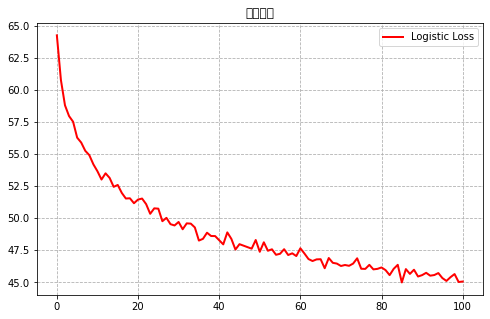

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:629: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 0, total loss: 45.501528
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 45.251237
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 2, total loss: 46.420239
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 3, total loss: 46.218353
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 4, total loss: 45.005593
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 45.234741
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 6, total loss: 45.380917
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 45.461859
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 45.252991
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 43.426409
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 43.543440
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.644504
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.501661
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.920412
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 43.471824
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.510735
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 43.306453
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 43.328660
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 43.346292
total_train_accuracy: tensor(0.9625, dev

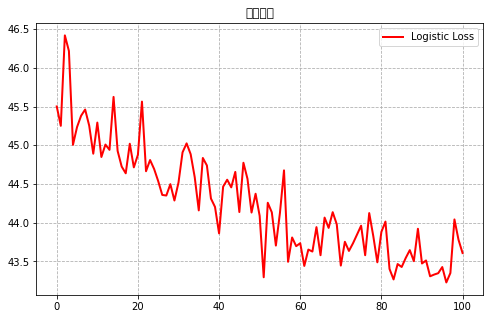

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.913598
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.792278
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 2, total loss: 43.912408
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 43.647300
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 43.228091
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 44.097355
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.283434
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 7, total loss: 43.976566
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 43.310431
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.228643
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.988756
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.797814
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.562497
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.792715
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.761620
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 43.111734
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.160641
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.998274
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 95, total loss: 43.237925
total_train_accuracy: tensor(0.9604, dev

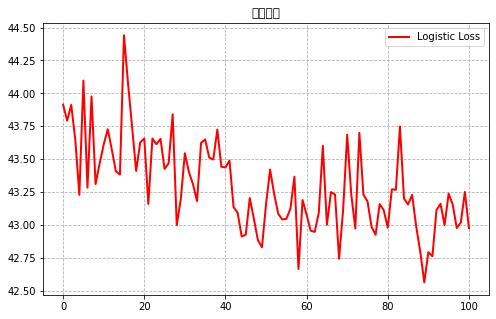

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.296586
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.848651
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.046767
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.596881
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.128716
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.913579
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.640327
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.258889
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.915094
total_train_

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.258090
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.935732
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.826719
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.910849
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.452788
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.866684
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.883356
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.156147
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.869177
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.663970
total_train_accuracy: tensor(0.9792, dev

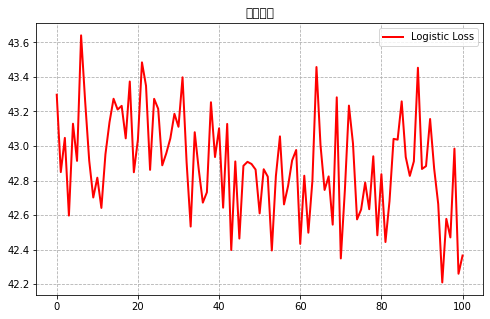

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.032678
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.656827
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.660925
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.723228
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.780615
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.574606
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.805338
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.138380
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 8, total loss: 42.419771
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.416865
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.433261
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.561085
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.481264
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.509755
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.377148
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.509656
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.671232
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.532088
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 95, total loss: 42.850370
total_train_accuracy: tensor(0.9729, dev

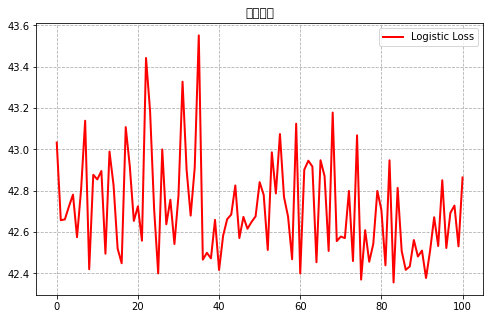

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.222174
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.488145
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.363067
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.323056
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.075768
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.732128
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.935254
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 7, total loss: 42.275115
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.418975
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.680076
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.316035
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.545806
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.722990
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.821173
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.471262
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.359275
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.619052
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.795176
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.529160


In [ ]:
#train model with new features of 94
model=model9
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLP4_NFM_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


In [ ]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/ConvMLP2_NFM_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP9()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/ConvMLP2_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [9]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvMLPy_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/ConvMLPy_NFM_test_info.csv')



99
columns: ['VAMP8', 'LIPC', 'ELF3', 'MS4A4A', 'SH3BP2', 'TFAP2A', 'ATP5IF1', 'TESC', 'LYPLA1', 'GDF15', 'ABCC3', 'CHODL', 'EMX1', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'EEF1AKMT3', 'AGL', 'SLC3A2', 'WARS2', 'FCGBP', 'LGMN', 'WASHC4', 'TFAM', 'GPX2', 'FOS', 'BHLHE40', 'ADPRM', 'MRPS16', 'TRIM14', 'TUBA4B', 'UGDH', 'ABHD2', 'TRA2A', 'PCK1', 'FKBP4', 'MAP3K1', 'CGREF1', 'CYP21A2', 'CPVL', 'CHCHD3', 'RGS5', 'ITGB3BP', 'OXCT1', 'MEST', 'ISCU', 'WDR12', 'FST', 'EPM2AIP1', 'DEPTOR', 'ATP6V1F', 'RGN', 'SERPINF1', 'ABLIM1', 'BTG1', 'BCCIP', 'COX15', 'OLFML3', 'NDUFB1', 'PLIN3', 'KLF6', 'GPX3', 'ADI1', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'NEAT1', 'CHP1', 'CYP39A1', 'HERC5', 'ACAD10', 'VDR', 'IGLV2-14', 'IFI44L', 'UQCR10', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'KLF9', 'SPI1', 'NUDT4', 'ALB', 'ACTA2', 'CTSG', 'UCHL1', 'PTP4A1', 'NDUFA13', 'ACP6', 'WASHC3', 'METTL9', 'COL4A3BP', 'IFI6', 'RRM2', 'CAMLG', 'label']
(549, 100)
(138, 100)


549 100
549 100


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2792, device='cuda:0')
Training Epoch: 0, total loss: 63.966433
total_train_accuracy: tensor(0.5063, device='cuda:0')
Training Epoch: 1, total loss: 60.475518
total_train_accuracy: tensor(0.6229, device='cuda:0')
Training Epoch: 2, total loss: 59.064471
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 58.159012
total_train_accuracy: tensor(0.6938, device='cuda:0')
Training Epoch: 4, total loss: 57.114104
total_train_accuracy: tensor(0.7104, device='cuda:0')
Training Epoch: 5, total loss: 56.510277
total_train_accuracy: tensor(0.7083, device='cuda:0')
Training Epoch: 6, total loss: 55.833070
total_train_accuracy: tensor(0.7479, device='cuda:0')
Training Epoch: 7, total loss: 55.190577
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 8, total loss: 54.331060
total_train_accuracy: tensor(0.7875, device='cuda:0')
Training Epoch: 9, total loss: 53.875301
total_train_accuracy: tensor(0.7688, device='cuda:

total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 86, total loss: 45.526049
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 87, total loss: 45.405157
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 88, total loss: 45.607566
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 45.314965
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 46.113646
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 45.316554
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 92, total loss: 45.751922
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 93, total loss: 45.409855
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 94, total loss: 45.945494
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 95, total loss: 45.754086
total_train_accuracy: tensor(0.9417, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 100, total loss: 44.828892
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


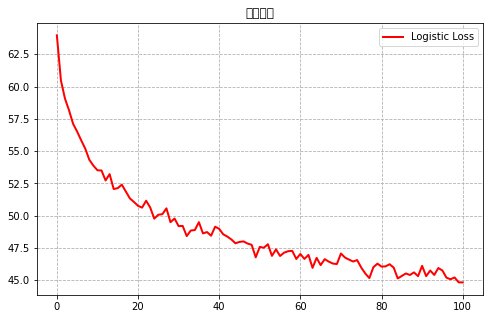

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 0, total loss: 45.748580
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 1, total loss: 45.665790
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 2, total loss: 45.425866
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 3, total loss: 45.764501
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 4, total loss: 45.055650
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 45.031072
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 6, total loss: 45.581346
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 7, total loss: 45.561311
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 8, total loss: 45.027908
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 43.617738
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 43.304115
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 87, total loss: 43.807547
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.963494
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.524831
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.604668
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 43.481673
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 43.109786
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.547869
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.967091
total_train_accuracy: tensor(0.9646, dev

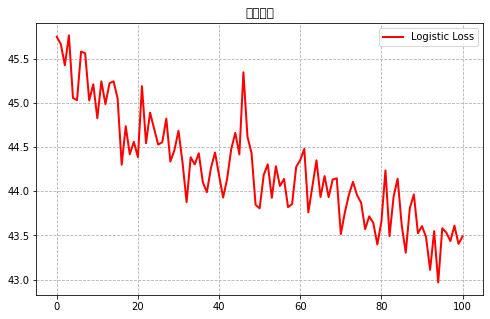

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.915245
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.970001
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 43.638150
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 3, total loss: 43.704514
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 43.484267
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 5, total loss: 43.771277
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 43.504962
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.579084
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 43.240274
total_train_

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 43.016186
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 43.848481
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 43.135556
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.133083
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.360039
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 90, total loss: 43.605207
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 43.032098
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.842437
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.086515
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.176183
total_train_accuracy: tensor(0.9667, dev

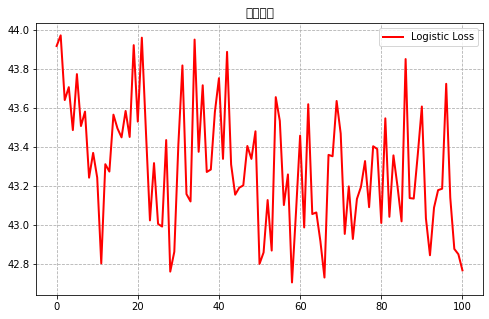

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.281070
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 43.563764
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.773771
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.073687
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.173173
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 43.166651
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.351875
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.321581
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.964371
total_train_

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.517506
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.873688
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.910654
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.980433
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 43.366295
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.825181
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.473887
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.689334
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.160116
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 43.088834
total_train_accuracy: tensor(0.9646, dev

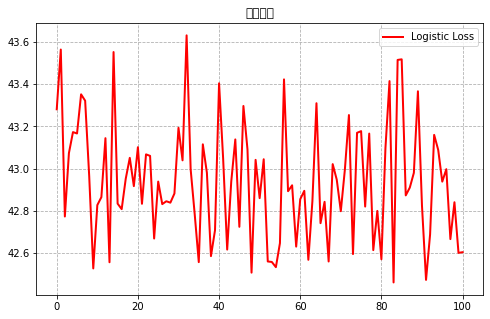

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.072159
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 43.011904
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.434377
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.012791
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.848908
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.161110
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.988580
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.828969
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.844522
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.801187
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.931672
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.205135
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.351233
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.569383
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.782593
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.453882
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.893843
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.666902
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 95, total loss: 42.372645
total_train_accuracy: tensor(0.9729, dev

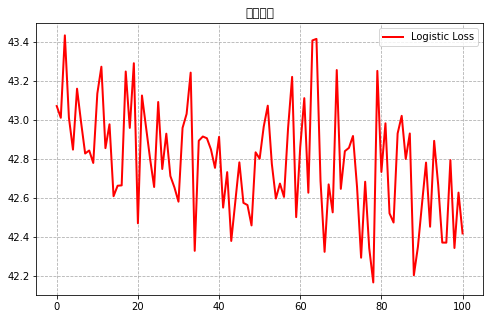

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.152677
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.676204
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.837646
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.705228
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.035423
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.832904
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.711330
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.531615
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.630162
total_train_

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.759016
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.848172
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 87, total loss: 42.117484
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.754381
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.504637
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.331855
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.507735
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.359788
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.801942
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.391003
total_train_accuracy: tensor(0.9646, dev

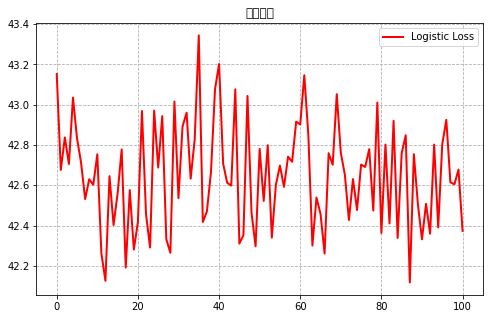

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 42.916513
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.654593
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.511243
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 42.881465
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.633654
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.541766
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.421531
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.596900
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.734038
total_train_accuracy

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.450629
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.500807
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.727743
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.393818
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 89, total loss: 42.057644
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.973064
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.613589
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.335537
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.580811
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.208265
total_train_accuracy: tensor(0.9667, dev

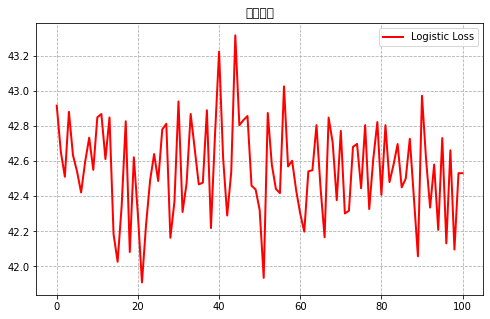

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.813056
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.422077
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.390916
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.005792
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.559321
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.628793
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.704182
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.556352
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.677683
total_train_accuracy

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.185710
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.577278
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 87, total loss: 42.111081
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.015253
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.144813
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.860063
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.668532
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.387181
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.680271
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.417413
total_train_accuracy: tensor(0.9583, dev

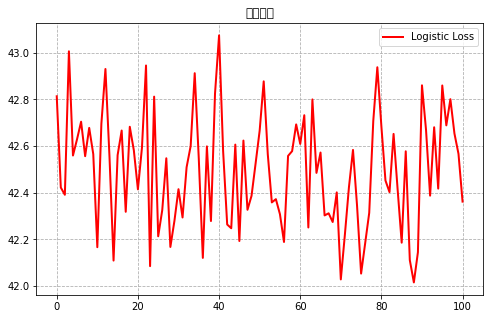

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 42.942029
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.720057
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.638238
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 3, total loss: 42.158927
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.383425
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.500681
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.408076
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.659038
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.529822
total_train_accuracy

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.574101
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.338593
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.678333
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.469780
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.547004
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.890023
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.537330
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.439758
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.843553
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 43.007924
total_train_accuracy: tensor(0.9500, dev

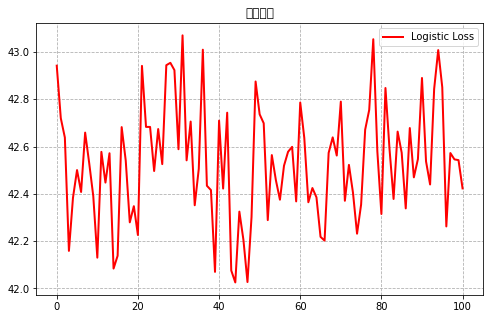

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 100
549 100
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.907257
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.638308
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.520628
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.467412
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.324540
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.387279
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.194874
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 41.963279
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.674268
total_train_accuracy

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.233156
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.597095
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.587435
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.521193
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 42.762012
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 41.965071
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.098208
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.507491
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.511679
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.031087
total_train_accuracy: tensor(0.9813, dev

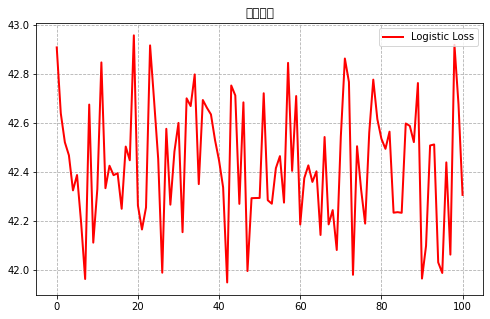

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8958, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8958334, dtype=float32), array(0.9375, dtype=float32), array(0.9375, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9729167


In [7]:
#train model with new features of 94
model=model3
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/ConvMLPy_NFM_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP3(
  (bn0): BatchNorm1d(99, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=99, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 100
f1_score:  %.4f 0.875647692445253
accuracy_score: 0.8768115942028986
recall_score: 0.8730936819172113
pre_recall: 0.8948454595513419
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

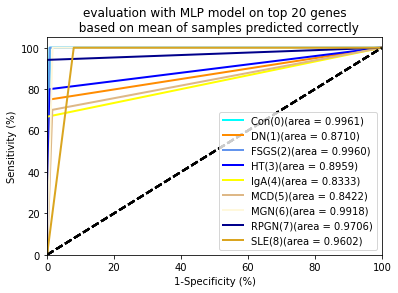

In [11]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/ConvMLPy_NFM_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP3()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [13]:
#for 20_genes
#MLP and ConvMLPy interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'EEF1AKMT3', 'KLF6', 'NR0B2', 'ADPRM', 'RHOB', 'GDF15', 'PCK1']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'RGS5', 'AGL', 'MEST', 'CYP2J2', 'RPS27L']
intersecion_list: ['TTC3', 'ACVR1B', 'COX15', 'CTTN', 'ACP6', 'VTCN1', 'MEST', 'METTL9', 'VDR', 'MRPS15', 'ISCU', 'CFLAR', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'KLF6', 'SLC3A2', 'ATP5IF1', 'ENPP2', 'TESC', 'FST', 'ATP6V1F', 'PCK1', 'GEMIN6']
intersecion_list: ['TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'LYPLA1', 'GLB1L']
intersecion_list: ['ADM2', 'OVOL2', 'LIPC', 'ATP5IF1', 'UBXN8', 'MRPS16', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['ATP6V0E2', 'UCHL1', 'BDKRB2', 'NDUFB1', 'ADI1', 'PLIN3', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN']
intersecion_list: ['GPX2', 'CGREF1', 'CFB', 'ANKRD2', 'SH3BP2', 'UGDH', 'ATP6V1F', 'ABCC3', 'BCCIP']
intersecion_list: ['NDUFA13', 'HERC5', 'GPX3', 'IFIT1', 'TRIM14', 'IFI6', 'DEPTOR', 'IFI44L']


In [14]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_test_info.csv')



81
columns: ['VAMP8', 'ATP6V0E2', 'LIPC', 'SH3BP2', 'ATP5IF1', 'UBXN8', 'TESC', 'GDF15', 'LYPLA1', 'ABCC3', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'EEF1AKMT3', 'NR0B2', 'AGL', 'SLC3A2', 'WARS2', 'GPX2', 'ADPRM', 'MRPS16', 'TRIM14', 'UGDH', 'ABHD2', 'GLB1L', 'TRA2A', 'PCK1', 'ADM2', 'CGREF1', 'OVOL2', 'ACVR1B', 'RGS5', 'ITGB3BP', 'MEST', 'ISCU', 'FST', 'EPM2AIP1', 'ATP6V1F', 'RGN', 'DEPTOR', 'COX15', 'NDUFB1', 'ADI1', 'KLF6', 'PLIN3', 'GPX3', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'TTC3', 'CHP1', 'HERC5', 'ACAD10', 'VDR', 'MRPS15', 'GEMIN6', 'IFI44L', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'ENPP2', 'SPI1', 'NUDT4', 'ACTA2', 'CTSG', 'UCHL1', 'PTP4A1', 'ACP6', 'WASHC3', 'NDUFA13', 'METTL9', 'COL4A3BP', 'IFI6', 'RRM2', 'BCCIP', 'label']
(549, 82)
(138, 82)


549 82
549 82


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2583, device='cuda:0')
Training Epoch: 0, total loss: 64.139934
total_train_accuracy: tensor(0.4750, device='cuda:0')
Training Epoch: 1, total loss: 60.931369
total_train_accuracy: tensor(0.5833, device='cuda:0')
Training Epoch: 2, total loss: 59.291390
total_train_accuracy: tensor(0.6333, device='cuda:0')
Training Epoch: 3, total loss: 58.422979
total_train_accuracy: tensor(0.6729, device='cuda:0')
Training Epoch: 4, total loss: 57.412169
total_train_accuracy: tensor(0.6833, device='cuda:0')
Training Epoch: 5, total loss: 57.032259
total_train_accuracy: tensor(0.6729, device='cuda:0')
Training Epoch: 6, total loss: 56.672134
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 7, total loss: 54.733006
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 8, total loss: 54.708371
total_train_accuracy: tensor(0.7521, device='cuda:0')
Training Epoch: 9, total loss: 54.476763
total_train_accuracy: tensor(0.8083, device='cuda:

total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 86, total loss: 45.992920
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 87, total loss: 46.006451
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 88, total loss: 46.495011
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 89, total loss: 46.070149
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 46.163087
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 45.572697
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 92, total loss: 45.774371
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.498306
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 45.419648
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 95, total loss: 45.337660
total_train_accuracy: tensor(0.9333, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

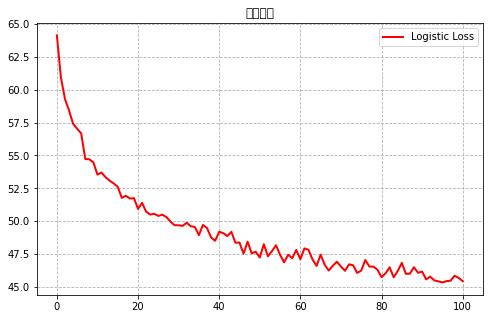

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 82


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 82
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 0, total loss: 46.721274
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 1, total loss: 45.726631
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 45.685686
total_train_accuracy: tensor(0.8875, device='cuda:0')
Training Epoch: 3, total loss: 46.361297
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 4, total loss: 45.893245
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 5, total loss: 45.766732
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 6, total loss: 45.268597
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 7, total loss: 45.418885
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 8, total loss: 45.504490
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 9, total loss: 45.466181
total_train_accuracy: tensor(0.9250, device

total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 86, total loss: 44.077285
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 44.329723
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 43.777824
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 43.768081
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 90, total loss: 44.214603
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 44.132532
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.924119
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 44.360114
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.512486
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 44.179046
total_train_accuracy: tensor(0.9438, dev

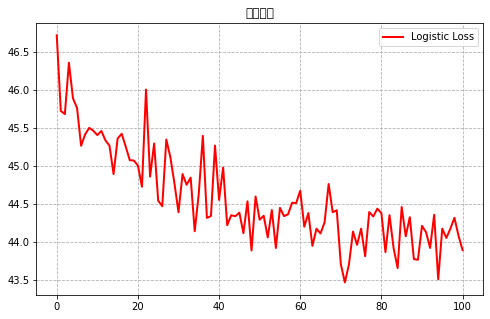

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 0, total loss: 44.341505
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 1, total loss: 44.651531
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 2, total loss: 44.516505
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 43.996087
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.859993
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.786852
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 43.257506
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 43.890267
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 8, total loss: 44.150601
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.239584
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.486493
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.084279
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.505576
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.915091
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.350515
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.885911
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 43.456867
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 43.293597
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 43.090431
total_train_accuracy: tensor(0.9708, dev

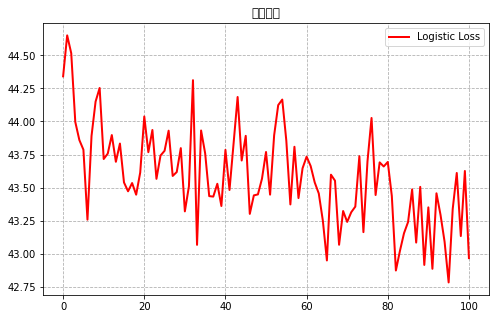

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.713406
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 43.106109
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.198839
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.561936
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.299596
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.894256
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.127826
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.278764
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.436782
total_train_ac

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.638211
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.583059
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 43.226558
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.867871
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.813304
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 43.111278
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 91, total loss: 43.308006
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.941578
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.969407
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 42.965096
total_train_accuracy: tensor(0.9688, dev

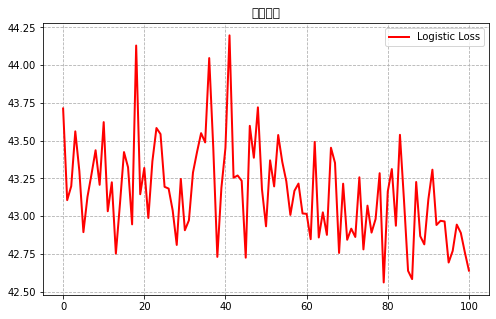

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.379320
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.293115
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 2, total loss: 43.541978
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.987007
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.959196
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.858608
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.770566
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 7, total loss: 43.880415
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.759924
total_train_accuracy: 

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.649082
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.939398
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.562243
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.614411
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.912933
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.684309
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 42.782760
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.850123
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.515212
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.241655
total_train_accuracy: tensor(0.9667, dev

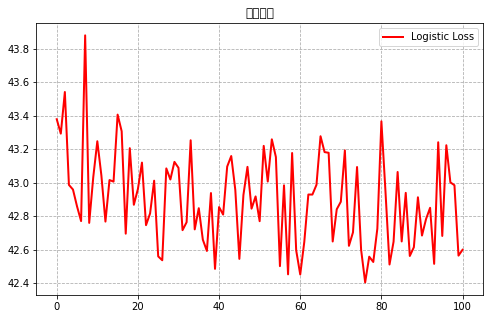

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.192525
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.928235
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.145074
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 43.261041
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.264518
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 43.047382
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 43.248618
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 7, total loss: 43.306896
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.422477
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.815915
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.931157
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 87, total loss: 43.207477
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.754115
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.960581
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.501969
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.736218
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 43.126808
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.390869
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.722877
total_train_accuracy: tensor(0.9667, dev

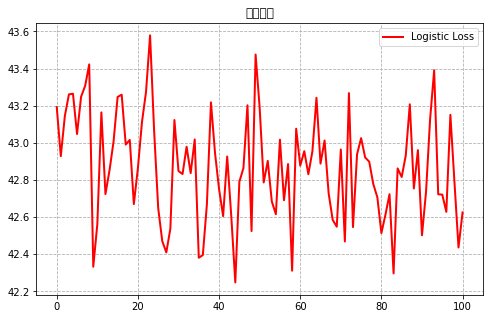

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 0, total loss: 42.777403
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.282315
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.898319
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.052337
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.962803
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.755139
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 6, total loss: 42.929046
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.067463
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.917731
total_train_accuracy: 

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.435882
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.459120
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.570636
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.227120
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.849992
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.735321
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.414438
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 42.867964
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.730197
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.740509
total_train_accuracy: tensor(0.9708, dev

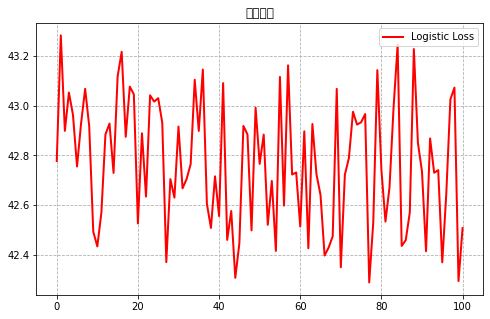

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.683979
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.645096
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 42.682859
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 42.987656
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.634248
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.043277
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.762359
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.663628
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 42.978719
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.003759
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.056356
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.316186
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.571818
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.533106
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.744789
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.756789
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 43.053275
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 42.958043
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.869717
total_train_accuracy: tensor(0.9542, dev

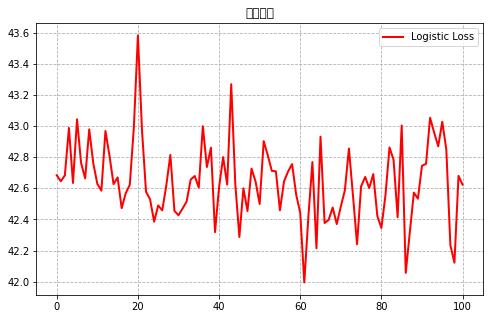

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.812816
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.799025
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.076908
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.640813
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.909809
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.902852
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.509266
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.685415
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.911336
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.736735
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.058636
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.845329
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 42.923236
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.674023
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 90, total loss: 42.859640
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.644845
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.431571
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 93, total loss: 42.942909
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.191994
total_train_accuracy: tensor(0.9417, dev

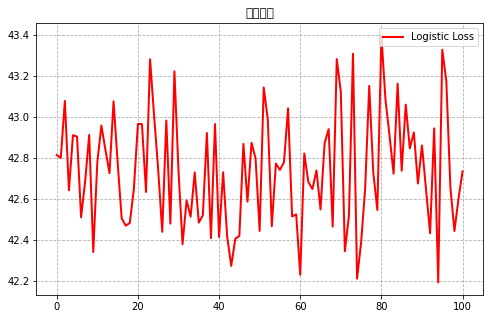

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 82
549 82
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.894887
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.661659
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.787371
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.551673
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.354350
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.324008
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.662244
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.701547
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.365657
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.338316
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.532564
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.520440
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.576579
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.635587
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.342519
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 91, total loss: 42.652613
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.585747
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.443767
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.556423
total_train_accuracy: tensor(0.9667, dev

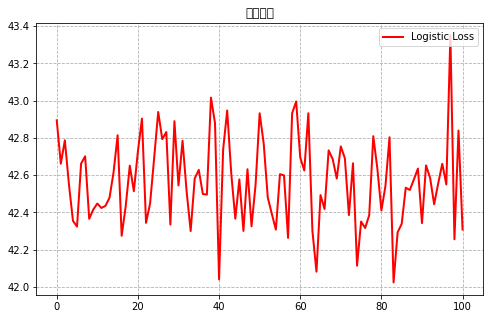

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.9375, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9687501


In [18]:
#train model with new features of 94
model=model4
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLPy/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP4(
  (bn0): BatchNorm1d(81, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=81, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 82
f1_score:  %.4f 0.8645077029142478
accuracy_score: 0.8695652173913043
recall_score: 0.8642821231056526
pre_recall: 0.8770412218688081
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

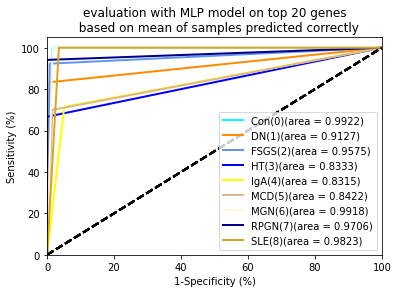

In [19]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP4()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [1]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'
convmlpy_20_path='results_genes/ConvMLP2/contri_20_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'PCK1', 'DUSP6', 'EEF1AKMT3', 'GDF15', 'ABCB7', 'PTP4A1', 'KLF6']
intersecion_list: ['LHPP', 'CTSG', 'CYP2J2', 'AGL', 'ZNHIT1', 'RPS27L', 'CHP1', 'RGS5']
intersecion_list: ['ISCU', 'ACTA2', 'CAMLG', 'CFLAR', 'METTL9', 'TRA2A', 'COX15', 'ACP6', 'MEST', 'VDR', 'VTCN1']
intersecion_list: ['TESC', 'SLC3A2', 'PCK1', 'ATP6V1F', 'FST', 'VAMP8', 'KLF6']
intersecion_list: ['RPL38', 'TMEM100', 'ITGB3BP', 'AFP', 'LYPLA1', 'WASHC3', 'NONO']
intersecion_list: ['EPM2AIP1', 'ATP5IF1', 'MRPS16', 'RRM2', 'COL4A3BP', 'PTMS', 'LIPC', 'ITGB3BP']
intersecion_list: ['ADI1', 'WARS2', 'UCHL1', 'ACAD10', 'RGN', 'BDKRB2', 'ABHD2', 'NDUFB1', 'NUDT4', 'SPI1']
intersecion_list: ['ABCC3', 'SH3BP2', 'ATP6V1F', 'GPX2', 'UGDH', 'CFB', 'CGREF1', 'BCCIP', 'PPP6R1', 'ANKRD2', 'RHOBTB1']
intersecion_list: ['IFIT1', 'IFI6', 'GPX3', 'NDUFA13', 'TRIM14', 'HERC5', 'IFI44L', 'DEPTOR']


In [2]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLP2_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLP2_NFM_test_info.csv')



74
columns: ['CAMLG', 'WARS2', 'CTSG', 'COL4A3BP', 'ANKRD2', 'PPP6R1', 'WASHC3', 'RPS27L', 'NDUFB1', 'TESC', 'SLC3A2', 'UGDH', 'EEF1AKMT3', 'GDF15', 'MRPS16', 'PTMS', 'ACTA2', 'TMEM100', 'ATP5IF1', 'VAMP8', 'RRM2', 'ACP6', 'ABCB7', 'RGS5', 'SPI1', 'PCK1', 'ATP6V1F', 'TRA2A', 'LYPLA1', 'UCHL1', 'LIPC', 'MEST', 'LHPP', 'EPM2AIP1', 'IFI6', 'CYP2J2', 'AFP', 'RGN', 'ZNHIT1', 'ITGB3BP', 'NONO', 'ADI1', 'DUSP6', 'GPX2', 'CGREF1', 'BDKRB2', 'ABHD2', 'HERC5', 'VDR', 'VTCN1', 'CHP1', 'KLF6', 'ISCU', 'RPL38', 'SH3BP2', 'COX15', 'PTP4A1', 'IFIT1', 'TRIM14', 'GPX3', 'DEPTOR', 'ABCC3', 'CFLAR', 'RHOB', 'METTL9', 'FST', 'ACAD10', 'NDUFA13', 'AGL', 'CFB', 'RHOBTB1', 'BCCIP', 'IFI44L', 'NUDT4', 'label']
(549, 75)
(138, 75)


549 75
549 75


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:611: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:612: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2417, device='cuda:0')
Training Epoch: 0, total loss: 64.266884
total_train_accuracy: tensor(0.5146, device='cuda:0')
Training Epoch: 1, total loss: 60.808332
total_train_accuracy: tensor(0.5833, device='cuda:0')
Training Epoch: 2, total loss: 59.243103
total_train_accuracy: tensor(0.6271, device='cuda:0')
Training Epoch: 3, total loss: 58.046315
total_train_accuracy: tensor(0.6979, device='cuda:0')
Training Epoch: 4, total loss: 56.726066
total_train_accuracy: tensor(0.7021, device='cuda:0')
Training Epoch: 5, total loss: 56.825238
total_train_accuracy: tensor(0.7354, device='cuda:0')
Training Epoch: 6, total loss: 55.852397
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 7, total loss: 55.544353
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 8, total loss: 54.883085
total_train_accuracy: tensor(0.7500, device='cuda:0')
Training Epoch: 9, total loss: 54.684359
total_train_accuracy: tensor(0.7583, device='cuda:

total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 86, total loss: 46.651802
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 87, total loss: 46.712824
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 88, total loss: 45.821805
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 45.516691
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 90, total loss: 45.882474
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 91, total loss: 45.663265
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 92, total loss: 46.117028
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 93, total loss: 45.308798
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 94, total loss: 45.846397
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 95, total loss: 45.409877
total_train_accuracy: tensor(0.9021, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new

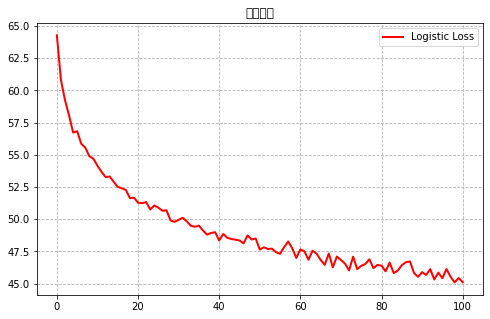

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:649: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:650: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.7917, device='cuda:0')
acc_test_each_k: tensor(0.7917, device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.8896, device='cuda:0')
Training Epoch: 0, total loss: 46.573129
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 1, total loss: 45.957692
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 2, total loss: 46.351924
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 3, total loss: 45.473753
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 4, total loss: 45.805632
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 5, total loss: 45.431641
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 6, total loss: 45.597081
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 7, total loss: 45.219506
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 8, total loss: 45.441835
total_train_ac

total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 85, total loss: 44.210180
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 43.550125
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 43.907667
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 43.521657
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.848752
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 90, total loss: 43.851889
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 91, total loss: 44.053352
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.455696
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.726527
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 43.811646
total_train_accuracy: tensor(0.9604, dev

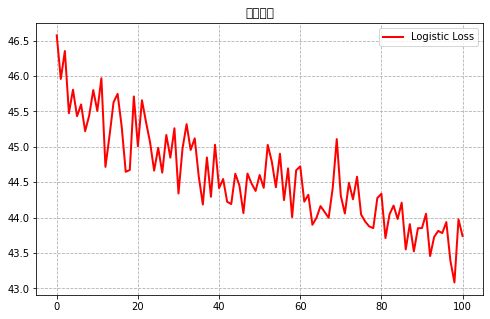

test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 0, total loss: 44.855022
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 1, total loss: 44.157131
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 2, total loss: 44.132711
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 3, total loss: 44.222859
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.563161
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 5, total loss: 43.759471
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 6, total loss: 44.253138
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 43.631842
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 8, total loss: 44.181164
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.118740
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 43.356986
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.745052
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 88, total loss: 43.619556
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 43.075587
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 43.339285
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 91, total loss: 43.447899
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.315834
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.391448
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.096225
total_train_accuracy: tensor(0.9646, dev

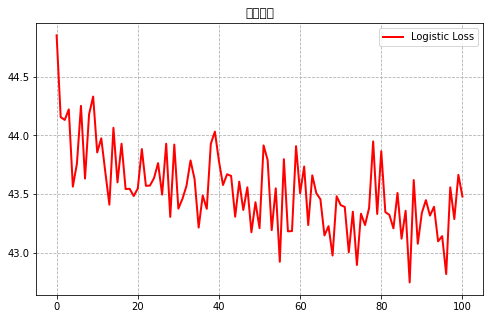

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 43.792445
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 1, total loss: 43.835588
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 43.031122
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 3, total loss: 43.814672
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.985340
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 5, total loss: 43.549775
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 6, total loss: 43.210517
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.158509
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.393274
total_train_accuracy: 

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.654773
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.704916
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.444126
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 43.335191
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.087817
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.855212
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 43.101292
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.928053
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.761595
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 94, total loss: 43.192145
total_train_accuracy: tensor(0.9563, dev

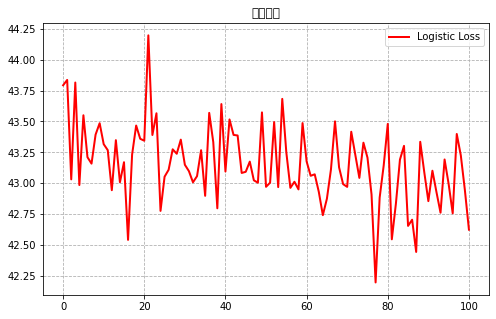

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 43.037206
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 43.088551
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 43.329921
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.218582
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.189216
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.880659
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.922221
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.800658
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.733861
total_train_accuracy: 

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.833082
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.817068
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.542690
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.357951
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.373027
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 90, total loss: 42.142651
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.697503
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.582693
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.915359
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.730604
total_train_accuracy: tensor(0.9667, dev

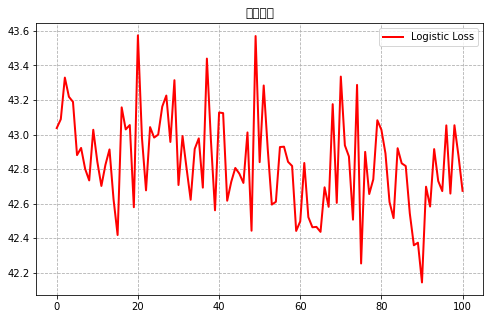

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.078002
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.869917
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.183030
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 3, total loss: 43.209633
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.996599
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 42.891930
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.877733
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.703158
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.913935
total_train_ac

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.659812
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.506006
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.476515
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 42.816680
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.462729
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.759490
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.502198
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.633020
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.885335
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.844057
total_train_accuracy: tensor(0.9688, dev

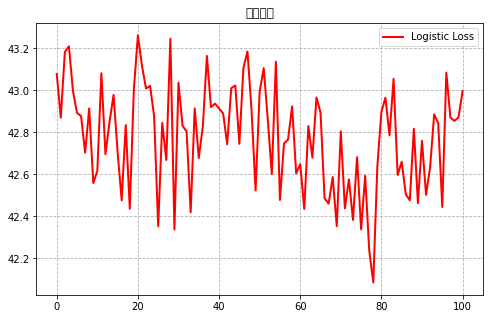

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.188744
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 43.229281
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.641570
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.803146
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 4, total loss: 42.294467
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.813701
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.621897
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.577392
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.917688
total_train_accuracy: 

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.456694
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.324912
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.369257
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.804297
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.786139
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.751858
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.353100
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.545580
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 42.680060
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.634080
total_train_accuracy: tensor(0.9563, dev

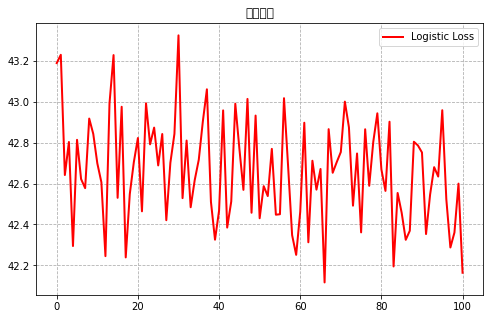

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 0, total loss: 43.731255
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.552907
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 42.719475
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.703456
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 42.984687
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.111145
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.646930
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.743011
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.382918
total_train_ac

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.286712
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.621443
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.712999
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 42.776186
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.734580
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.281279
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.747310
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.466573
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.326243
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.237869
total_train_accuracy: tensor(0.9792, dev

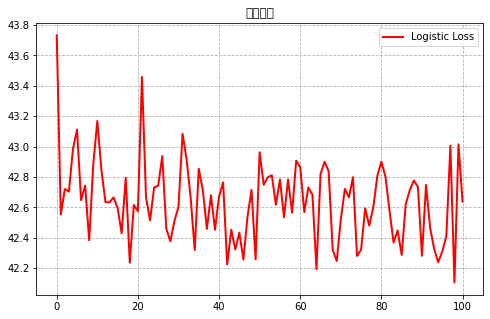

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.486629
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.683159
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.866875
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.221197
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.726788
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.251975
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.597915
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 42.551982
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.451924
total_train_accuracy: 

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.618846
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.396396
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.691466
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.115685
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.550448
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.723916
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.434351
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.761166
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.542470
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.562757
total_train_accuracy: tensor(0.9667, dev

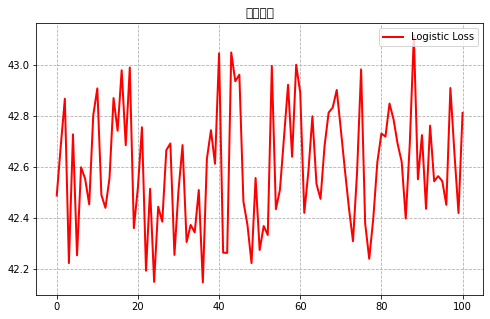

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 75
549 75
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.071071
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.314828
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 2, total loss: 43.252241
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.641161
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.701037
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.411463
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 42.749304
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.272560
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.751095
total_train_accuracy: 

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.994529
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.404416
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.609439
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.141684
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.501247
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.403546
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 91, total loss: 42.930604
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.327295
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.394998
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.842875
total_train_accuracy: tensor(0.9833, dev

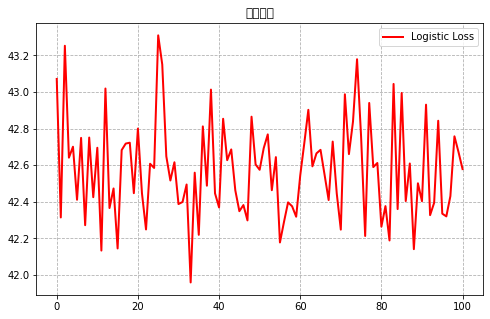

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.7917, device='cuda:0'), tensor(0.8958, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.7916667, dtype=float32), array(0.8958334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9625


In [4]:
#train model with new features of 94
model=model10
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLP2_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP10(
  (bn0): BatchNorm1d(74, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=74, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 75


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.8732982227426996
accuracy_score: 0.8840579710144928
recall_score: 0.8790969379204674
pre_recall: 0.8766070530776413
n_classes: 9


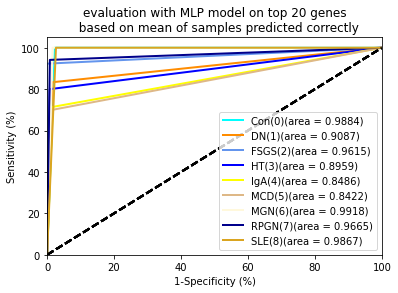

In [5]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLP2_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP10()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLP2_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [19]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'
convmlpy_20_path='results_genes/ConvAttMLP/contri_20_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['RHOB', 'EEF1AKMT3', 'DUSP6', 'ADPRM', 'ABCB7', 'KLF6', 'GDF15', 'PCK1', 'PTP4A1']
intersecion_list: ['CHP1', 'LHPP', 'ZNHIT1', 'RGS5', 'AGL', 'CYP2J2', 'RPS27L', 'CTSG']
intersecion_list: ['ISCU', 'TRA2A', 'VDR', 'COX15', 'ACTA2', 'VTCN1', 'ACP6', 'MEST', 'CFLAR', 'METTL9']
intersecion_list: ['RHOB', 'SLC3A2', 'TESC', 'KLF6', 'VAMP8', 'FST', 'ATP6V1F']
intersecion_list: ['WASHC3', 'NONO', 'ITGB3BP', 'TMEM100', 'LYPLA1', 'LARP1', 'RPL38']
intersecion_list: ['COL4A3BP', 'RRM2', 'MRPS16', 'PTMS', 'PAFAH1B3', 'LIPC', 'EPM2AIP1', 'ATP5IF1']
intersecion_list: ['NDUFB1', 'ACAD10', 'NUDT4', 'PLIN3', 'ADI1', 'SPI1', 'UCHL1', 'RGN', 'ABHD2']
intersecion_list: ['UGDH', 'CGREF1', 'ABCC3', 'BCCIP', 'SH3BP2', 'CFB', 'ATP6V1F', 'GPX2']
intersecion_list: ['IFI44L', 'MRPS16', 'NDUFA13', 'IFI6', 'GPX3', 'TRIM14', 'DEPTOR', 'IFIT1']


In [20]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_test_info.csv')



70
columns: ['UGDH', 'NDUFB1', 'NONO', 'BCCIP', 'ITGB3BP', 'IFI44L', 'ZNHIT1', 'KLF6', 'ACTA2', 'SPI1', 'RGS5', 'AGL', 'VTCN1', 'LIPC', 'VDR', 'GPX3', 'LYPLA1', 'LARP1', 'METTL9', 'IFIT1', 'CGREF1', 'ABCC3', 'IFI6', 'SLC3A2', 'PLIN3', 'LHPP', 'ADPRM', 'TMEM100', 'RRM2', 'ABCB7', 'COX15', 'PAFAH1B3', 'ABHD2', 'NDUFA13', 'ATP6V1F', 'ACP6', 'PCK1', 'MEST', 'CFLAR', 'CYP2J2', 'UCHL1', 'GPX2', 'RGN', 'DEPTOR', 'RHOB', 'ISCU', 'EEF1AKMT3', 'NUDT4', 'WASHC3', 'DUSP6', 'TESC', 'VAMP8', 'MRPS16', 'GDF15', 'CFB', 'FST', 'CTSG', 'RPL38', 'COL4A3BP', 'ACAD10', 'TRA2A', 'CHP1', 'SH3BP2', 'ADI1', 'PTMS', 'ATP5IF1', 'EPM2AIP1', 'TRIM14', 'RPS27L', 'PTP4A1', 'label']
(549, 71)
(138, 71)


549 71
549 71


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:673: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:674: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2729, device='cuda:0')
Training Epoch: 0, total loss: 63.845235
total_train_accuracy: tensor(0.5083, device='cuda:0')
Training Epoch: 1, total loss: 60.692888
total_train_accuracy: tensor(0.5938, device='cuda:0')
Training Epoch: 2, total loss: 59.178459
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 3, total loss: 58.077065
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 4, total loss: 57.541557
total_train_accuracy: tensor(0.6917, device='cuda:0')
Training Epoch: 5, total loss: 56.611570
total_train_accuracy: tensor(0.7271, device='cuda:0')
Training Epoch: 6, total loss: 56.134802
total_train_accuracy: tensor(0.7250, device='cuda:0')
Training Epoch: 7, total loss: 55.705011
total_train_accuracy: tensor(0.7292, device='cuda:0')
Training Epoch: 8, total loss: 55.363670
total_train_accuracy: tensor(0.7438, device='cuda:0')
Training Epoch: 9, total loss: 54.445137
total_train_accuracy: tensor(0.7354, device='cuda:

total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 86, total loss: 46.043534
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 87, total loss: 45.583845
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 88, total loss: 45.964227
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 89, total loss: 46.586338
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 90, total loss: 46.057648
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 91, total loss: 46.044956
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 92, total loss: 45.494776
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 93, total loss: 46.266730
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 94, total loss: 45.851394
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 95, total loss: 46.149276
total_train_accuracy: tensor(0.9000, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

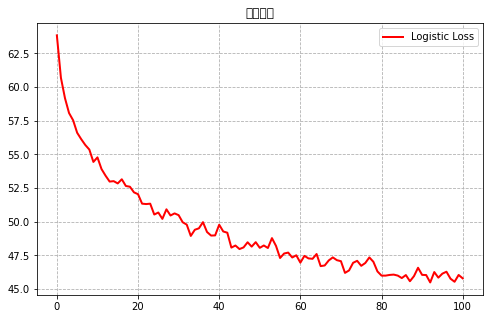

test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 71


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:711: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:712: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 71
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.500382
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 1, total loss: 46.344034
total_train_accuracy: tensor(0.8750, device='cuda:0')
Training Epoch: 2, total loss: 46.968415
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 3, total loss: 46.034855
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 4, total loss: 45.652678
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 5, total loss: 45.503377
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 6, total loss: 45.845990
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.647750
total_train_accuracy: tensor(0.9000, device='cuda:0')
Training Epoch: 8, total loss: 46.047929
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 9, total loss: 45.240398
total_train_accuracy: tensor(0.9125, device

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.836331
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 87, total loss: 44.350643
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 88, total loss: 44.269921
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 44.133563
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 90, total loss: 44.307239
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.886081
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 44.050768
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 93, total loss: 44.067319
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 94, total loss: 44.661134
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 95, total loss: 44.022368
total_train_accuracy: tensor(0.9229, dev

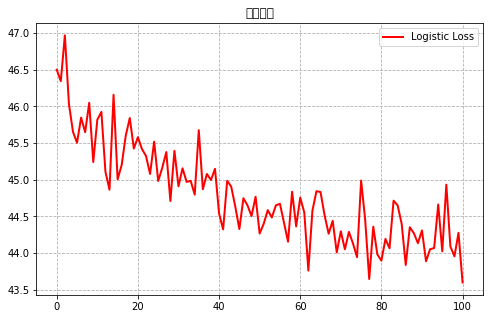

test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 44.324176
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 44.041199
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 44.055632
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 3, total loss: 43.999435
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 4, total loss: 43.955323
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 5, total loss: 44.091369
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 43.930875
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 44.356055
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 8, total loss: 44.620913
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.420812
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 86, total loss: 43.658054
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 43.542582
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.473762
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 43.340502
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 90, total loss: 43.518058
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 91, total loss: 43.555160
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 92, total loss: 43.661005
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 43.653922
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 94, total loss: 43.462374
total_train_accuracy: tensor(0.9750, dev

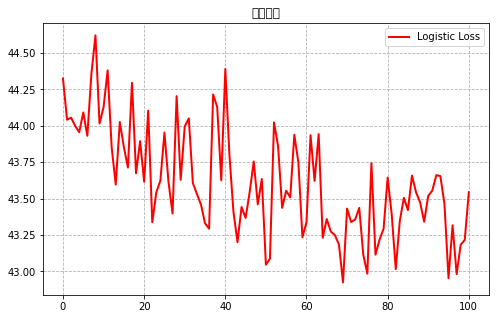

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 0, total loss: 43.709368
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 43.234191
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 43.323000
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 44.055930
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.658874
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 5, total loss: 43.476231
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 43.094115
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 43.280114
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 8, total loss: 43.643471
total_train_ac

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 43.241853
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.858962
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.770055
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 43.007943
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 89, total loss: 43.592396
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 43.221290
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 91, total loss: 43.468076
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.155440
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.981318
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.645000
total_train_accuracy: tensor(0.9333, dev

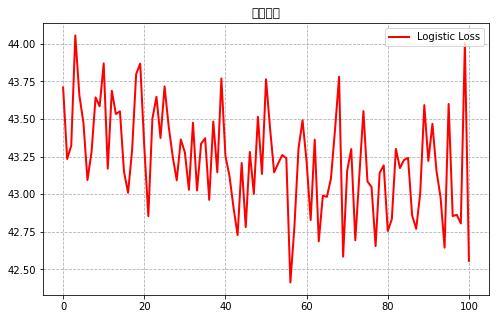

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.663117
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 1, total loss: 43.313388
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.921951
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 43.025434
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.051894
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.805148
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 6, total loss: 43.721203
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 7, total loss: 43.566572
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.070127
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.140164
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 43.244229
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.160663
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.590847
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.792049
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.297587
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.131189
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 92, total loss: 43.234659
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.994984
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.232524
total_train_accuracy: tensor(0.9667, dev

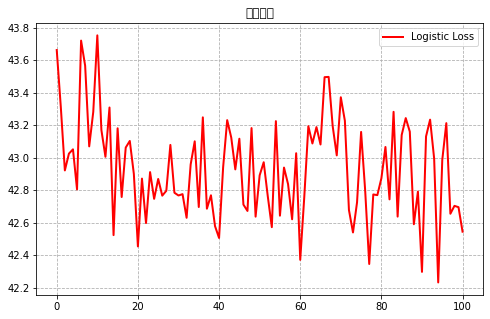

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.411806
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 42.937500
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.996179
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.047792
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.772057
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.163180
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 6, total loss: 43.048944
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.829384
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 8, total loss: 43.377907
total_train_ac

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.332528
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.775210
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.543590
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.575769
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.896606
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 90, total loss: 42.998060
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 91, total loss: 43.482862
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.666822
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.628622
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.772579
total_train_accuracy: tensor(0.9729, dev

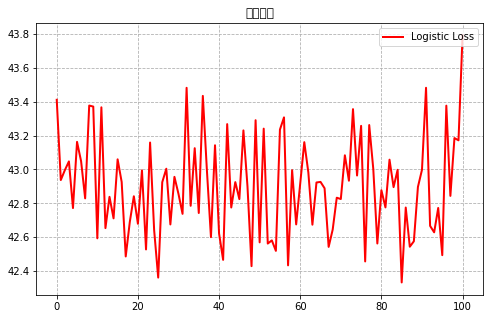

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.340338
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.964428
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 42.991836
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.694776
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 4, total loss: 43.272249
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.745455
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.753225
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.845484
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.789969
total_train_ac

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.604983
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 86, total loss: 43.019537
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.835168
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.112269
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.847597
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.151376
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 43.133842
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.543772
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.866282
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.247693
total_train_accuracy: tensor(0.9667, dev

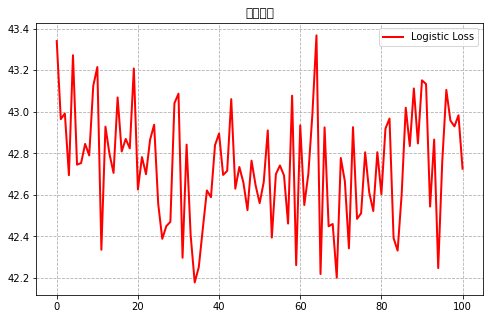

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 42.890614
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.925823
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.596516
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 43.227766
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.798376
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.729915
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.589527
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 7, total loss: 43.056495
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.532333
total_train_accuracy: 

total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 85, total loss: 42.681590
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.691023
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.728078
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.440450
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.147272
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.256656
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.680215
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.307756
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.531286
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.423236
total_train_accuracy: tensor(0.9771, dev

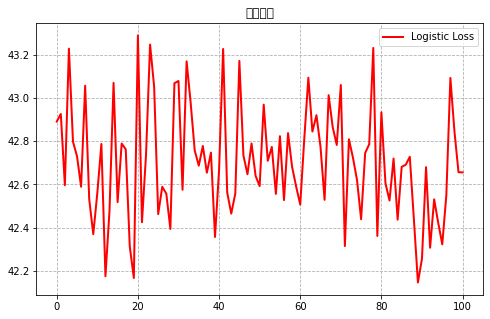

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.755954
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.874915
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.675095
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.467200
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.607972
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.507989
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 42.906165
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.947205
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.521816
total_train_ac

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.711129
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.245078
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 87, total loss: 42.737613
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 42.578701
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.441462
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.313806
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 91, total loss: 43.046225
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 92, total loss: 42.775355
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.250943
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.059163
total_train_accuracy: tensor(0.9458, dev

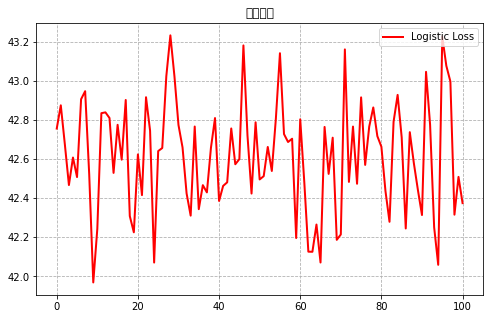

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 71
549 71
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 42.765849
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.324095
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.297258
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.830539
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.092488
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 42.863624
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.477183
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.365388
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.439220
total_train_accuracy: 

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.114186
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.451447
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.430365
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.425291
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.355332
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.449202
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.515254
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 92, total loss: 43.150120
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 42.813752
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.678796
total_train_accuracy: tensor(0.9625, dev

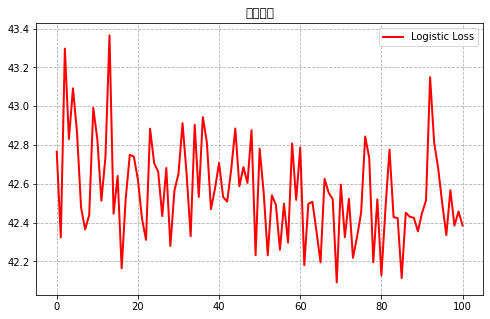

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8125, device='cuda:0'), tensor(0.8958, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8125, dtype=float32), array(0.8958334, dtype=float32), array(0.9583334, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.95625


In [22]:
#train model with new features of 94
model=model13
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvAttMLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP13(
  (bn0): BatchNorm1d(70, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=70, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 71
f1_score:  %.4f 0.8893124159790826
accuracy_score: 0.8985507246376812
recall_score: 0.89179535061888
pre_recall: 0.894455766239392
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

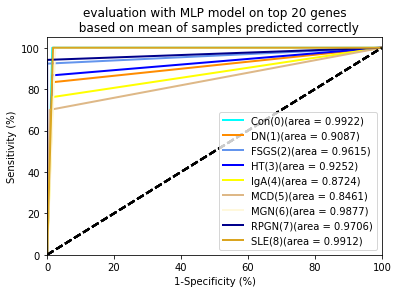

In [23]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvAttMLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP13()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [20]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_20_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'
convmlpy_20_path='results_genes/ConvMLPy/contri_20_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['PTP4A1', 'EEF1AKMT3', 'KLF6', 'ADPRM', 'RHOB', 'GDF15', 'PCK1']
intersecion_list: ['CTSG', 'UCHL1', 'LHPP', 'CHP1', 'ZNHIT1', 'RGS5', 'AGL', 'CYP2J2', 'RPS27L']
intersecion_list: ['COX15', 'ACP6', 'VTCN1', 'MEST', 'ISCU', 'METTL9', 'VDR', 'CFLAR', 'TRA2A', 'ACTA2']
intersecion_list: ['VAMP8', 'KLF6', 'SLC3A2', 'TESC', 'FST', 'ATP6V1F', 'PCK1']
intersecion_list: ['TMEM100', 'LARP1', 'WASHC3', 'ITGB3BP', 'LYPLA1']
intersecion_list: ['LIPC', 'ATP5IF1', 'MRPS16', 'COL4A3BP', 'PTMS', 'EPM2AIP1', 'RRM2']
intersecion_list: ['UCHL1', 'BDKRB2', 'NDUFB1', 'PLIN3', 'ADI1', 'WARS2', 'ACAD10', 'SPI1', 'NUDT4', 'ABHD2', 'RGN']
intersecion_list: ['GPX2', 'CGREF1', 'CFB', 'ANKRD2', 'SH3BP2', 'UGDH', 'ATP6V1F', 'ABCC3', 'BCCIP']
intersecion_list: ['NDUFA13', 'HERC5', 'GPX3', 'IFIT1', 'TRIM14', 'IFI6', 'DEPTOR', 'IFI44L']


In [23]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_intersecions_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_genes_intersections_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')



69
columns: ['VAMP8', 'LIPC', 'COX15', 'SH3BP2', 'NDUFB1', 'ADI1', 'KLF6', 'PLIN3', 'ATP5IF1', 'RHOB', 'TESC', 'GDF15', 'LYPLA1', 'GPX3', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'ABCC3', 'TMEM100', 'LHPP', 'CHP1', 'BDKRB2', 'ANKRD2', 'EEF1AKMT3', 'HERC5', 'AGL', 'SLC3A2', 'WARS2', 'ACAD10', 'RRM2', 'DEPTOR', 'VDR', 'IFI44L', 'GPX2', 'CFB', 'LARP1', 'ZNHIT1', 'ADPRM', 'VTCN1', 'IFI6', 'MRPS16', 'TRIM14', 'SPI1', 'NUDT4', 'UGDH', 'ABHD2', 'TRA2A', 'PCK1', 'ACTA2', 'CTSG', 'CGREF1', 'UCHL1', 'PTP4A1', 'ACP6', 'RGS5', 'WASHC3', 'ITGB3BP', 'NDUFA13', 'MEST', 'ISCU', 'METTL9', 'COL4A3BP', 'FST', 'EPM2AIP1', 'ATP6V1F', 'RGN', 'BCCIP', 'label']
(549, 70)
(138, 70)


549 70
549 70


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2771, device='cuda:0')
Training Epoch: 0, total loss: 64.018012
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.739508
total_train_accuracy: tensor(0.6000, device='cuda:0')
Training Epoch: 2, total loss: 59.115286
total_train_accuracy: tensor(0.6438, device='cuda:0')
Training Epoch: 3, total loss: 58.158528
total_train_accuracy: tensor(0.6521, device='cuda:0')
Training Epoch: 4, total loss: 57.719086
total_train_accuracy: tensor(0.6542, device='cuda:0')
Training Epoch: 5, total loss: 57.278191
total_train_accuracy: tensor(0.7313, device='cuda:0')
Training Epoch: 6, total loss: 56.106214
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 7, total loss: 55.313636
total_train_accuracy: tensor(0.7167, device='cuda:0')
Training Epoch: 8, total loss: 55.241089
total_train_accuracy: tensor(0.7646, device='cuda:0')
Training Epoch: 9, total loss: 54.833511
total_train_accuracy: tensor(0.7667, device='cuda:

total_train_accuracy: tensor(0.8813, device='cuda:0')
Training Epoch: 86, total loss: 46.742158
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 87, total loss: 46.171358
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 88, total loss: 46.311844
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 89, total loss: 46.129127
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 90, total loss: 45.926938
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 91, total loss: 45.560240
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 92, total loss: 45.685682
total_train_accuracy: tensor(0.8667, device='cuda:0')
Training Epoch: 93, total loss: 47.053230
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 94, total loss: 46.228187
total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 95, total loss: 46.574523
total_train_accuracy: tensor(0.9063, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


tensor(0.9396, device='cuda:0')
Training Epoch: 100, total loss: 45.270834
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


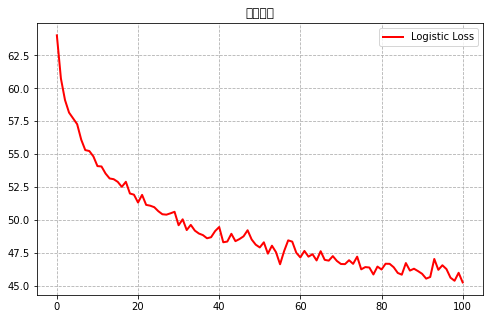

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.365242
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 1, total loss: 46.181069
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.287069
total_train_accuracy: tensor(0.8854, device='cuda:0')
Training Epoch: 3, total loss: 46.257442
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 4, total loss: 45.896821
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 5, total loss: 46.188136
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 6, total loss: 46.178184
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 7, total loss: 45.489533
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 8, total loss: 45.760926
total_train_ac

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.857539
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 86, total loss: 44.069230
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 43.949355
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 43.727394
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.502587
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 44.404564
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.918228
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 92, total loss: 44.181718
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 93, total loss: 44.234469
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 44.027745
total_train_accuracy: tensor(0.9563, dev

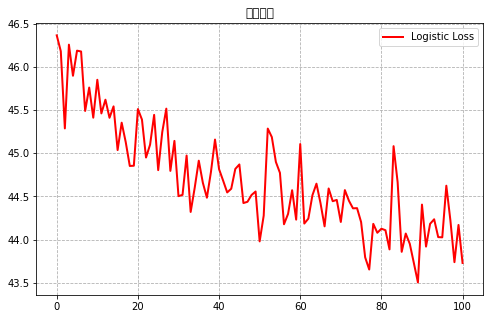

test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 44.567267
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 44.165332
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 2, total loss: 44.729089
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 3, total loss: 44.425159
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 4, total loss: 43.804684
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 43.815491
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 43.648382
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 7, total loss: 43.932736
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 8, total loss: 43.760841
total_train_ac

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.258615
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 43.345746
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 43.205335
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 88, total loss: 43.824437
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.427719
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.929746
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 43.358343
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 42.856236
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.066558
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 43.048915
total_train_accuracy: tensor(0.9646, dev

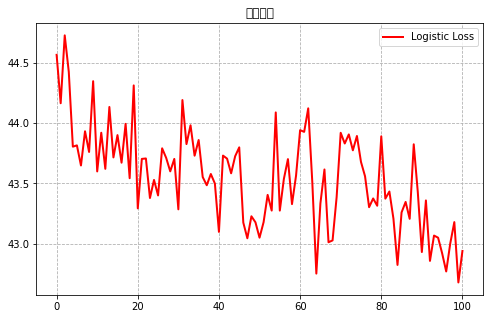

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.691423
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.672994
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.344374
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 43.903037
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.303360
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 5, total loss: 44.289988
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.271904
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.738829
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.456490
total_train_accuracy: 

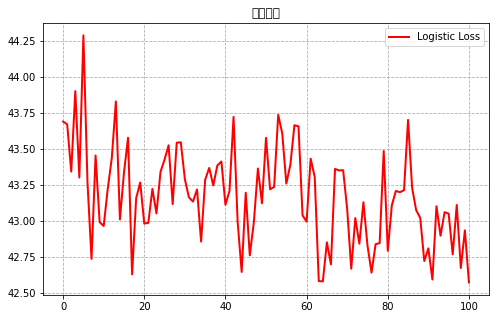

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 43.283417
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.307901
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.210523
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.625014
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.267720
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.933908
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.039396
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.912818
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 8, total loss: 43.437636
total_train_accuracy: 

total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 85, total loss: 43.083151
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.439883
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.847431
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.133690
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.563818
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 90, total loss: 43.841010
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.732012
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.613111
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.644967
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.847709
total_train_accuracy: tensor(0.9583, dev

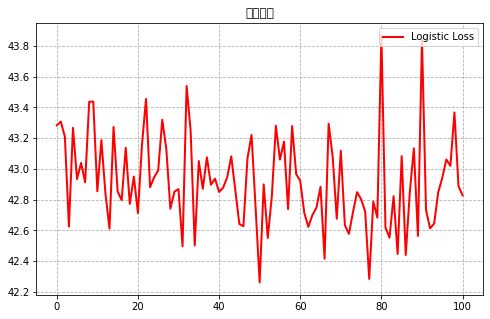

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.120914
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.525366
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.110750
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.072342
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 43.006249
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.617686
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.175176
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 42.991528
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 8, total loss: 43.288029
total_train_ac

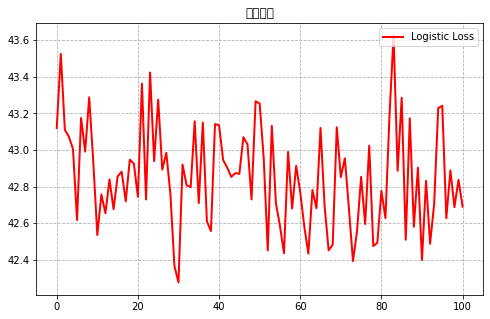

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.295888
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.921133
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.512724
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.293563
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.833275
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.094266
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 42.978979
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.372193
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 42.955504
total_train_accuracy: 

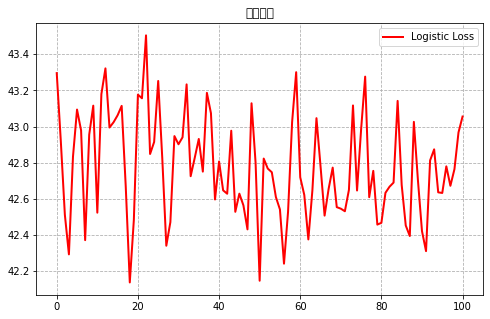

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.130679
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.762814
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.540123
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.759915
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.460862
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.644826
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.510232
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.903655
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.909276
total_train_accuracy: 

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.569948
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 87, total loss: 42.872773
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.110637
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.039054
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.058560
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.359888
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.589039
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.211416
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.702519
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 95, total loss: 42.697455
total_train_accuracy: tensor(0.9542, dev

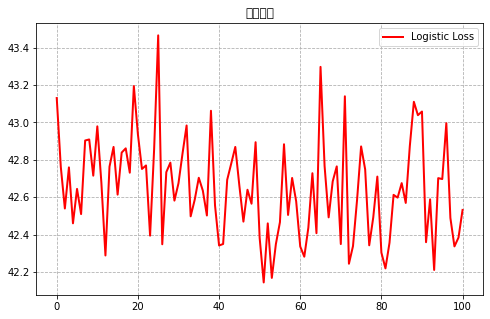

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 42.985122
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 1, total loss: 42.993695
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.813482
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.032353
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.965435
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.860628
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.596344
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.661388
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.532364
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.518215
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.544649
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 87, total loss: 42.000091
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.110721
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.170308
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 42.687252
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.985588
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.653464
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.484434
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.270553
total_train_accuracy: tensor(0.9708, dev

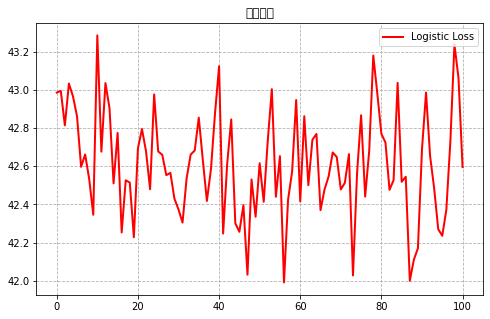

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 70
549 70
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 0, total loss: 42.290823
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.202170
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 2, total loss: 42.759431
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.665099
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.541274
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.667285
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.412379
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.472479
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.297251
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.559583
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.563944
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.403213
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 89, total loss: 43.231969
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.698540
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.243176
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.711686
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.313319
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 94, total loss: 42.748400
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 95, total loss: 42.697672
total_train_accuracy: tensor(0.9667, dev

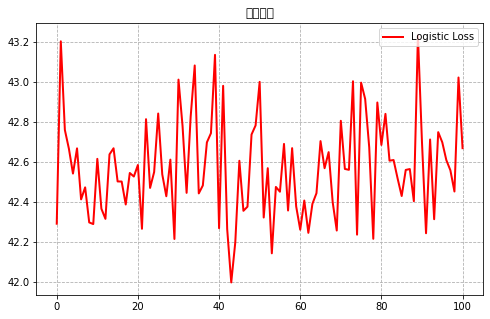

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.8542, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.8541667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9666667


In [4]:
#train model with new features of 94
model=model5
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvMLPy_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP5(
  (bn0): BatchNorm1d(69, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=69, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 70
f1_score:  %.4f 0.8903070957622629
accuracy_score: 0.8913043478260869
recall_score: 0.8955804544039838
pre_recall: 0.8939450527685823
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

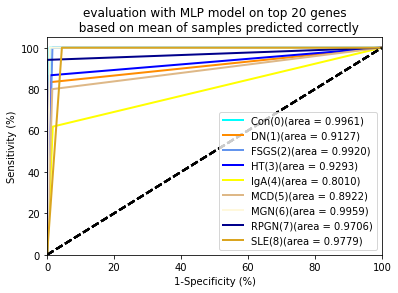

In [6]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP5()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



MLP5(
  (bn0): BatchNorm1d(69, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=69, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 70
f1_score:  %.4f 0.8903070957622629
accuracy_score: 0.8913043478260869
recall_score: 0.8955804544039838
pre_recall: 0.8939450527685823
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

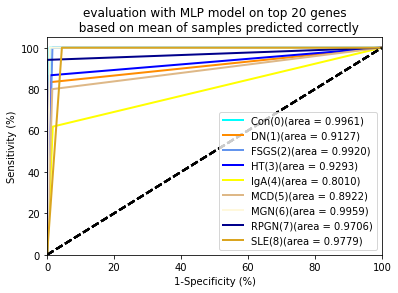

In [7]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvMLPy_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP5()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [27]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/intersections/MLP_ConvMLPy_genes_intersections_20.csv'
nfm_layer_20_path='results_genes/intersections/ConvMLPy_NFM_genes_intersections_20.csv'
convmlpy_20_path='results_genes/intersections/genes_intersections_20.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')


#
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
#print('mlp_20_df:',mlp_20_df)
mlp_20_columns=mlp_20_df.columns.tolist()
#print(mlp_20_columns)
nfm_layer_20_columns=nfm_layer_20_df.iloc[:,1:].columns.tolist()
convmlpy_20_columns=convmlpy_20_df.iloc[:,1:].columns.tolist()


import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_union_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    
        
    # 将列表转换为集合
    mlp_set = set(mlp_20_columns)
    nfm_set = set(nfm_layer_20_columns)
    convmlpy_set=set(convmlpy_20_columns)
    # 求交集
    intersection1 = mlp_set.union(nfm_set)
    intersection=convmlpy_set.union(intersection1)
    # 将交集转换回列表
    intersection_list = list(intersection)
    print('intersecion_list:',intersection_list)
    writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['LIPC', 'TFAP2A', 'UBXN8', 'LYPLA1', 'GDF15', 'CHODL', 'EMX1', 'TMEM100', 'NR0B2', 'SLC3A2', 'FCGBP', 'LGMN', 'WASHC4', 'BHLHE40', 'ABHD2', 'GLB1L', 'FKBP4', 'MAP3K1', 'ADM2', 'ACVR1B', 'MEST', 'WDR12', 'FST', 'EPM2AIP1', 'ABLIM1', 'BTG1', 'COX15', 'OLFML3', 'ADI1', 'GPX3', 'PLIN3', 'CYP2J2', 'CHP1', 'CYP39A1', 'RPL38', 'HERC5', 'ACAD10', 'VDR', 'MRPS15', 'IFI44L', 'UQCR10', 'VTCN1', 'ENPP2', 'ALB', 'WASHC3', 'MT2A', 'COL4A3BP', 'TYMP', 'CAMLG', 'VAMP8', 'ATP6V0E2', 'SH3BP2', 'MS4A4A', 'ELF3', 'ATP5IF1', 'TESC', 'ABCC3', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'EEF1AKMT3', 'AGL', 'WARS2', 'TFAM', 'TTC1', 'GPX2', 'FOS', 'ADPRM', 'TRIM14', 'MRPS16', 'TUBA4B', 'UGDH', 'TRA2A', 'PCK1', 'RHBDL1', 'CGREF1', 'CYP21A2', 'OVOL2', 'CHCHD3', 'CPVL', 'RGS5', 'ITGB3BP', 'OXCT1', 'ISCU', 'ATP6V1F', 'DEPTOR', 'RGN', 'SERPINF1', 'ECH1', 'NDUFB1', 'KLF6', 'RHOB', 'IFIT1', 'CFLAR', 'PTMS', 'RPS27L', 'NONO', 'TTC3', 'NEAT1', 'ABCB7', 'IGLV2-14', 'GEMIN6', 'CFB', 'LARP1', 'ZNHIT1', 'KLF9', 

In [28]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_union_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_ConvMLPy_NFM_genes_union_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_test_info.csv')



119
columns: ['VAMP8', 'ATP6V0E2', 'LIPC', 'SH3BP2', 'MS4A4A', 'ELF3', 'TFAP2A', 'ATP5IF1', 'UBXN8', 'TESC', 'LYPLA1', 'GDF15', 'ABCC3', 'CHODL', 'EMX1', 'TMEM100', 'LHPP', 'ANKRD2', 'BDKRB2', 'CTTN', 'NR0B2', 'EEF1AKMT3', 'SLC3A2', 'AGL', 'WARS2', 'FCGBP', 'LGMN', 'WASHC4', 'TFAM', 'TTC1', 'GPX2', 'FOS', 'BHLHE40', 'ADPRM', 'TRIM14', 'MRPS16', 'TUBA4B', 'UGDH', 'ABHD2', 'GLB1L', 'TRA2A', 'FKBP4', 'PCK1', 'RHBDL1', 'MAP3K1', 'ADM2', 'CGREF1', 'CYP21A2', 'OVOL2', 'CHCHD3', 'ACVR1B', 'CPVL', 'RGS5', 'ITGB3BP', 'OXCT1', 'MEST', 'ISCU', 'WDR12', 'FST', 'EPM2AIP1', 'ATP6V1F', 'DEPTOR', 'RGN', 'SERPINF1', 'ECH1', 'ABLIM1', 'BTG1', 'BCCIP', 'COX15', 'OLFML3', 'NDUFB1', 'ADI1', 'GPX3', 'PLIN3', 'KLF6', 'RHOB', 'IFIT1', 'CYP2J2', 'CFLAR', 'PTMS', 'RPS27L', 'NONO', 'TTC3', 'NEAT1', 'CHP1', 'CYP39A1', 'RPL38', 'HERC5', 'ABCB7', 'ACAD10', 'VDR', 'MRPS15', 'IGLV2-14', 'IFI44L', 'GEMIN6', 'UQCR10', 'CFB', 'LARP1', 'ZNHIT1', 'VTCN1', 'KLF9', 'ENPP2', 'SPI1', 'NUDT4', 'ALB', 'ACTA2', 'CTSG', 'UCHL1', 

549 120
549 120


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:530: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:531: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2729, device='cuda:0')
Training Epoch: 0, total loss: 63.995991
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.887007
total_train_accuracy: tensor(0.6042, device='cuda:0')
Training Epoch: 2, total loss: 58.765808
total_train_accuracy: tensor(0.6583, device='cuda:0')
Training Epoch: 3, total loss: 57.514741
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 4, total loss: 56.116668
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 5, total loss: 56.098042
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 6, total loss: 54.929514
total_train_accuracy: tensor(0.7729, device='cuda:0')
Training Epoch: 7, total loss: 54.793192
total_train_accuracy: tensor(0.7917, device='cuda:0')
Training Epoch: 8, total loss: 54.275839
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 9, total loss: 53.622114
total_train_accuracy: tensor(0.8167, device='cuda:

total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 86, total loss: 45.672251
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 45.382767
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 88, total loss: 45.020265
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 44.710364
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 90, total loss: 45.149127
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 91, total loss: 45.083055
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 92, total loss: 45.568733
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 93, total loss: 45.662867
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 45.360006
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 95, total loss: 45.103551
total_train_accuracy: tensor(0.9438, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

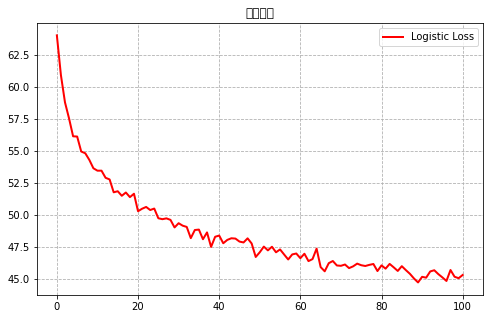

test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 120


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:568: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:569: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 120
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 0, total loss: 45.852353
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 1, total loss: 45.412637
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.464145
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 3, total loss: 45.746171
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 4, total loss: 45.384034
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 45.203825
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 6, total loss: 45.541455
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 45.269251
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 8, total loss: 44.780692
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 9, total loss: 44.935565
total_train_accuracy: tensor(0.9479, devic

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.496014
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 87, total loss: 44.060271
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.685852
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.421827
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.903137
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.594520
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.830322
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.428622
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 44.381701
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 95, total loss: 43.605980
total_train_accuracy: tensor(0.9583, dev

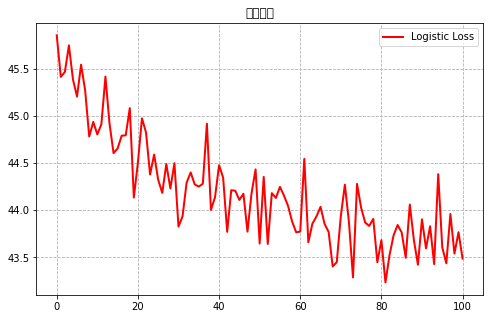

test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.649145
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.908542
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.455834
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 3, total loss: 43.913821
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 43.210893
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 5, total loss: 43.453998
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 6, total loss: 44.087477
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 7, total loss: 43.598421
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 43.572991
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.343225
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.200516
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 88, total loss: 43.391656
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 43.018465
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.819045
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 91, total loss: 43.356461
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.582179
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.847617
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.307282
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 95, total loss: 42.977230
total_train_accuracy: tensor(0.9708, dev

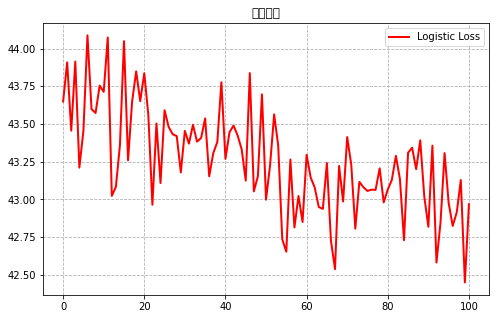

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 43.016135
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 43.178431
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.692108
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 3, total loss: 42.686254
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.201611
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.895846
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 6, total loss: 43.452321
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 43.015222
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.890596
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 43.125781
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.765108
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.687009
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.784034
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.104775
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.915870
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 42.945007
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.117420
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.544101
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.561414
total_train_accuracy: tensor(0.9625, dev

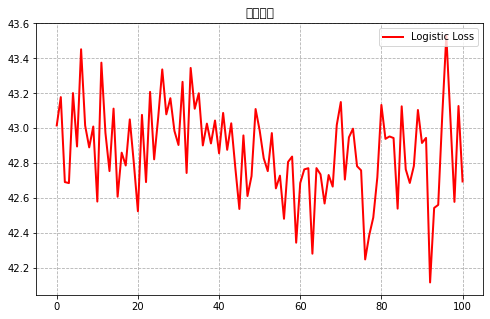

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.106040
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.832884
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.925255
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.777464
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.026853
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.997386
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.722647
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.832899
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.369445
total_train_accuracy

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.989232
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.507242
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 87, total loss: 42.294683
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.245143
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.602193
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.277112
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.375880
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.947416
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.358744
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.351667
total_train_accuracy: tensor(0.9792, dev

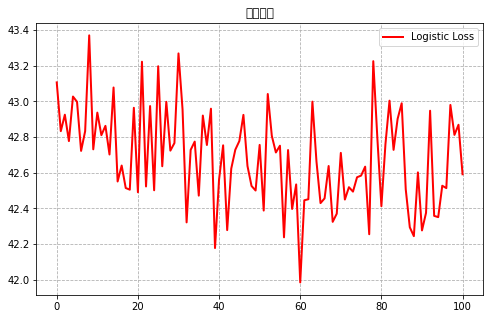

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 0, total loss: 43.380931
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.763021
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.806933
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.570863
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.603788
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.610424
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 6, total loss: 42.504914
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.679935
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.554345
total_train_

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.531284
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.197348
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.299888
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 88, total loss: 42.206547
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.374599
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 90, total loss: 42.857380
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.360834
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.630282
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.444875
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.134826
total_train_accuracy: tensor(0.9771, dev

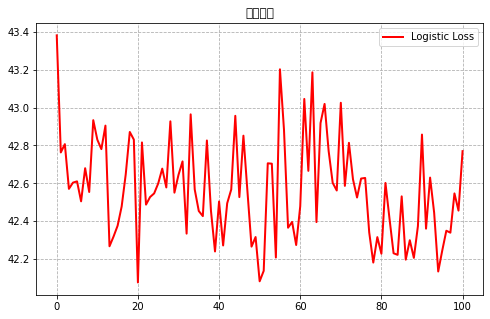

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.505550
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.811063
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.530773
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.482193
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.355999
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.523358
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.675773
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.878813
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.517876
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.257737
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 86, total loss: 42.499067
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.635779
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.462863
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.082814
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.471693
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.496312
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.294354
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.234738
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 42.876297
total_train_accuracy: tensor(0.9729, dev

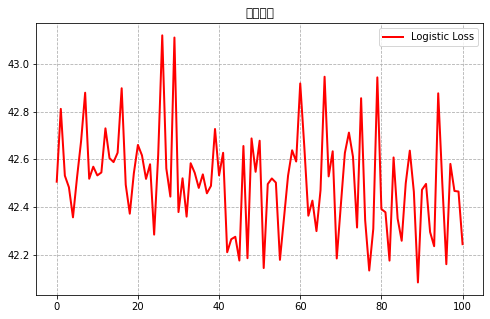

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.487568
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.807816
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.305722
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.471437
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.356915
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 5, total loss: 41.934358
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.211450
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 7, total loss: 42.257571
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.484186
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.496057
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.301447
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.135447
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 42.838856
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 90, total loss: 42.128760
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.399589
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.379789
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.215507
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.136543
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 42.262189
total_train_accuracy: tensor(0.9729, dev

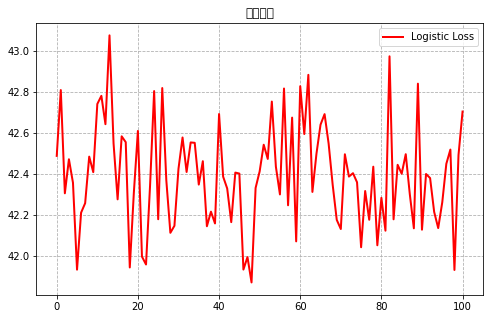

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.537030
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.322610
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.559453
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.914088
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 4, total loss: 42.266584
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.464093
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.247554
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.173144
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.764863
total_train_accuracy

total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 85, total loss: 42.180507
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 42.544845
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.722668
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.416910
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.247629
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.428498
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.178442
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.227502
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.375682
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.538017
total_train_accuracy: tensor(0.9708, dev

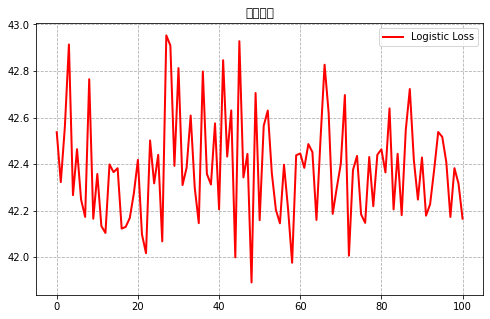

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 120
549 120
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 0, total loss: 42.183329
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.216137
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.085500
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 3, total loss: 41.914240
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 4, total loss: 41.984681
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.797336
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.242973
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.833577
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.785377
total_train_accuracy

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.309027
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.631601
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.548259
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 88, total loss: 41.984815
total_train_accuracy: tensor(0.9958, device='cuda:0')
Training Epoch: 89, total loss: 41.842689
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.593163
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.253735
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.176654
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.470070
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 94, total loss: 42.433865
total_train_accuracy: tensor(0.9875, dev

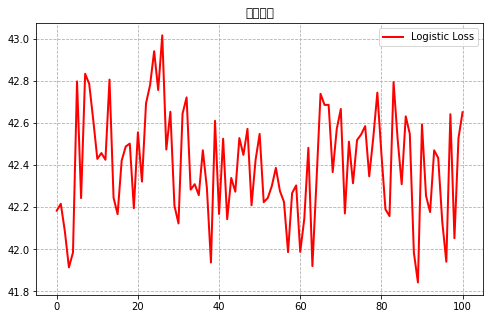

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.8750, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.875, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9666667


In [30]:
#train model with new features of 94
model=model6
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/union_three/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP6(
  (bn0): BatchNorm1d(119, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=119, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 120
f1_score:  %.4f 0.8744328140612969
accuracy_score: 0.8768115942028986
recall_score: 0.8709772798008092
pre_recall: 0.895694716064098
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

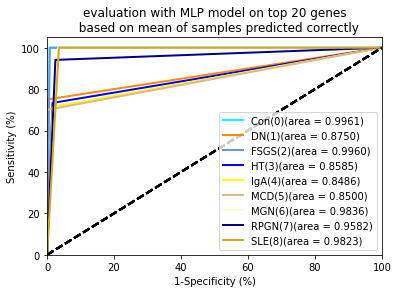

In [10]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/union_three/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP6()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvMLPy_NFM_union_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

